<h1 align="center">Communication System</h1>
<h4 align="center">Dr. Pakravan</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Project </h4>
<h5 align="center"><font color="cyan"> Feel free to contact whriter for any possible questions about the Project </font>
 </h5>
<h5 align="center"> <font color="cyan"> telegram: @m0hamadkaz -  Email: kazzazi.m@yahoo.com </font> </h5>


# 1. Introduction
In this project, we intend to fully simulate a digital telecommunication system and observe the effect of various parameters on the performance of this system. The block diagram of transmitter and receiver are shown in figures 1 and 2. For convenience, we consider only binary mode in this project.

<p align="center">
  <img src="block1.png" alt="Image description" width="550" height="200"><br>
  <em>diagram 1: Transmitter block diagram</em>
</p>

<p align="center">
  <img src="block2.png" alt="Image description" width="550" height="200"><br>
  <em>diagram 2: Receiver block diagram</em>
</p>

# 2. Implementation of blocks separately

In [110]:
import numpy as np
import matplotlib.pyplot as plt

1. Write a function called <span style="color:red">Divide</span>, which takes even-length sequences of zeros and ones as input, and outputs two sequences of half the length of the input sequence. (In your opinion, how should this function divide the input sequence so that our simulation is closer to a real-time system?) Implement the reverse system in a function called <span style="color:red">Compine</span>.

In [111]:
def Divide(sequence):
    length = len(sequence)
    half_length = length // 2
    sequence1 = []
    sequence2 = []
    for i in range(length):
        if i%2 == 0 :  
            sequence1.append(int(sequence[i]))
        else:
            sequence2.append(int(sequence[i]))
    
    return sequence1, sequence2

b1 = [0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,1,0]

b2,b3 = Divide(b1)
print (b2 , b3)


def Combine (sequence1, sequence2):
    sequence = []
    length = 2*len(sequence1)
    for i in range(length):
        if i%2 == 0:
            sequence.append(int(sequence1[i//2]))
        
        else:
            sequence.append(int(sequence2[i//2]))
            
    return sequence


b4 = Combine(b2,b3)
print (b4)


[0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1] [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]


2. Write a function called <span style="color:red">PulseShaping</span> that receives the pulse shape corresponding to zero (in the form of a string of real numbers!), and the pulse shape corresponding to one (in the form of another string of real numbers!) and deliver the waveform corresponding to the sequence at the output.Note that the pulse lengths corresponding to zero and one must be equal.

In [112]:
def PulseShaping(pulse_zero, pulse_one, sequence): # we use polar NRZ pulse shaping line code
    waveform = []
    pulse_length = len(pulse_zero)
    for bit in sequence:
        if bit == 0:
            waveform.extend(pulse_zero)
        elif bit == 1:
            waveform.extend(pulse_one)
    
    return waveform

b = [0,1,1,0,0,1]
p_zero = [0,0]
p_one = [1,1]
x_t = PulseShaping(p_zero, p_one , b)
print("input sequence : " , b)
print("waveform correspondig to the input sequence",x_t)

input sequence :  [0, 1, 1, 0, 0, 1]
waveform correspondig to the input sequence [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]


3. Write a function called <span style="color:red">AnalogMod</span> that receives two waveforms, sampling and carrier frequency at the input. and give the output xc(t) at the output.

[ 0.          0.10452846  0.20791169 ... -0.30901699 -0.20791169
 -0.10452846]


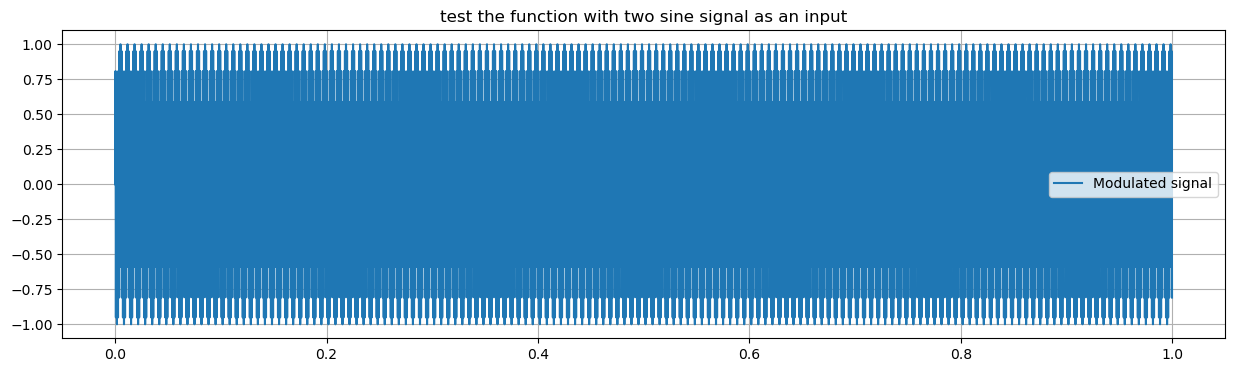

In [113]:
def AnalogMod(waveform1, waveform2, fs, fc):
    # Time array
    t = np.arange(len(waveform1)) / fs

    # Modulated signal
    xc = waveform1 * np.cos(2 * np.pi * fc * t) + waveform2 * np.sin(2 * np.pi * fc * t)

    return xc


# Create two waveforms
fs = 3000  # Sampling frequency
fc = 1000  # Carrier frequency
t = np.arange(0, 1, 1/fs)
waveform1 = np.sin(2 * np.pi * 50 * t)  # Sine waveform
print(waveform1)
waveform2 = np.cos(2 * np.pi * 50 * t)  # Cosine waveform

# Call the AnalogMod function
xc = AnalogMod(waveform1, waveform2, fs, fc)

# Plot the result
plt.figure(figsize=(15, 4))
plt.plot(t, xc, label='Modulated signal')
plt.legend()
plt.title('test the function with two sine signal as an input')
plt.grid(True)
plt.show()

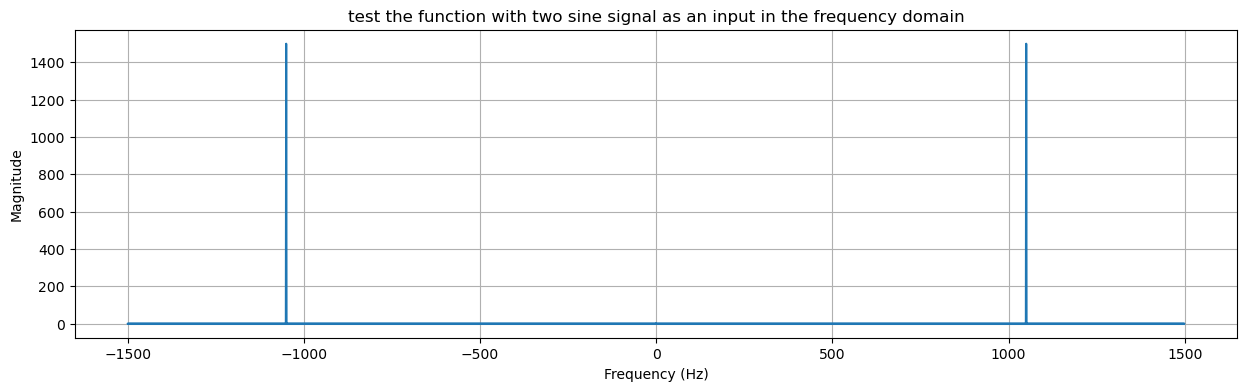

as you can see the frequency of the carrier signal is 1000 Hz 
 and frequency of the inputs signals are 50 Hz, so the output bandwidth is 1050 Hz


In [114]:
def plot_fft(signal, fs, title):
    # Compute the FFT of the signal
    fft_result = np.fft.fft(signal)
    
    # Compute the frequency bins
    freqs = np.fft.fftfreq(len(signal), 1/fs)
    
    # Plot the magnitude spectrum
    plt.figure(figsize=(15, 4))
    plt.plot(freqs, np.abs(fft_result))
    plt.title(title)  # Add the title
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()



# Test the function with the modulated signal
plot_fft(xc, fs ,'test the function with two sine signal as an input in the frequency domain' )
print("as you can see the frequency of the carrier signal is 1000 Hz \n and frequency of the inputs signals are 50 Hz, so the output bandwidth is 1050 Hz")

4. For simplicity, we consider the channel to be ideal and only limit the bandwidth of the signal passing through it. To solve this section, write a function named Channel that takes the sampling frequency, center frequency and bandwidth of the channel at the input of the sent signal and delivers the signal received at the receiver at the output. (You only need to write a bandpass filter!)

/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


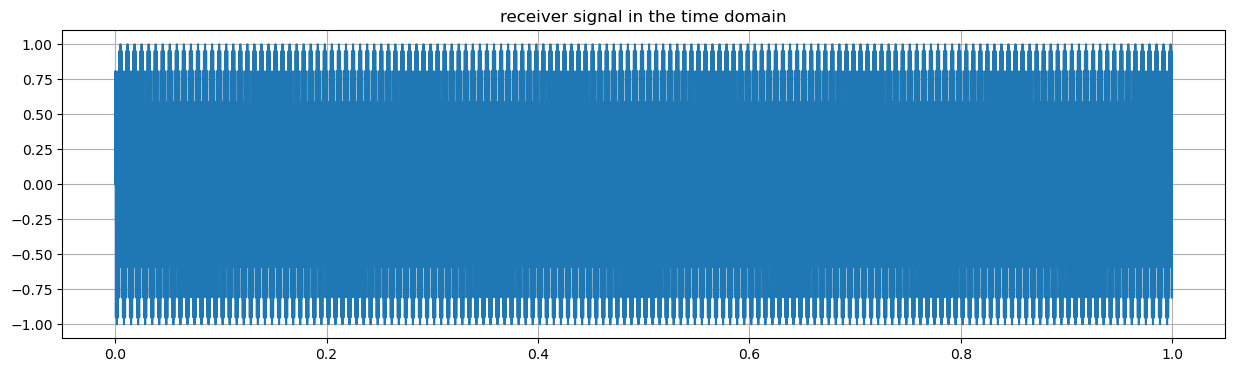

In [115]:
def Channel(x_c, f_s, f_c, bw):
    # Compute the FFT of the signal
    fft_result = np.fft.fft(x_c)
    
    # Compute the frequency bins
    freqs = np.fft.fftfreq(len(x_c), 1/f_s)
    
        
    # plt.figure(figsize=(15, 12))
    # plt.subplot(3, 1, 1)
    # plt.plot(np.abs(freqs), np.abs(fft_result))
    # plt.title("input signal in the frequency domain")
    # plt.grid(True)
    
    # Create a rectangular bandpass filter
    bpf = np.zeros_like(freqs)
    bpf[((freqs > f_c - bw/2) & (freqs < f_c + bw/2)) | ((freqs > -f_c - bw/2) & (freqs < -f_c + bw/2))] = 1
    
    # plt.subplot(3, 1, 2)
    # plt.plot(np.abs(freqs), np.abs(bpf))
    # plt.title("Band pass filter in the frequency domain")
    # plt.grid(True)
    
    # Apply the filter to the FFT of the signal
    filtered_fft = fft_result * bpf
    
    # plt.subplot(3, 1, 3)
    # plt.plot(np.abs(freqs), np.abs(filtered_fft))
    # plt.title("Receiver signal in the frequency domain(filterd signal)")
    # plt.grid(True)
    
    # Compute the inverse FFT of the filtered signal
    y_t = np.fft.ifft(filtered_fft)
    
    return y_t

#make a sample for testing the function
# Create two waveforms
bw = 600
fs = 3000  # Sampling frequency
fc = 1000  # Carrier frequency
t = np.arange(0, 1, 1/fs)
waveform1 = np.sin(2 * np.pi * 50 * t)  # Sine waveform
waveform2 = np.cos(2 * np.pi * 50 * t)  # Cosine waveform

# Call the AnalogMod function
xc = AnalogMod(waveform1, waveform2, fs, fc)

filtered_signal = Channel(xc, fs, fc, bw)

# Plot the result
plt.figure(figsize=(15, 4))
plt.plot(t, filtered_signal)
plt.grid(True)
plt.title("receiver signal in the time domain")
plt.show()


5. Write a function called <span style="color:red">AnalogDemod</span> that takes the sampling frequency, signal bandwidth and carrier frequency at the signal input (xc) and delivers two demodulated waveforms (y1(t) and (y2(t) in Figure 2) at the output. (combination of multiplier and low-pass filter)

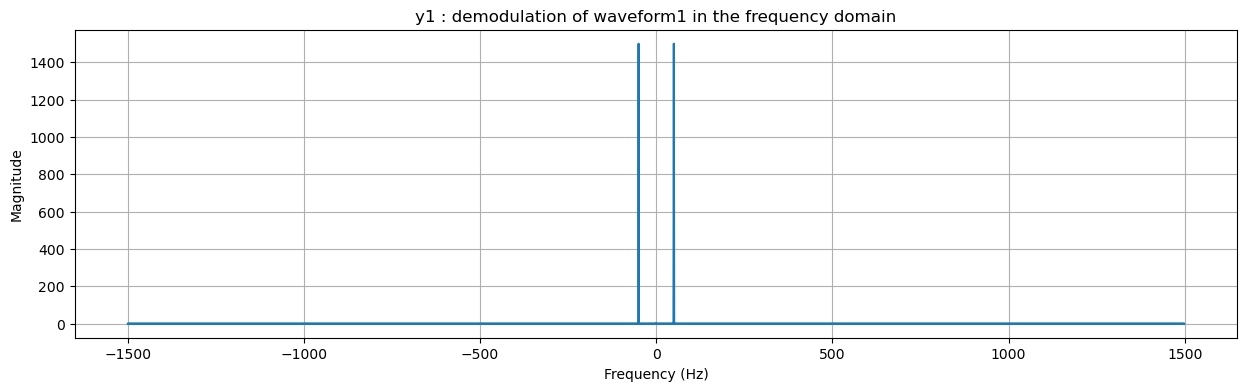

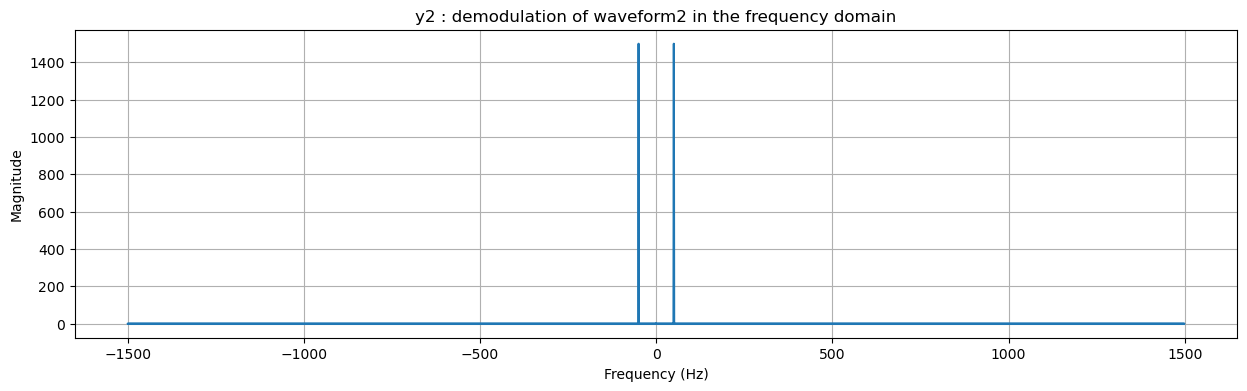

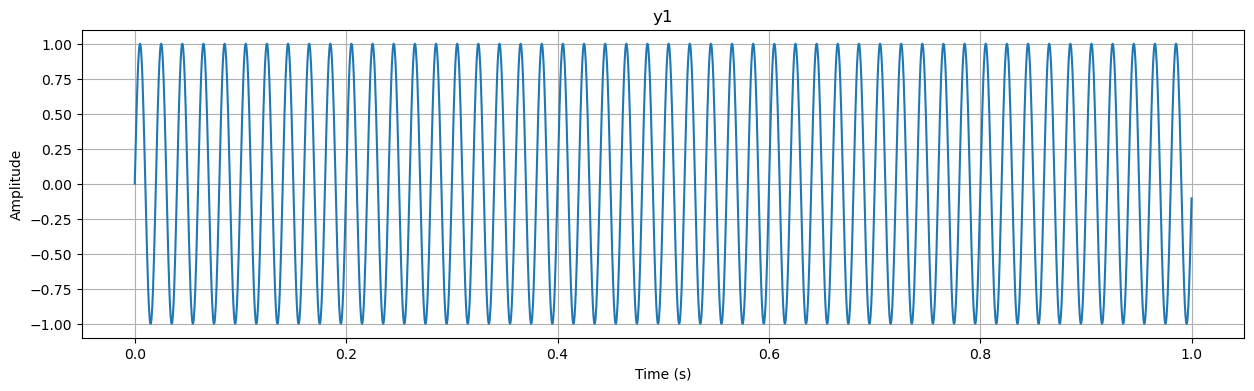

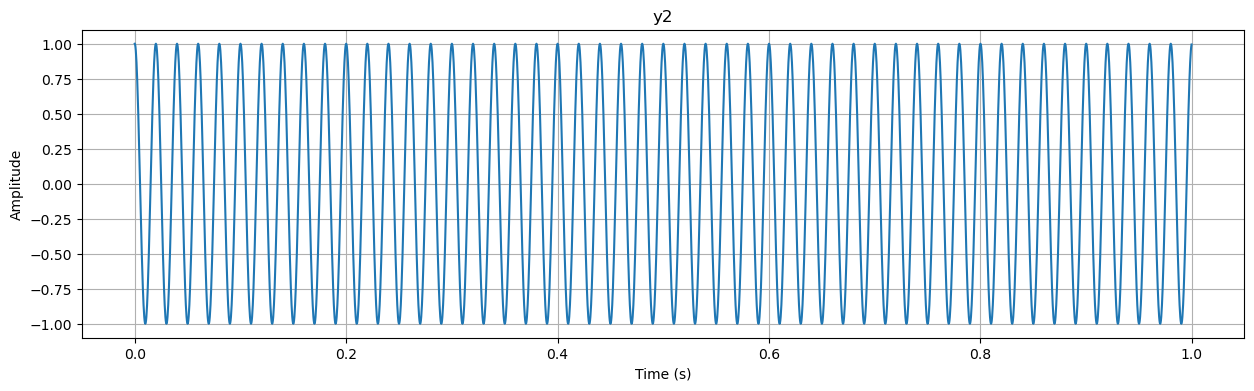

In [116]:
def AnalogDemod(xc, fs, fc, bw):
    # Create the time array
    t = np.arange(0, len(xc)/fs, 1/fs)
    
    # Create the carrier signals
    carrier_cos = np.cos(2 * np.pi * fc * t)
    carrier_sin = np.sin(2 * np.pi * fc * t)
    
    # Multiply the input signal by the carrier signals
    y1 = xc * carrier_cos
    y2 = xc * carrier_sin
    
    # Compute the FFT of the signals
    fft_y1 = np.fft.fft(y1)
    fft_y2 = np.fft.fft(y2)
    
    # Compute the frequency bins
    freqs = np.fft.fftfreq(len(xc), 1/fs)
    
    # Create a rectangular low-pass filter
    lpf = np.zeros_like(freqs)
    lpf[(freqs > -bw/2) & (freqs < bw/2)] = 1
    
    # Apply the filter to the FFT of the signals
    filtered_fft_y1 = fft_y1 * lpf
    filtered_fft_y2 = fft_y2 * lpf
    
    # Compute the inverse FFT of the filtered signals
    y1 = 2 * np.fft.ifft(filtered_fft_y1)
    y2 = 2* np.fft.ifft(filtered_fft_y2)
    
    return np.real(y1), np.real(y2)

y1, y2 = AnalogDemod(xc, fs, fc, bw)

plot_fft(y1, fs , "y1 : demodulation of waveform1 in the frequency domain")
plot_fft(y2, fs , "y2 : demodulation of waveform2 in the frequency domain")

# Plot y1
plt.figure(figsize=(15, 4))
plt.plot(t, y1, label='y1')
plt.title('y1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot y2
plt.figure(figsize=(15, 4))
plt.plot(t, y2, label='y2')
plt.title('y2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


6. For the last part, write a function named <span style="color:red">MatchedFilt</span> that receives the demodulated waveform input, the pulse shape corresponding to zero, and the pulse shape corresponding to one, and outputs two sequences as follows:

- a: The output value of the Matched Filter both for the pulse shape corresponding to one and for the pulse shape corresponding to zero (you have learned about the Matched Filter in the lesson slides and you know what the Matched Filter looks like for a desired pulse shape!).

- b: Estimated value for the corresponding bit

In [117]:
def MatchedFilt(y_t, one_pulse, zero_pulse):
    MatchedFilter_one = np.flip(one_pulse)
    MatchedFilter_zero = np.flip(zero_pulse)

    MF_one_fft = np.fft.fft(MatchedFilter_one)
    MF_zero_fft = np.fft.fft(MatchedFilter_zero)

    sig_one = np.zeros_like(y_t, dtype=np.complex128)
    sig_zero = np.zeros_like(y_t, dtype=np.complex128)

    for i in range(0, len(y_t), len(one_pulse)):
        y_f = np.fft.fft(y_t[i:i + len(one_pulse)])
        sig_one[i:i + len(one_pulse)] = np.fft.ifft(y_f * MF_one_fft)
        sig_zero[i:i + len(zero_pulse)] = np.fft.ifft(y_f * MF_zero_fft)

    MatFil_one = sig_one[len(one_pulse) - 1::len(one_pulse)]
    MatFil_zero = sig_zero[len(zero_pulse) - 1::len(zero_pulse)]

    b_hat = np.zeros(len(y_t) // len(one_pulse))
    for i in range(len(b_hat)):
        if MatFil_one[i] > MatFil_zero[i]:
            b_hat[i] = 1

    return MatFil_one, MatFil_zero, b_hat


# Define a pulse for '1' and '0'
one_pulse = np.array([1, 1, 1, 1, 1])
zero_pulse = np.array([-1, -1, -1, -1, -1])

# Create a signal with alternating '1' and '0' pulses
y_t = np.concatenate([one_pulse if i % 2 == 0 else zero_pulse for i in range(10)])

# Apply the matched filter
MatFil_one, MatFil_zero, b_hat = MatchedFilt(y_t, one_pulse, zero_pulse)

# Print the detected bits
print(b_hat)
print(MatFil_one)
print(MatFil_zero)


[1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
[ 5.+0.j -5.+0.j  5.+0.j -5.+0.j  5.+0.j -5.+0.j  5.+0.j -5.+0.j  5.+0.j
 -5.+0.j]
[-5.+0.j  5.+0.j -5.+0.j  5.+0.j -5.+0.j  5.+0.j -5.+0.j  5.+0.j -5.+0.j
  5.+0.j]


# 3. Transmitting a random sequence of zeros and ones

For this part, consider the specifications of the blocks as follows:

<center>

| Variables  | Values |
|:--------:|:--------:|
| Sampling frequency   | 1 MHz   |
| Length of each pulse   | 10 ms   |
| Carrier frequency   | 10 KHz   |
| Channel center frequency   | 10 KHz   |
| Channel bandwidth   | 1 KHz  |


*Figure1 : specifications of the blocks*
</center>

1. In this part, we want to send signals using PAM modulation. Consider the pulse shape as a simple square whose amplitude is equal to +1 for bit one and −1 for bit zero. (Choose any other parameters you are going to choose in a reasonable way, and explain your reasons for that choice.)

- a: Generate "long enough" sequences of zeros and ones. Simulate the process of sending this sequence, assuming no noise. Draw the waveform for the output of each block. (Consider drawing a reasonable amount of time so that your shapes are "beautiful"!)
​

In [118]:
fs = 1000000
T = 0.01
fc = 10000
fo = 10000
Bw = 1000

one_pulse = np.ones(10000)    # Pulse signal of ones
one_pulse[5000:] = 0          # Truncate the pulse signal

zero_pulse = -np.ones(10000)  # Pulse signal of -1 (negative ones)
zero_pulse[5000:] = 0         # Truncate the pulse signal

b_n = np.random.randint(2, size=200)  # Generate a random binary sequence of length 200
b1 , b2 = Divide(b_n)

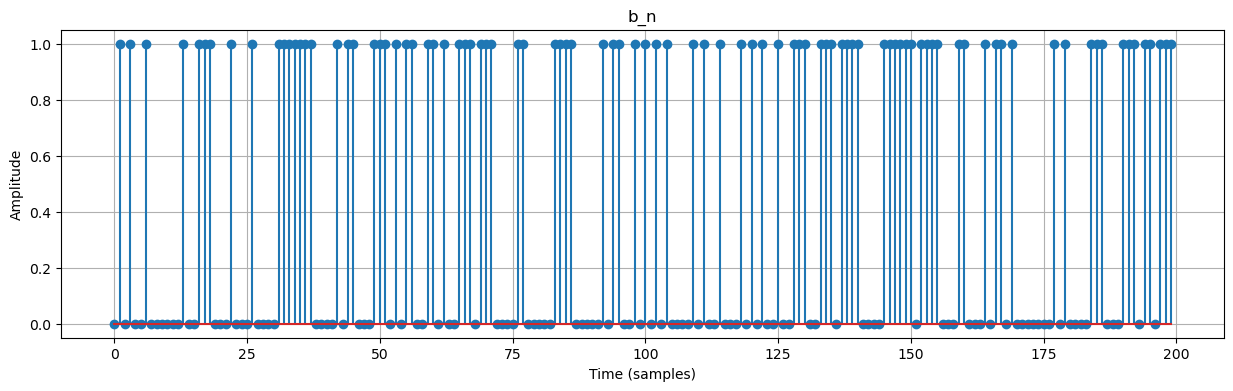

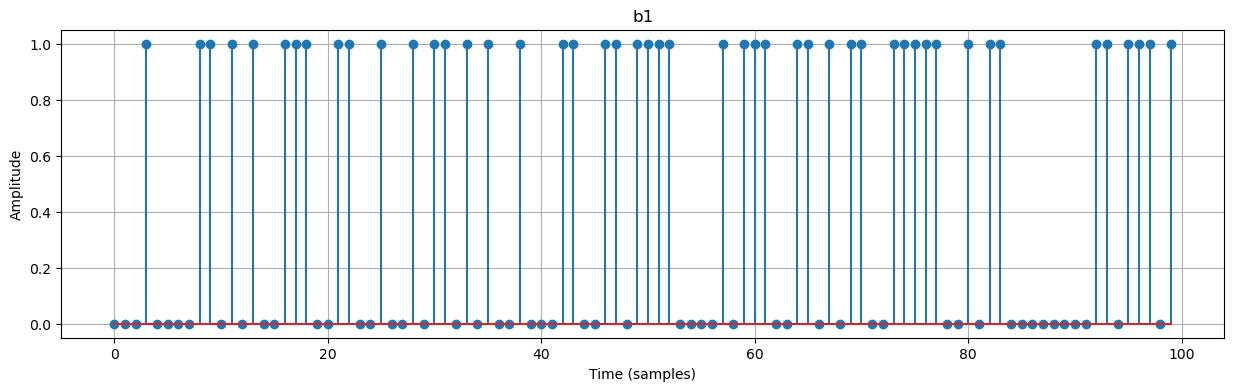

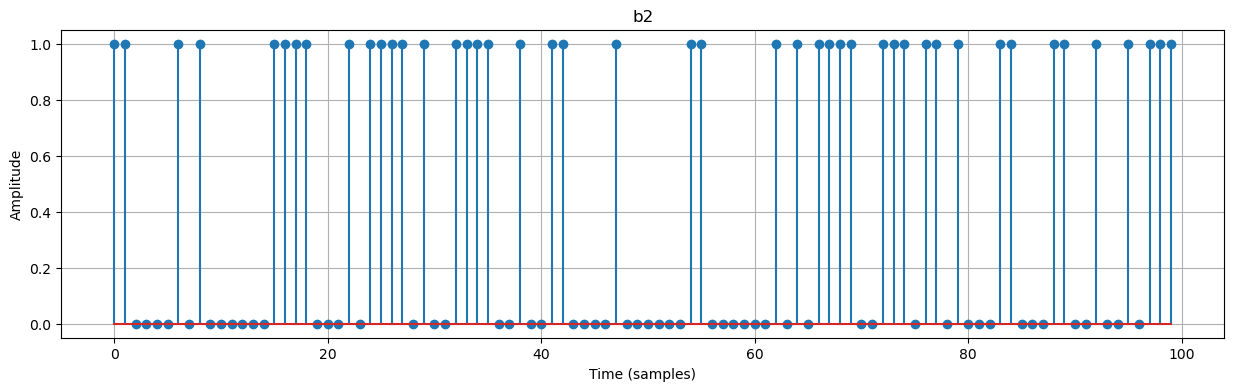

In [119]:
# Create time arrays for each signal
t_b1 = np.arange(len(b1))
t_b2 = np.arange(len(b2))
t_bn = np.arange(len(b_n))


# Plot b_n
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_n)
plt.title('b_n')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b1
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b1)
plt.title('b1')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b2
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b2)
plt.title('b2')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



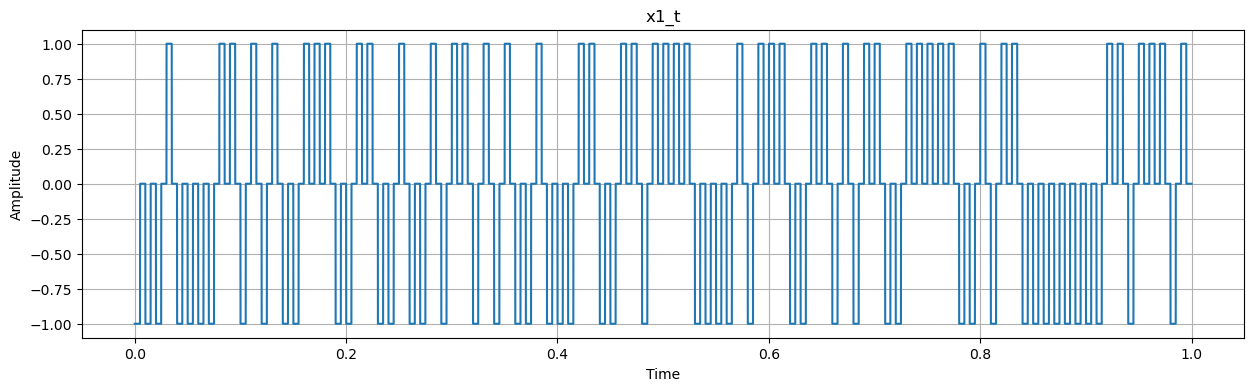

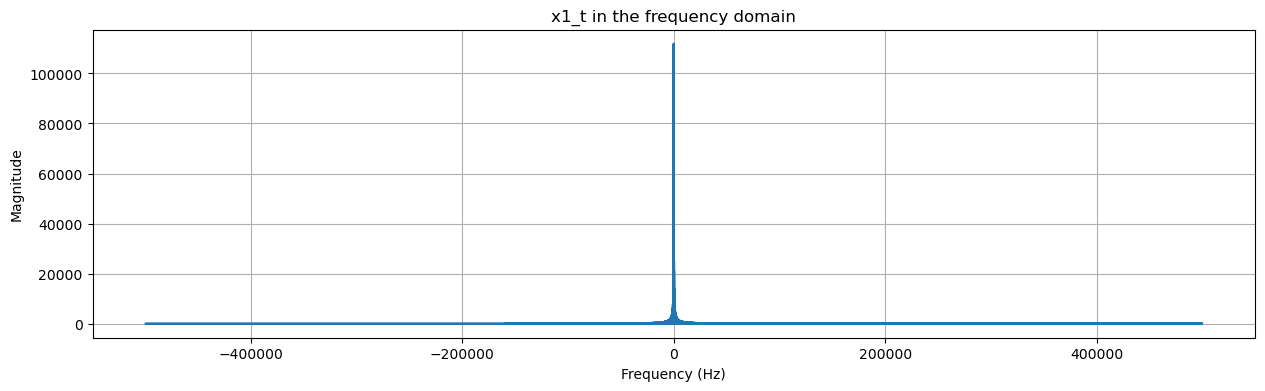

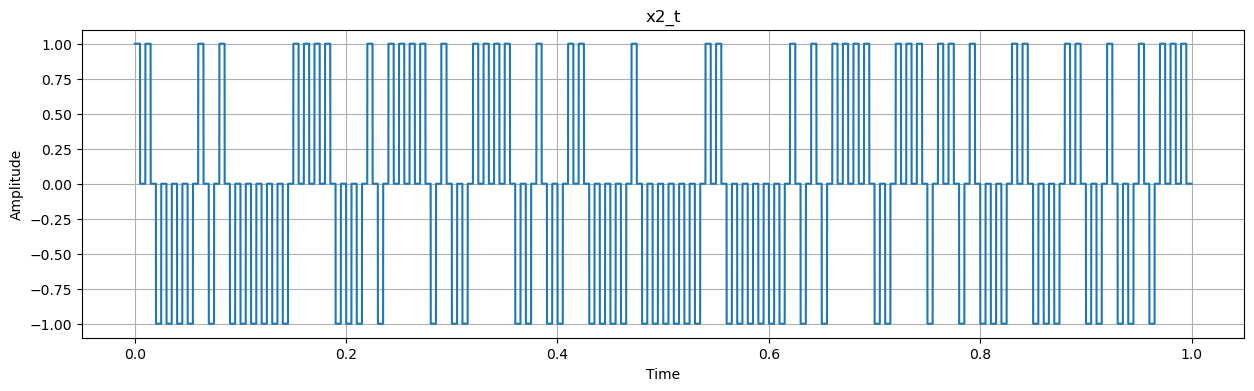

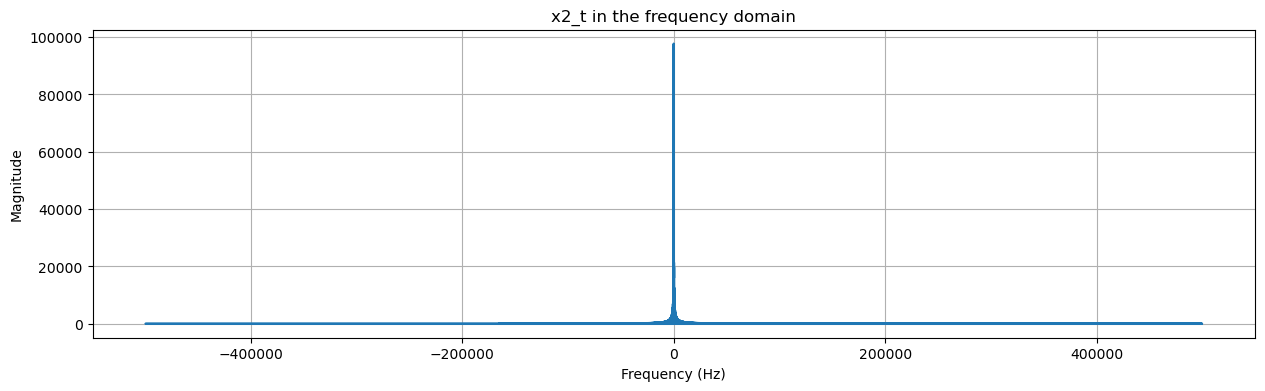

In [120]:
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)

# Create time arrays for each signal
t_x1 = np.arange(len(x1_t))
t_x2 = np.arange(len(x2_t))
time = np.arange(0, len(b_n)/2*T, 1/fs)

# Plot x1_t
plt.figure(figsize=(15, 4))
plt.plot(time, x1_t)
plt.title('x1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x1_t, fs, "x1_t in the frequency domain")

# Plot x2_t
plt.figure(figsize=(15, 4))
plt.plot(time, x2_t)
plt.title('x2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x2_t, fs, "x2_t in the frequency domain")


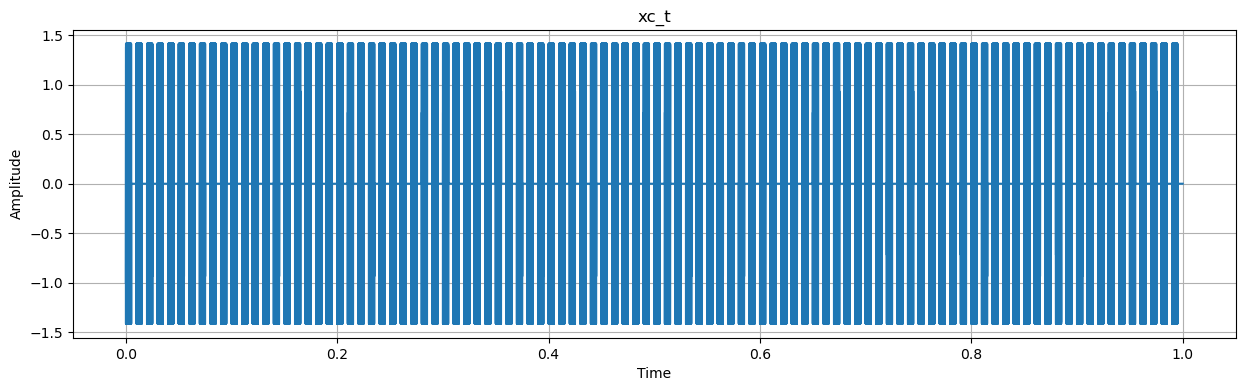

In [121]:
xc_t = AnalogMod(x1_t, x2_t, fs, fc)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, xc_t)
plt.title('xc_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



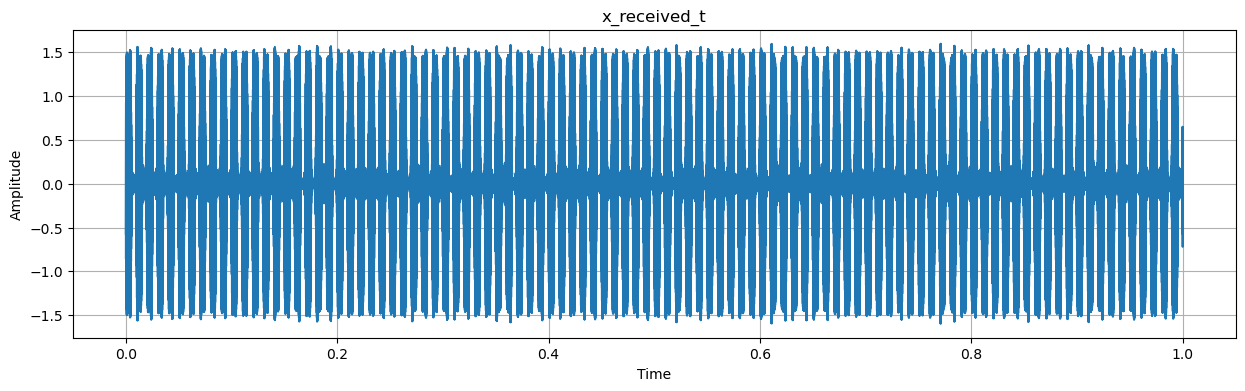

In [122]:
x_received_t = Channel(xc_t, fs, fc, Bw)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, x_received_t)
plt.title('x_received_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

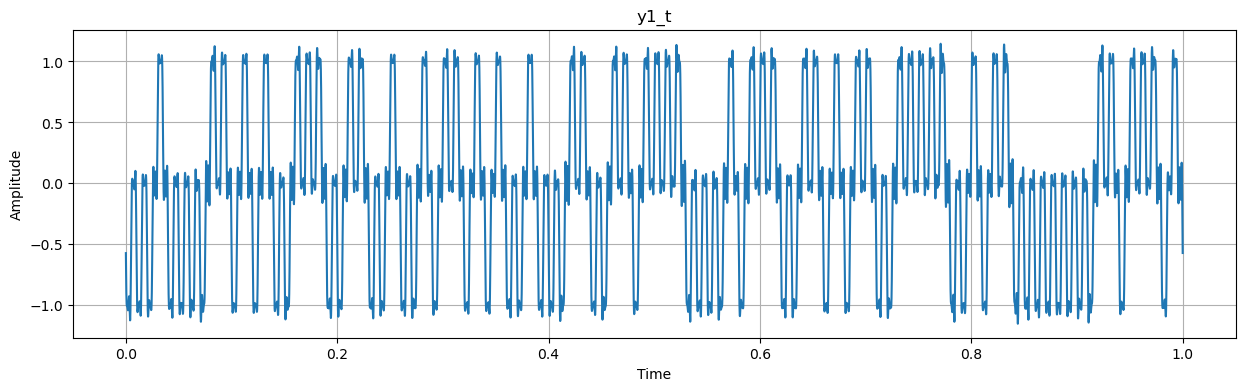

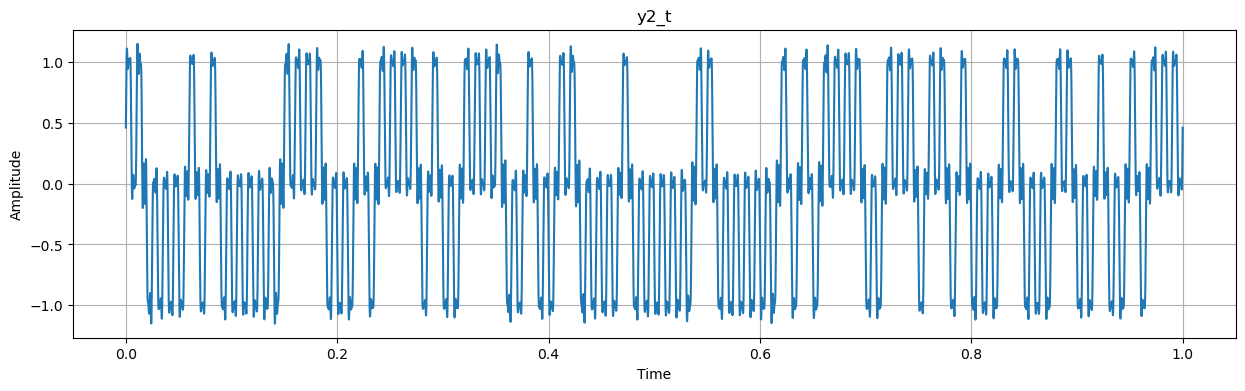

In [123]:
y1_t, y2_t = AnalogDemod(x_received_t, fs, fc, Bw)

# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time, y1_t)
plt.title('y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot y2_t
plt.figure(figsize=(15, 4))
plt.plot(time, y2_t)
plt.title('y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


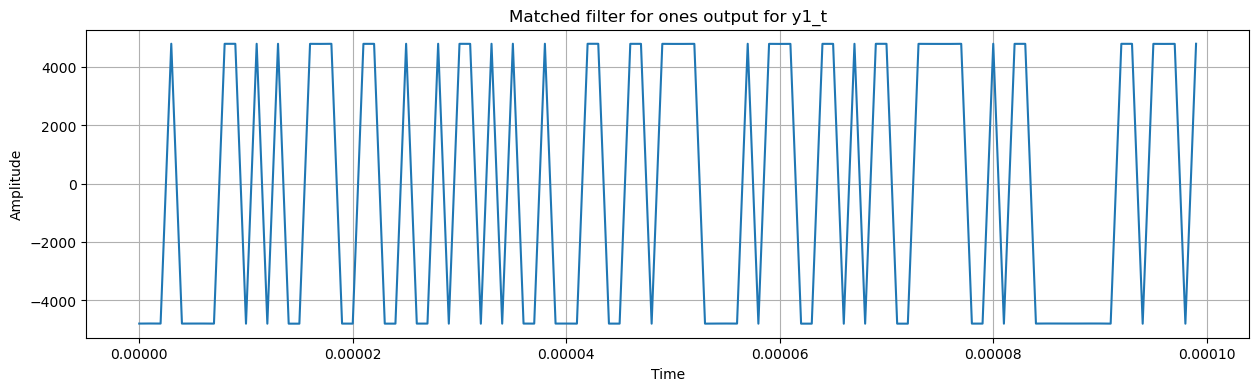

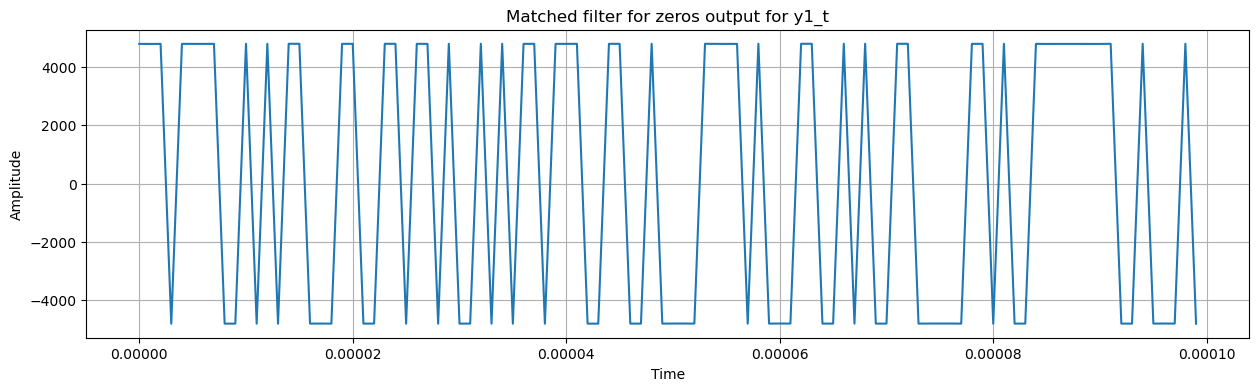

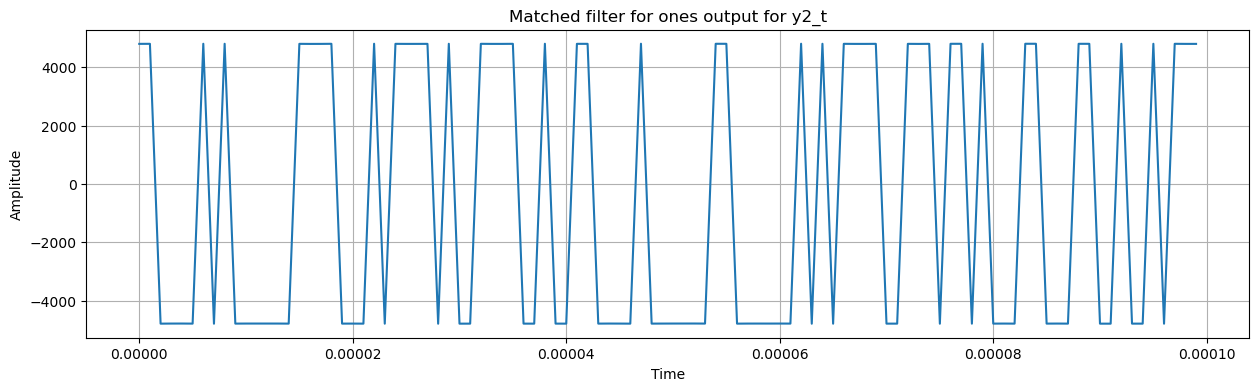

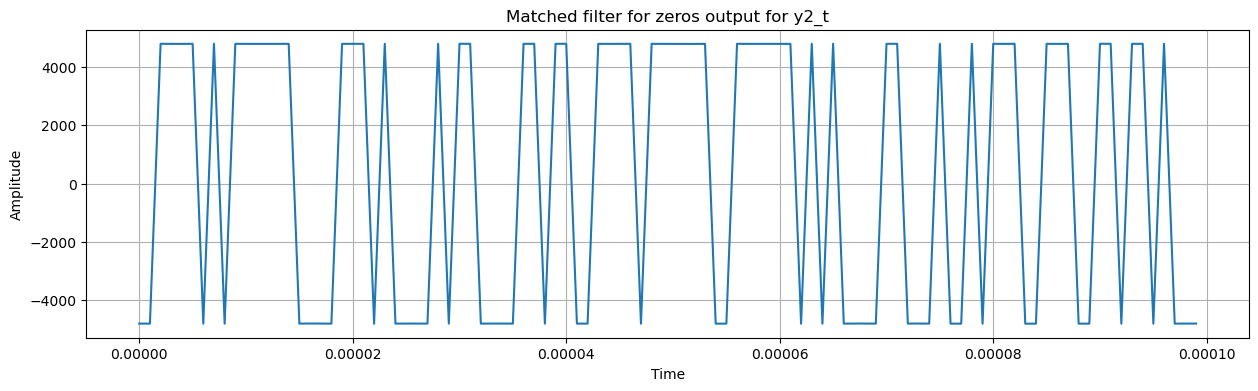

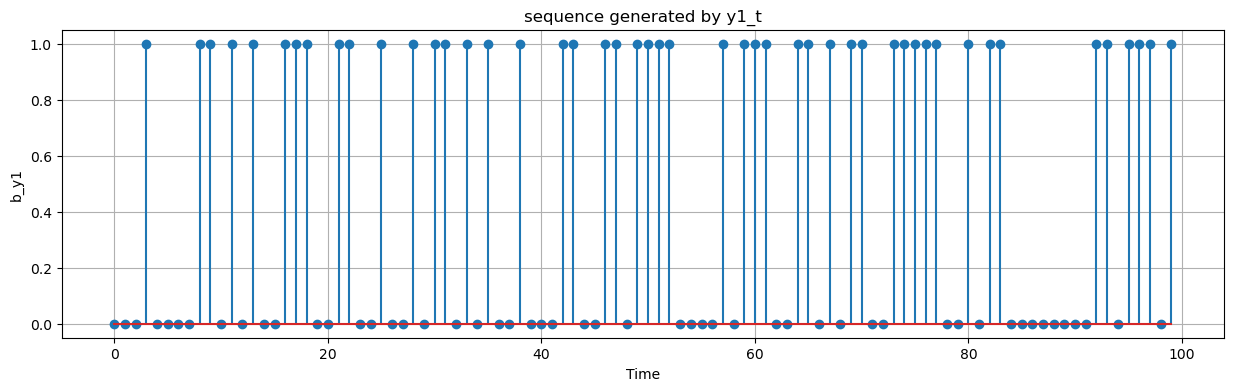

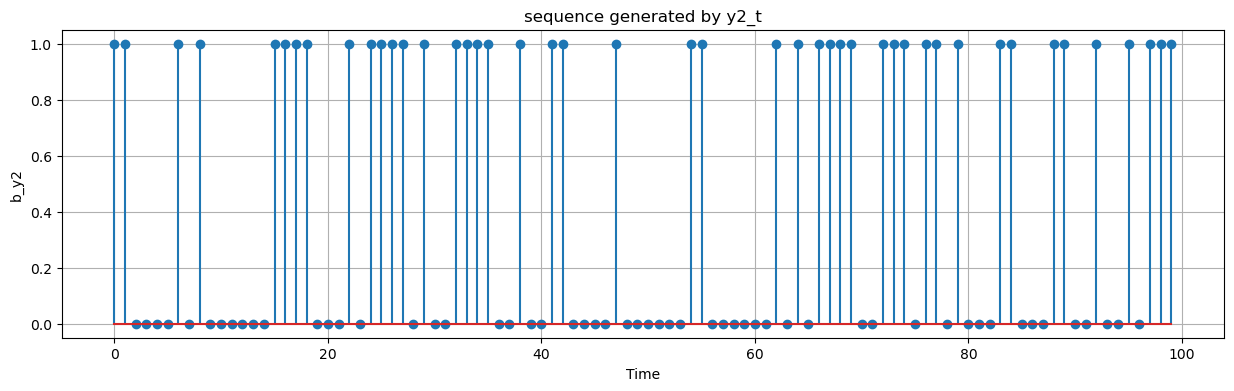

In [124]:
a_y11, a_y10 , b_y1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
a_y21, a_y20, b_y2 = MatchedFilt(y2_t, one_pulse, zero_pulse)

time_Matched = np.arange(len(a_y11)) / fs

# Plot a_y11
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y11)
plt.title('Matched filter for ones output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y10)
plt.title('Matched filter for zeros output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y21)
plt.title('Matched filter for ones output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y20)
plt.title('Matched filter for zeros output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b_y1)
plt.title('sequence generated by y1_t')
plt.xlabel('Time')
plt.ylabel('b_y1')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b_y2)
plt.title('sequence generated by y2_t')
plt.xlabel('Time')
plt.ylabel('b_y2')
plt.grid(True)
plt.show()


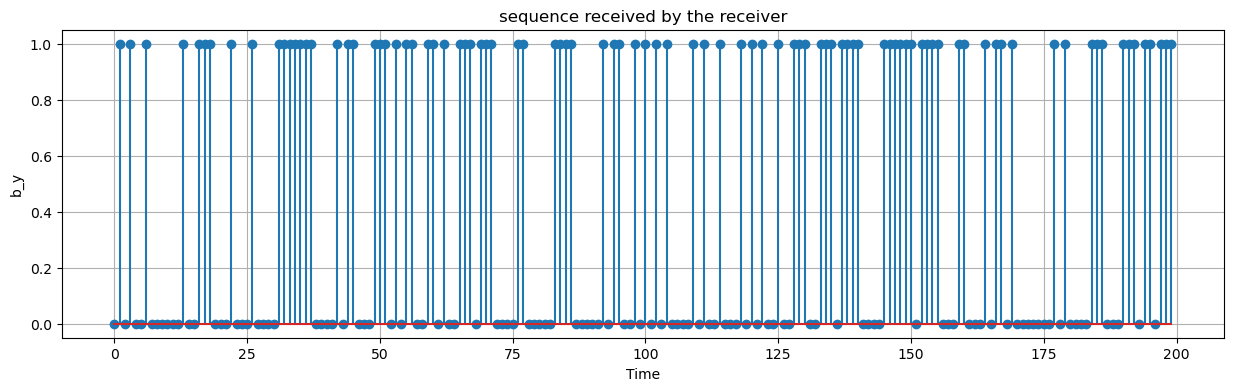

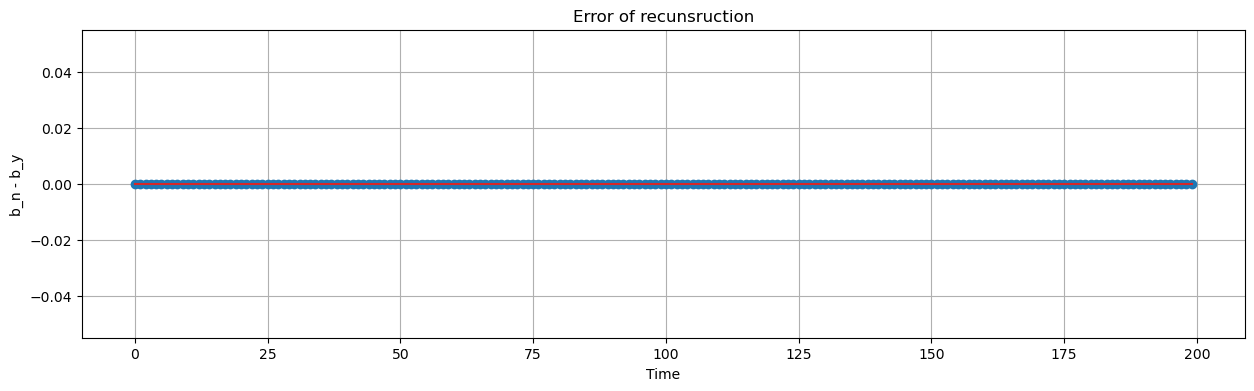

In [125]:
b_y = Combine(b_y1, b_y2)

# Plot b_y
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_y)
plt.title('sequence received by the receiver')
plt.xlabel('Time')
plt.ylabel('b_y')
plt.grid(True)
plt.show()


b_error = b_n - b_y

# Plot error of received sequence
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_error)
plt.ylabel('b_n - b_y')
plt.xlabel('Time')
plt.title('Error of recunsruction')
plt.grid(True)
plt.show()



- b: In the lesson, you have learned a little about random processes. One of the most important random processes is noise. We often assume that the noise is added to the signal, and in other words, it is additive. We also assume that the different moments of the noise are independent from each other, in other words, we assume that the noise is white. As The last assumption is that the distribution of noise at all moments is Gaussian with zero mean, and we call such noise Additive White Gaussian Noise.


Now, assuming that the AWGN noise is added after the signal passes through the channel, draw the error probability in terms of the noise variance. Make the horizontal axis span large enough. Justify error-prone behavior.

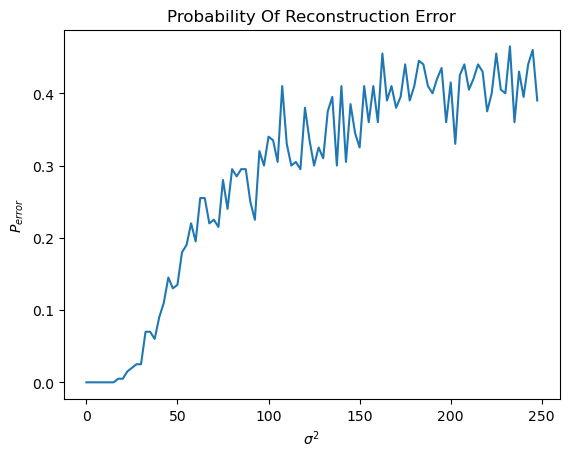

In [127]:

error = np.zeros(100)
for i in range(100):
    x_receive_affected = x_received_t + np.random.normal(0, 2.5 * i, len(x_received_t))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    b_hat = Combine(b_hat_1, b_hat_2)
    error[i] = np.sum((b_hat - b_n) ** 2) / len(b_n)

plt.figure()
plt.plot(np.arange(0, 10, 0.1) * 25, error)
plt.title('Probability Of Reconstruction Error')
plt.xlabel(r'$\sigma^2$')
plt.ylabel(r'$P_{error}$')
plt.show()

- c: According to the previous section, choose 6 different values for the noise variance, (so that it covers the meaningful intervals of the graph as well as possible). For each of these variances, draw a two-dimensional scatter plot of the output of the two Matched Filters. It means that for each pair ($b_1$[i],$b_2$[i]), due to the existence of noise, the output of two Matched Filter comes as two numbers ($\hat{b_1}$[i],$\hat{b_2}$[i]) that probably $\hat{b_1}$[i]= $b_1$[i] , $\hat{b_2}$[i]= $b_2$[i]. But if the amount of noise variance is small, From ($\hat{b_1}$[i],$\hat{b_2}$[i]), ($b_1$[i],$b_2$[i]) can be correctly estimated. The problem is that ($\hat{b_1}$[i],$\hat{b_2}$[i]) Imagine a point in two-dimensional space and for different i, draw all these points on a graph. Repeat this for the 6 noise variance values you have chosen. To get a better understanding of the problem, you can search the expression "Signal Constellation".

/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


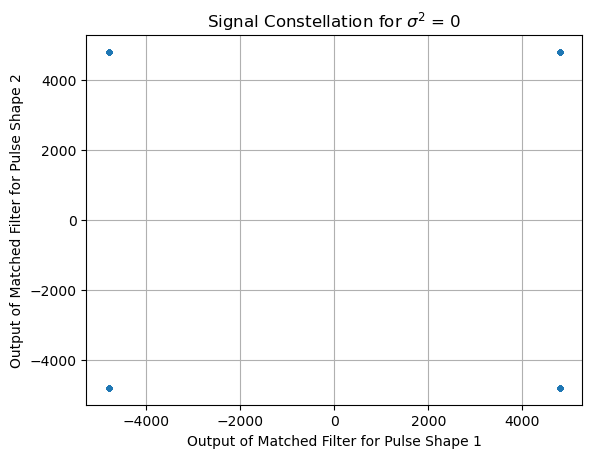

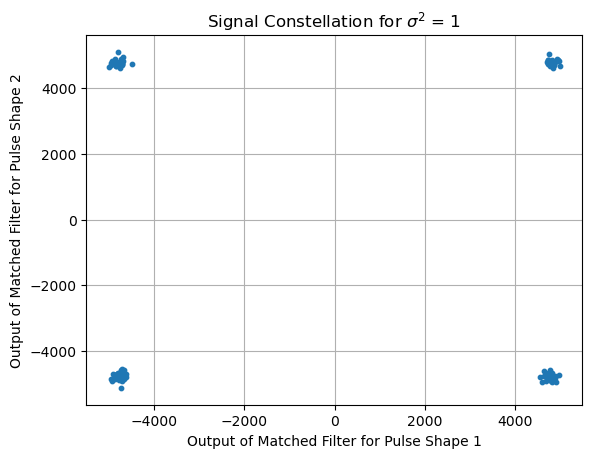

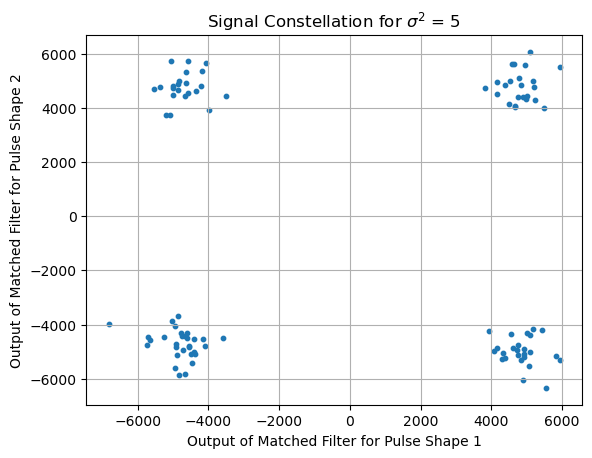

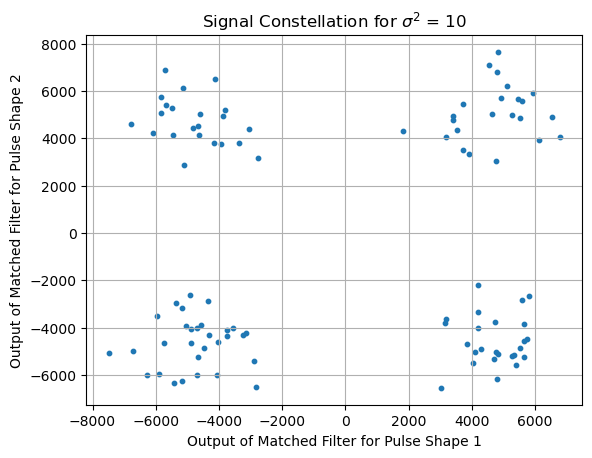

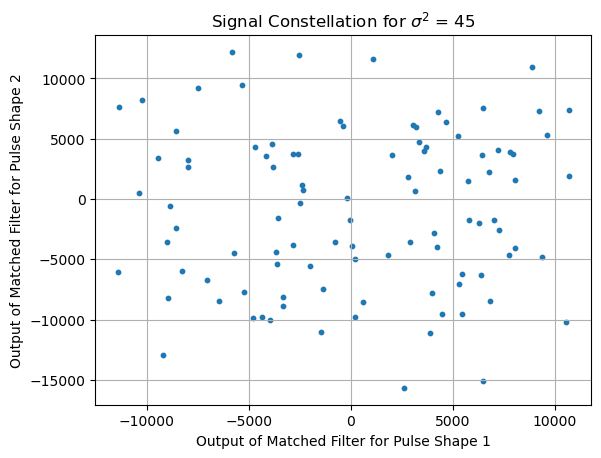

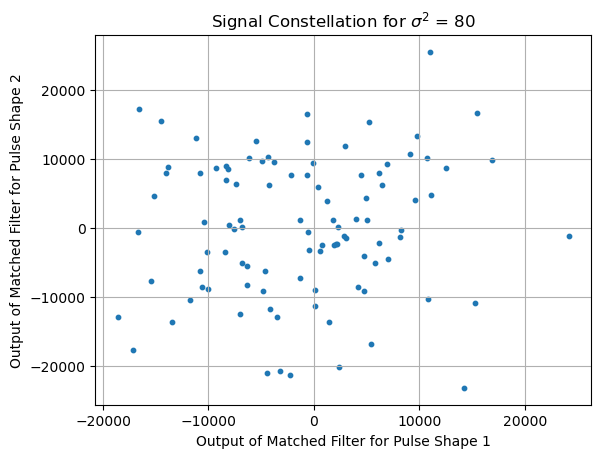

In [128]:
b1, b2 = Divide(b_n)
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)
xc_t = AnalogMod(x1_t, x2_t, fs, fc)
x_receive = Channel(xc_t, fs, fo, Bw)

for sigma in [0, 1, 5, 10, 45, 80]:
    x_receive_affected = x_receive + np.random.normal(0, sigma, len(x_receive))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    plt.figure()
    plt.scatter(MatFil_one_1, MatFil_one_2, s=10)
    plt.title(f'Signal Constellation for $\sigma^2$ = {sigma}')
    plt.xlabel('Output of Matched Filter for Pulse Shape 1')
    plt.ylabel('Output of Matched Filter for Pulse Shape 2')
    plt.grid(True)
    plt.show()


2. In this section, we go to PSK modulation. Instead of a square pulse shape, consider a sinusoidal pulse shape with a frequency of 500 Hz. Assume its range to be equal to +1 to send bit one and to be equal to −1 to send bit zero.

- a: Generate "long enough" sequences of zeros and ones. Simulate the process of sending this sequence, assuming no noise. Draw the waveform for the output of each block. (Consider drawing a reasonable amount of time so that your shapes are "beautiful"!)
​

In [129]:
fs = 1000000
T = 0.01 #step
fc = 10000
fo = 10000
Bw = 1000
t = np.arange(0, 10000) / fs


one_pulse = np.sin(2 * np.pi * 500 * t) 
zero_pulse = -np.sin(2 * np.pi * 500 * t)


b_n = np.random.randint(2, size=200)  # Generate a random binary sequence of length 200
b1 , b2 = Divide(b_n)

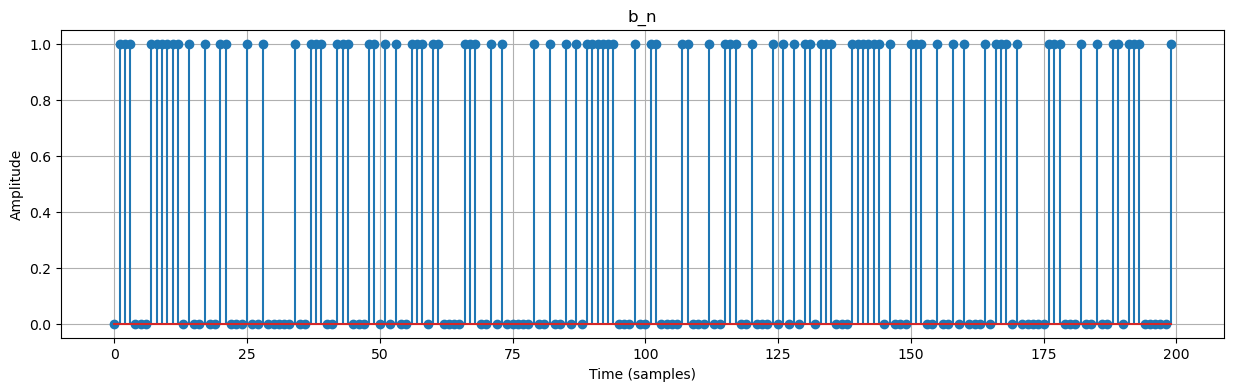

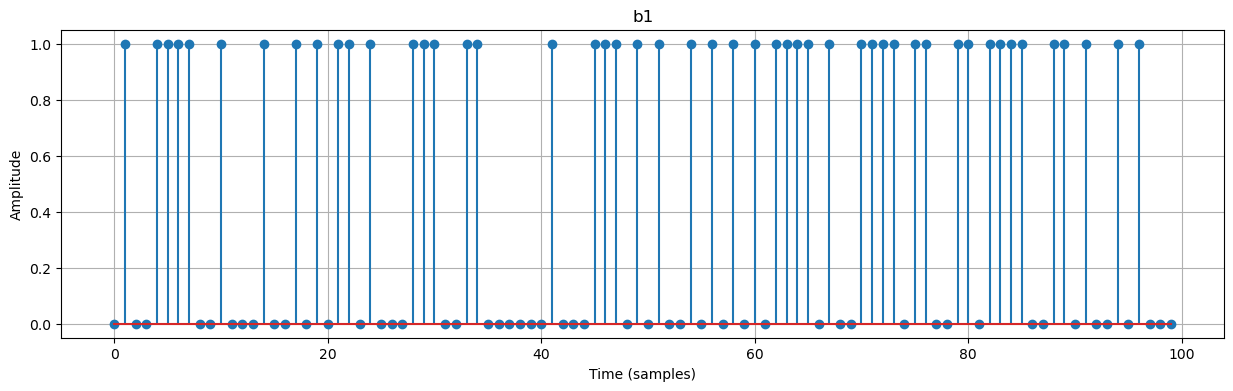

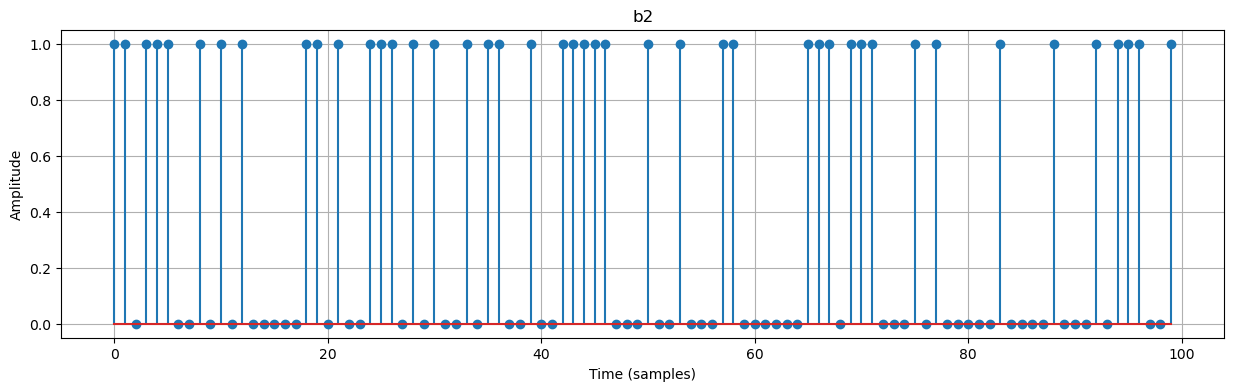

In [130]:
# Create time arrays for each signal
t_b1 = np.arange(len(b1))
t_b2 = np.arange(len(b2))
t_bn = np.arange(len(b_n))


# Plot b_n
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_n)
plt.title('b_n')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b1
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b1)
plt.title('b1')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b2
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b2)
plt.title('b2')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



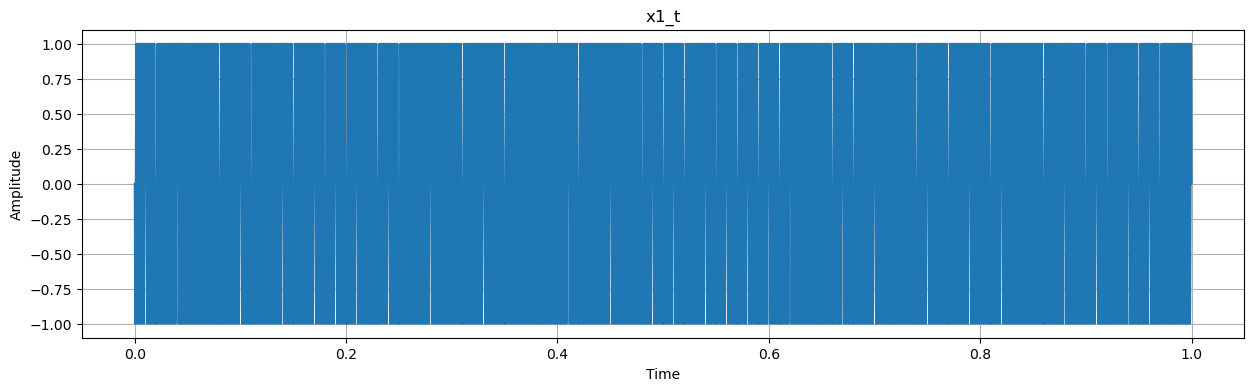

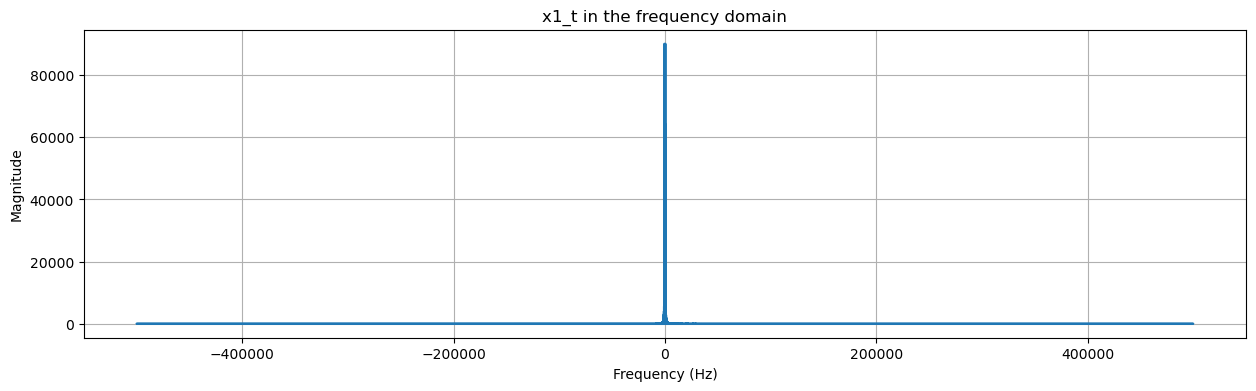

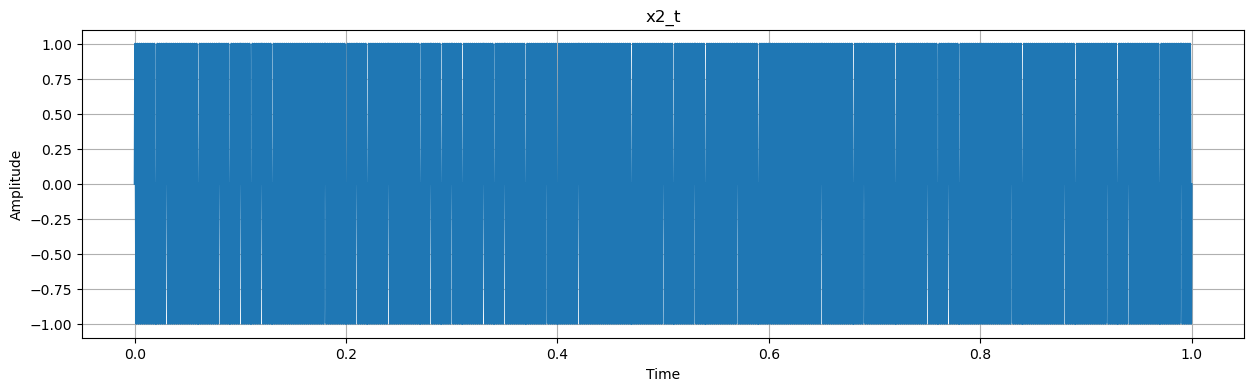

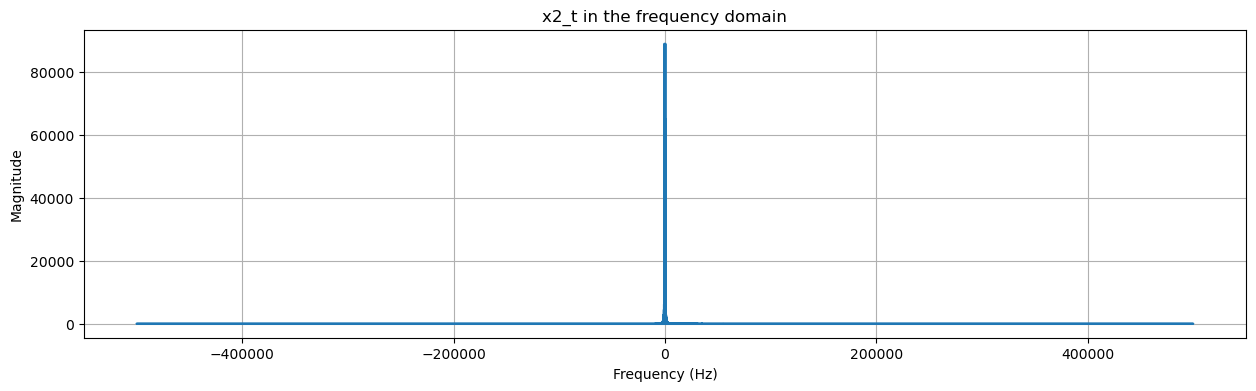

In [131]:
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)

# Create time arrays for each signal
t_x1 = np.arange(len(x1_t))
t_x2 = np.arange(len(x2_t))
time = np.arange(0, len(b_n)/2*T, 1/fs)

# Plot x1_t
plt.figure(figsize=(15, 4))
plt.plot(time, x1_t)
plt.title('x1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x1_t, fs, "x1_t in the frequency domain")

# Plot x2_t
plt.figure(figsize=(15, 4))
plt.plot(time, x2_t)
plt.title('x2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x2_t, fs, "x2_t in the frequency domain")


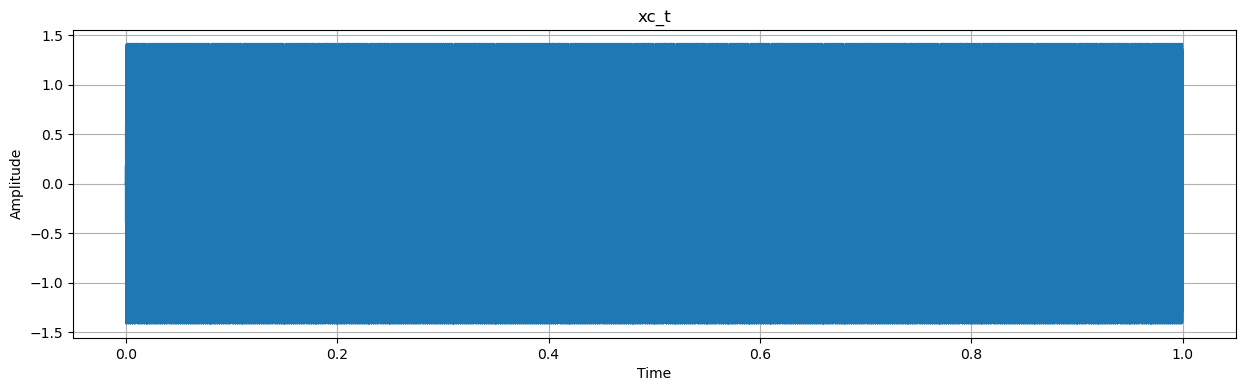

In [132]:
xc_t = AnalogMod(x1_t, x2_t, fs, fc)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, xc_t)
plt.title('xc_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



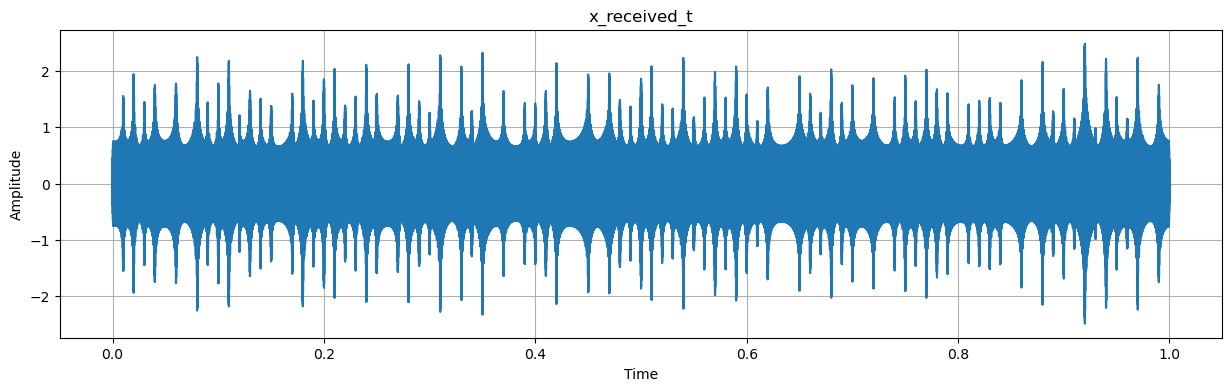

In [133]:
x_received_t = Channel(xc_t, fs, fc, Bw)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, x_received_t)
plt.title('x_received_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

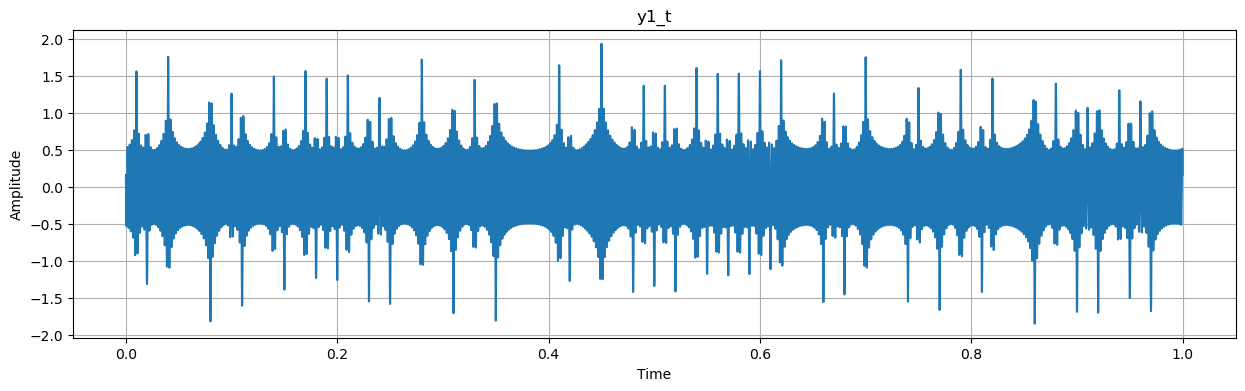

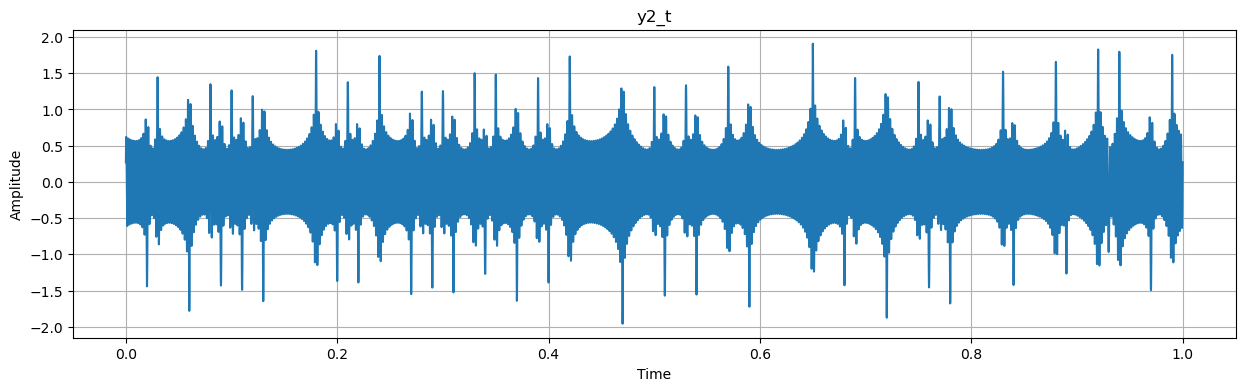

In [134]:
y1_t, y2_t = AnalogDemod(x_received_t, fs, fc, Bw)

# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time, y1_t)
plt.title('y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot y2_t
plt.figure(figsize=(15, 4))
plt.plot(time, y2_t)
plt.title('y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


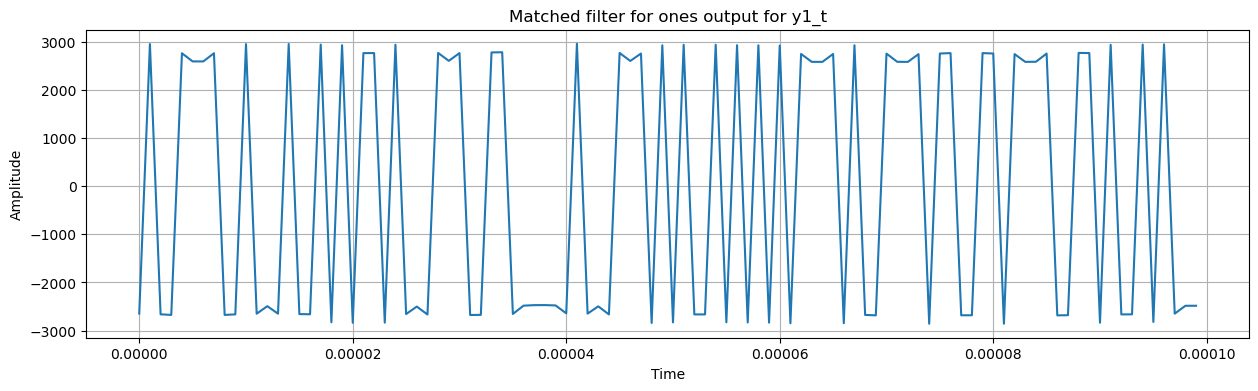

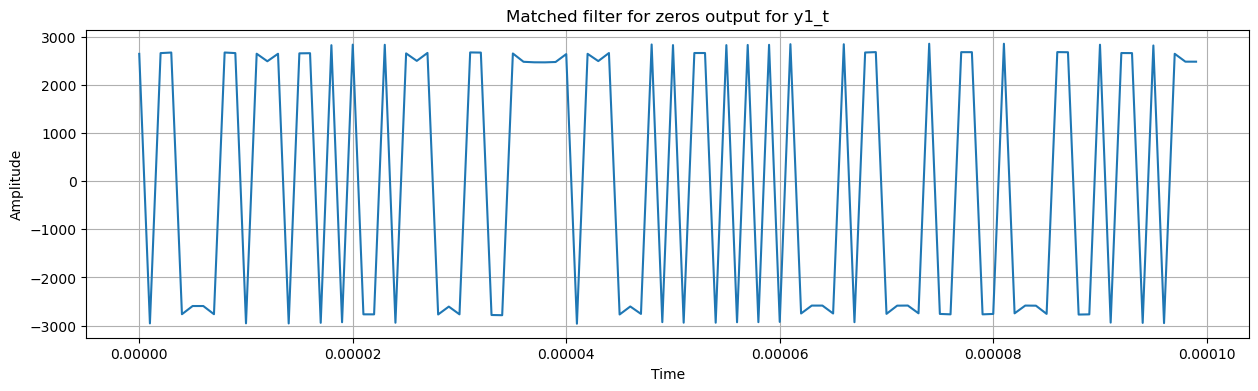

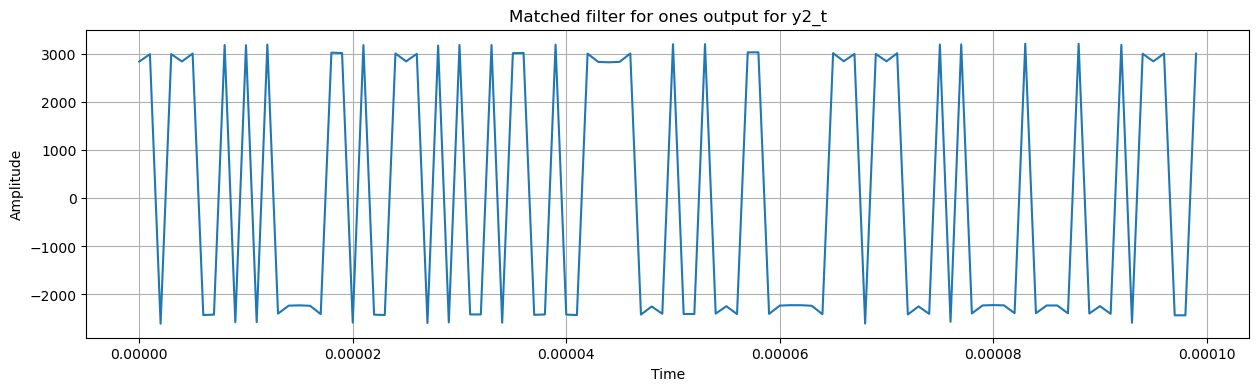

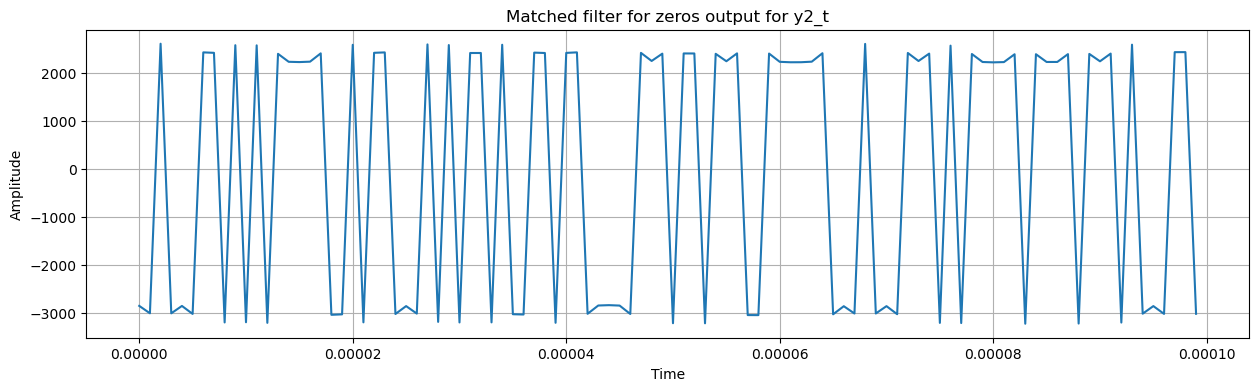

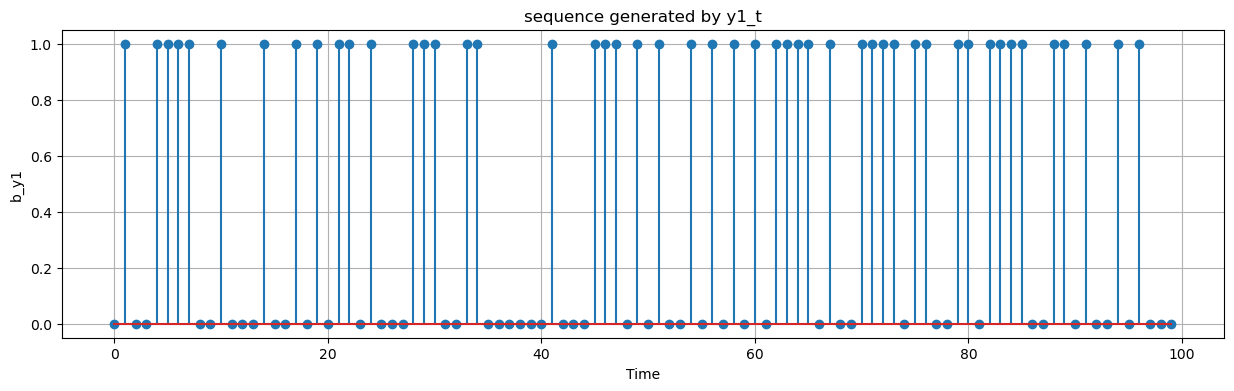

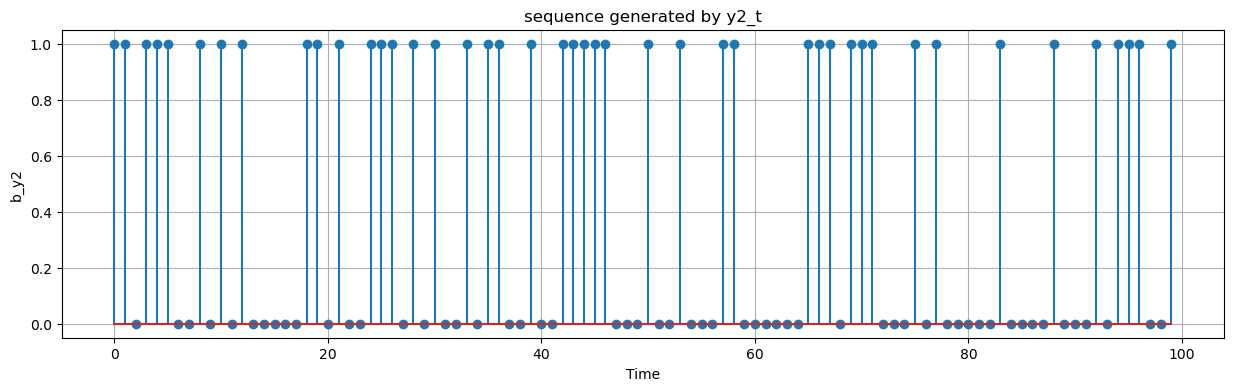

In [135]:
a_y11, a_y10 , b_y1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
a_y21, a_y20, b_y2 = MatchedFilt(y2_t, one_pulse, zero_pulse)

time_Matched = np.arange(len(a_y11)) / fs

# Plot a_y11
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y11)
plt.title('Matched filter for ones output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y10)
plt.title('Matched filter for zeros output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y21)
plt.title('Matched filter for ones output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y20)
plt.title('Matched filter for zeros output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b_y1)
plt.title('sequence generated by y1_t')
plt.xlabel('Time')
plt.ylabel('b_y1')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b_y2)
plt.title('sequence generated by y2_t')
plt.xlabel('Time')
plt.ylabel('b_y2')
plt.grid(True)
plt.show()


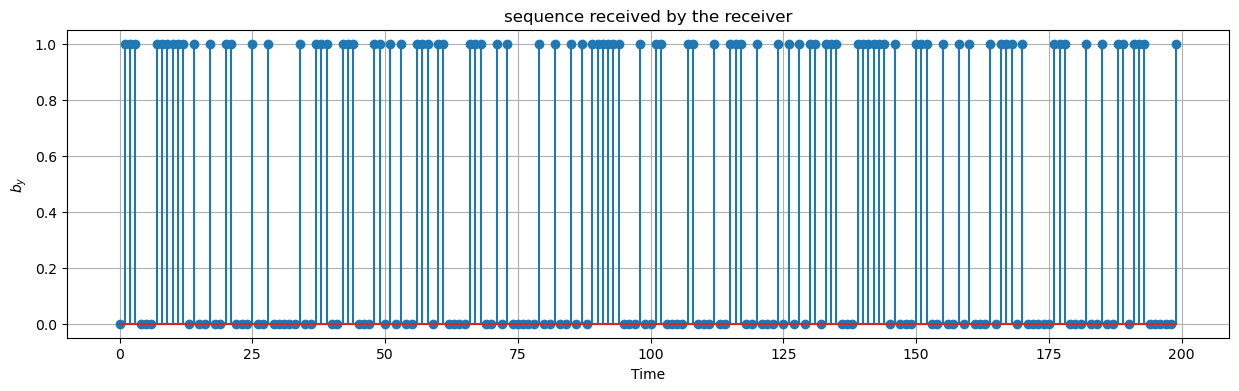

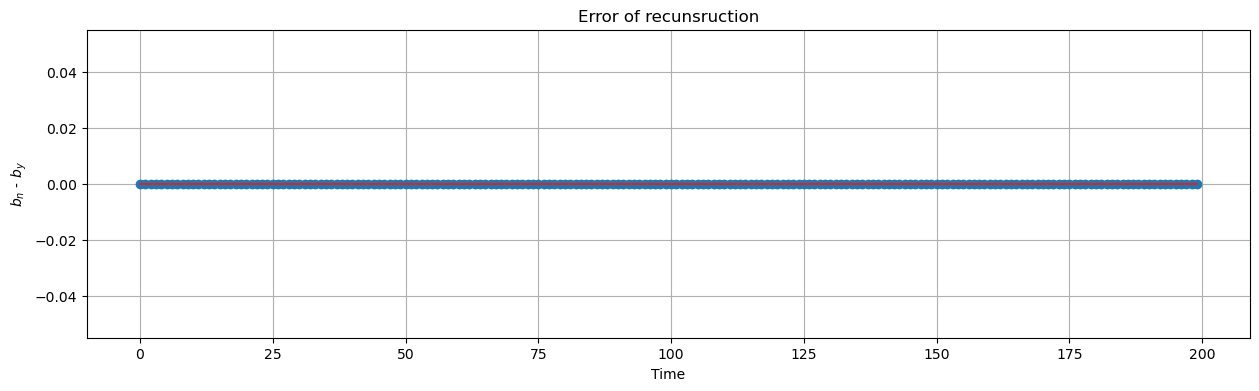

In [136]:
b_y = Combine(b_y1, b_y2)

# Plot b_y
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_y)
plt.title('sequence received by the receiver')
plt.xlabel('Time')
plt.ylabel(r'$b_y$')
plt.grid(True)
plt.show()


b_error = b_n - b_y

# Plot error of received sequence
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_error)
plt.ylabel(r'$b_n$ - $b_y$')
plt.xlabel('Time')
plt.title('Error of recunsruction')
plt.grid(True)
plt.show()



- b: assuming that the AWGN noise is added after the signal passes through the channel, draw the error probability in terms of the noise variance. Make the horizontal axis span large enough. Justify error-prone behavior.

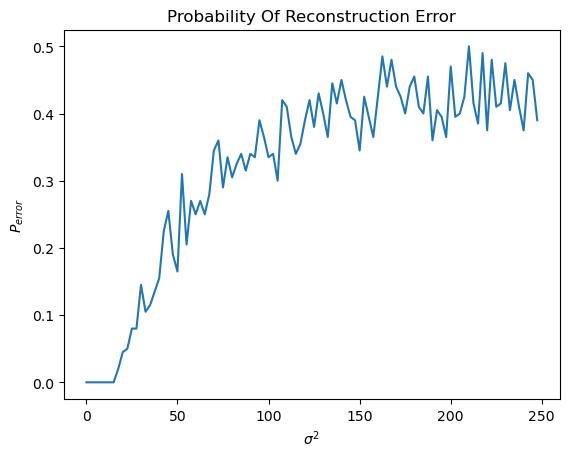

In [137]:
error = np.zeros(100)
for i in range(100):
    x_receive_affected = x_received_t + np.random.normal(0, 2.5 * i, len(x_received_t))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    b_hat = Combine(b_hat_1, b_hat_2)
    error[i] = np.sum((b_hat - b_n) ** 2) / len(b_n)

plt.figure()
plt.plot(np.arange(0, 10, 0.1) * 25, error)
plt.title('Probability Of Reconstruction Error')
plt.xlabel(r'$\sigma^2$')
plt.ylabel(r'$P_{error}$')
plt.show()

- c: According to the previous section, choose 6 different values for the noise variance, (so that it covers the meaningful intervals of the graph as well as possible). For each of these variances, draw a two-dimensional scatter plot of the output of the two Matched Filters.

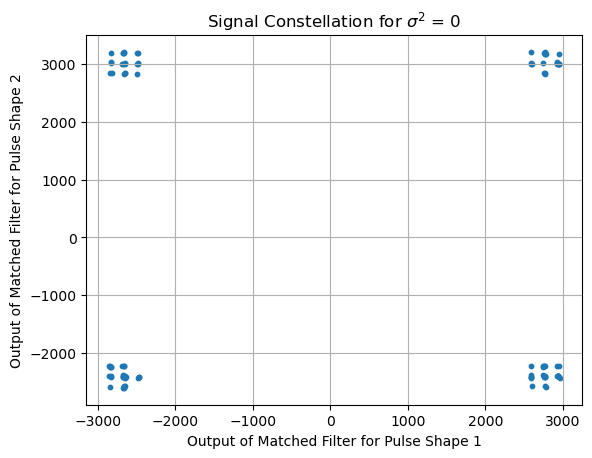

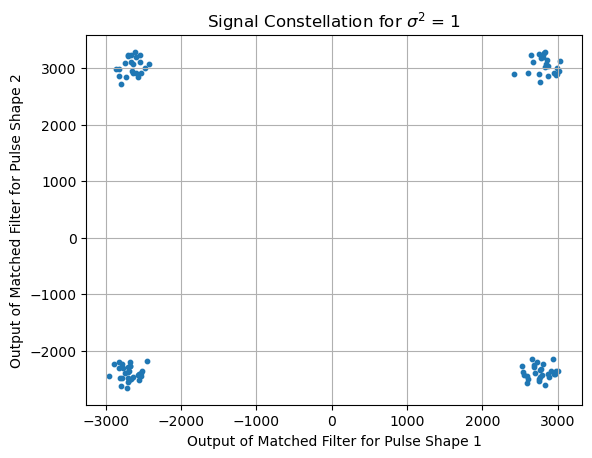

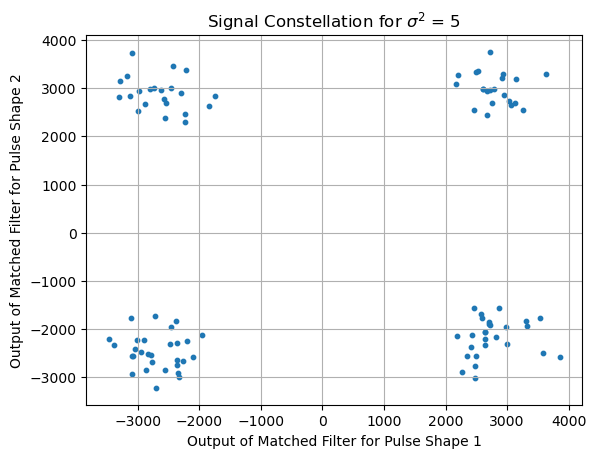

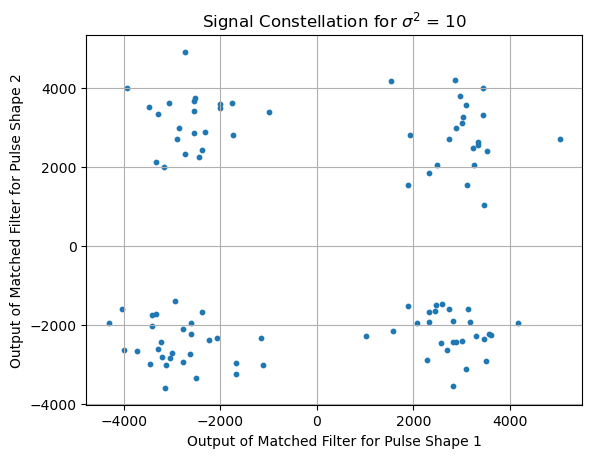

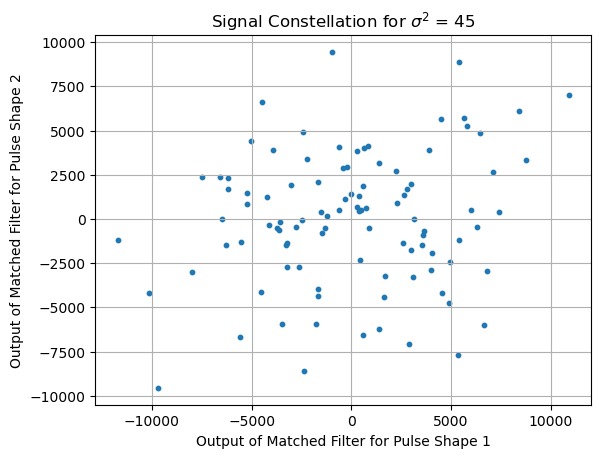

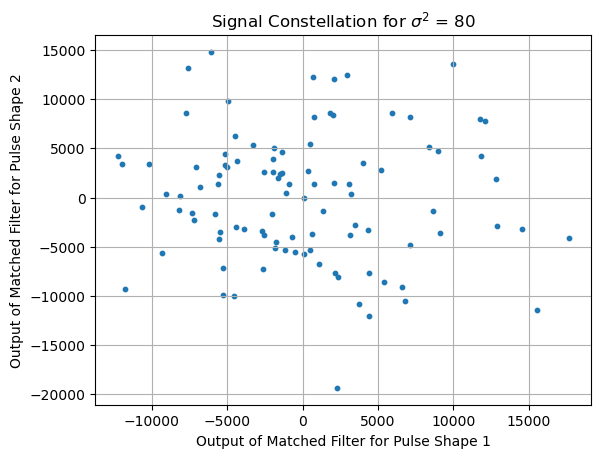

In [138]:
b1, b2 = Divide(b_n)
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)
xc_t = AnalogMod(x1_t, x2_t, fs, fc)
x_receive = Channel(xc_t, fs, fo, Bw)

for sigma in [0, 1, 5, 10, 45, 80]:
    x_receive_affected = x_receive + np.random.normal(0, sigma, len(x_receive))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    plt.figure()
    plt.scatter(MatFil_one_1, MatFil_one_2, s=10)
    plt.title(f'Signal Constellation for $\sigma^2$ = {sigma}')
    plt.xlabel('Output of Matched Filter for Pulse Shape 1')
    plt.ylabel('Output of Matched Filter for Pulse Shape 2')
    plt.grid(True)
    plt.show()


3. In this section, we want to use FSK modulation. As a result, we use a sinusoidal pulse with a frequency proportional to the bit value. Assume that its frequency is equal to 1 KHz for sending bit 1 and equal to 1.5 KHz for sending zero bit.

- a: Do the given frequencies form an orthogonal signaling? 

- b: Generate "long enough" sequences of zeros and ones. Simulate the process of sending this sequence, assuming no noise. Draw the waveform for the output of each block. (Consider drawing a reasonable amount of time so that your shapes are "beautiful"!)

In [139]:
fs = 1000000
T = 0.01 #step
fc = 10000
fo = 10000
Bw = 1000
t = np.arange(0, 10000) / fs


one_pulse = np.sin(2 * np.pi * 100 * t) 
zero_pulse = np.sin(2 * np.pi * 150 * t)


b_n = np.random.randint(2, size=200)  # Generate a random binary sequence of length 200
b1 , b2 = Divide(b_n)

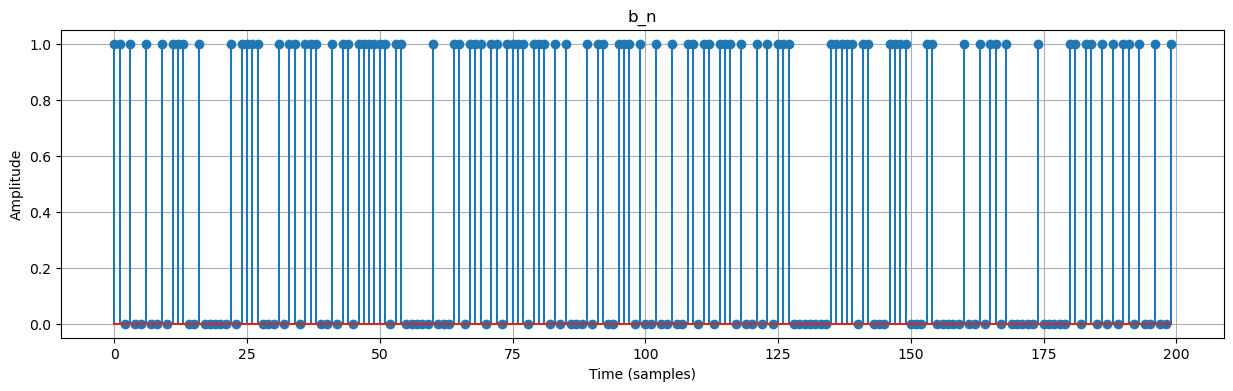

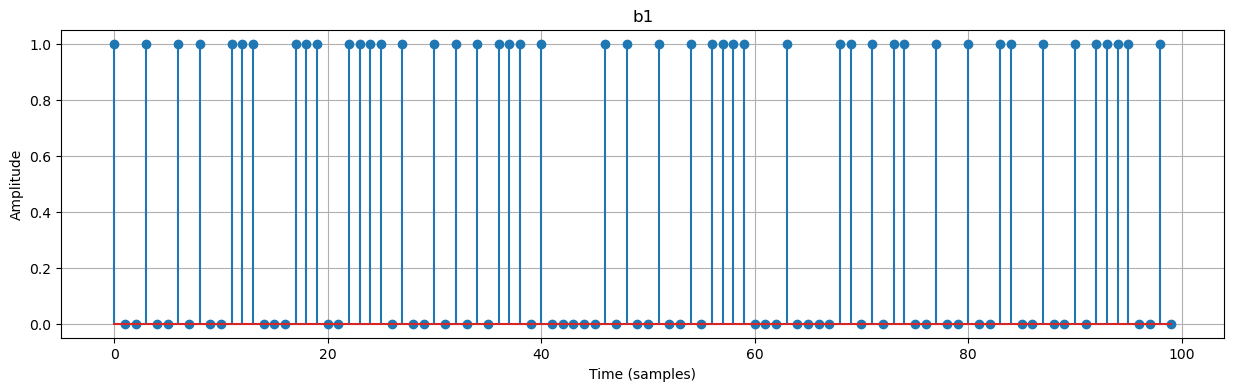

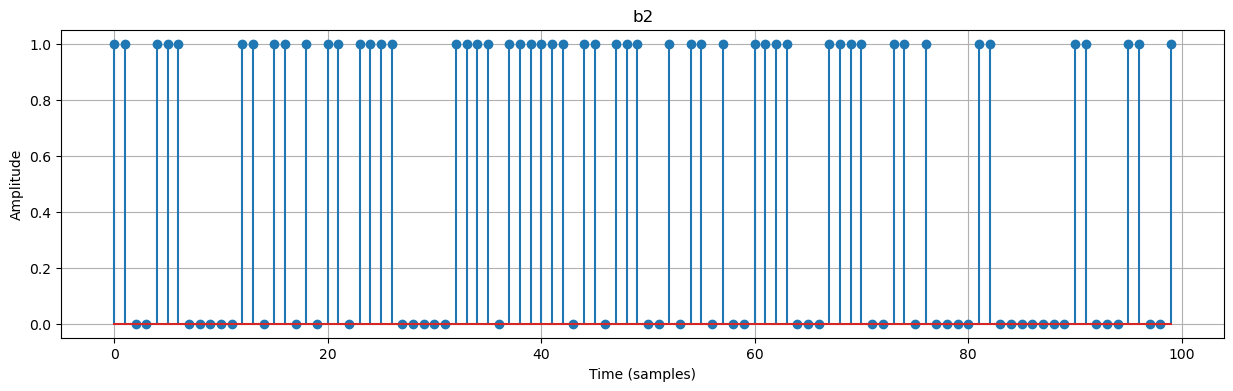

In [140]:
# Create time arrays for each signal
t_b1 = np.arange(len(b1))
t_b2 = np.arange(len(b2))
t_bn = np.arange(len(b_n))


# Plot b_n
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_n)
plt.title('b_n')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b1
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b1)
plt.title('b1')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b2
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b2)
plt.title('b2')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



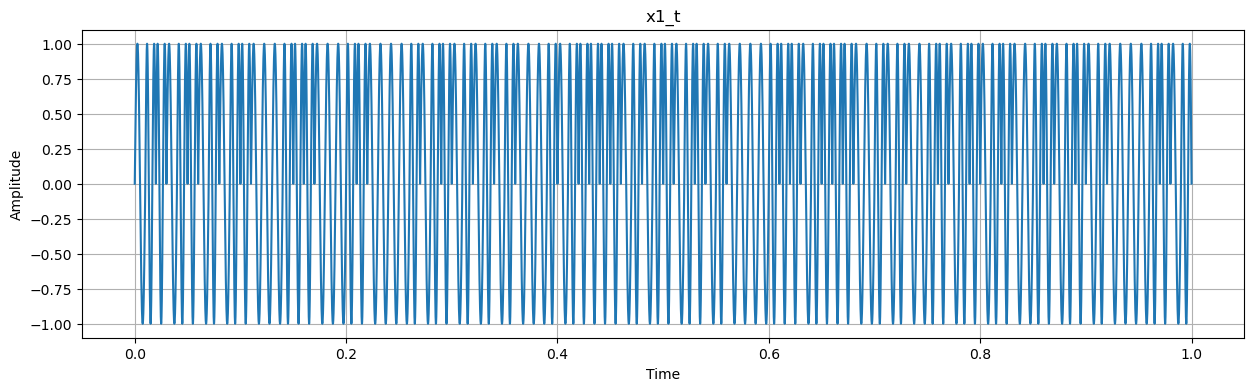

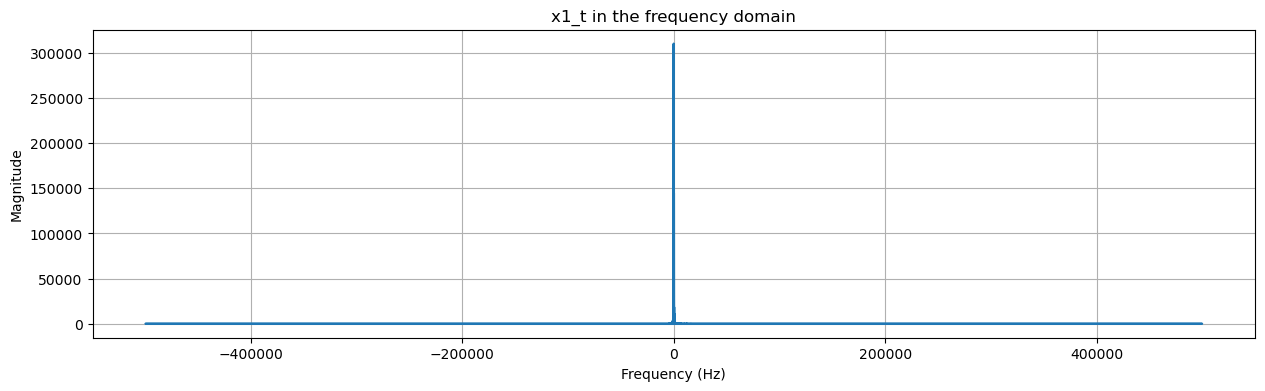

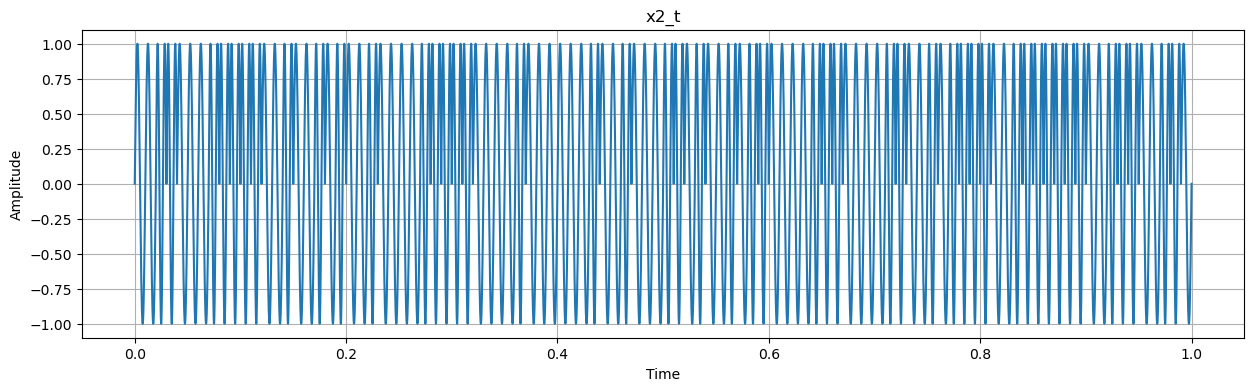

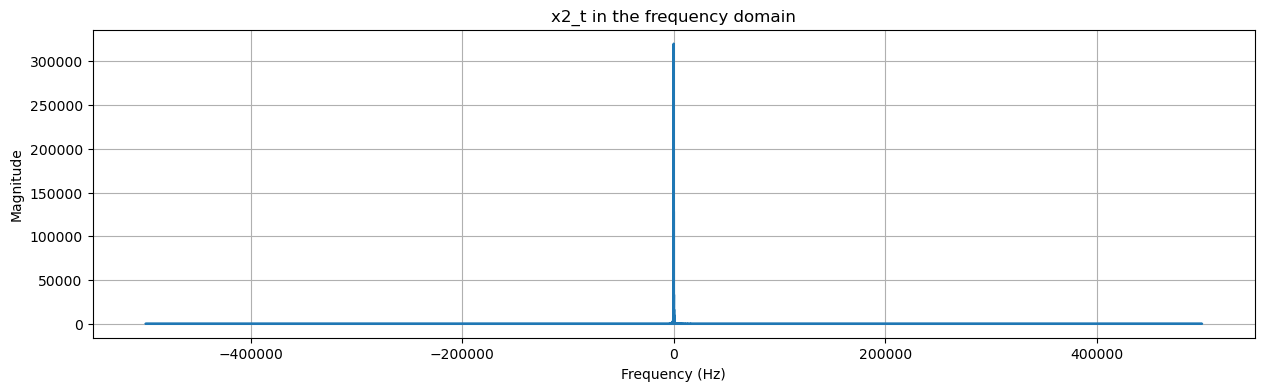

In [141]:
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)

# Create time arrays for each signal
t_x1 = np.arange(len(x1_t))
t_x2 = np.arange(len(x2_t))
time = np.arange(0, len(b_n)/2*T, 1/fs)

# Plot x1_t
plt.figure(figsize=(15, 4))
plt.plot(time, x1_t)
plt.title('x1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x1_t, fs, "x1_t in the frequency domain")

# Plot x2_t
plt.figure(figsize=(15, 4))
plt.plot(time, x2_t)
plt.title('x2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x2_t, fs, "x2_t in the frequency domain")


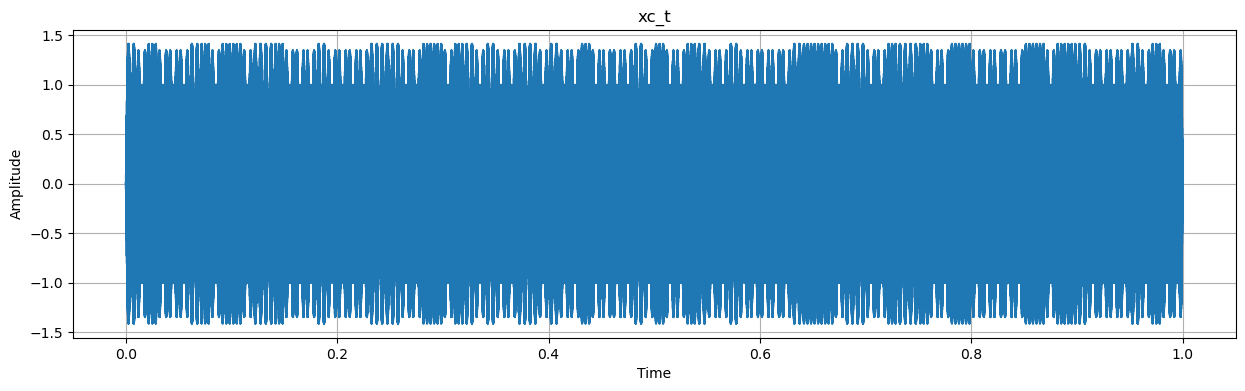

In [142]:
xc_t = AnalogMod(x1_t, x2_t, fs, fc)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, xc_t)
plt.title('xc_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



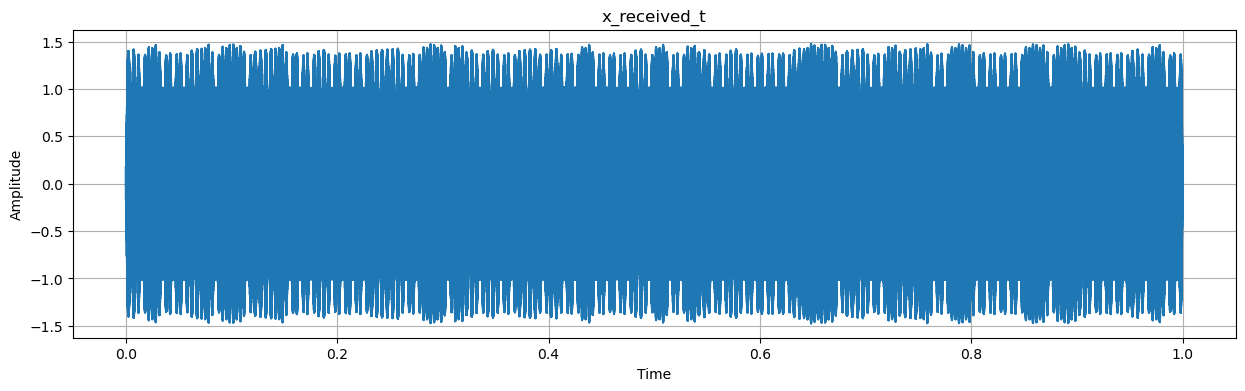

In [143]:
x_received_t = Channel(xc_t, fs, fc, Bw)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, x_received_t)
plt.title('x_received_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

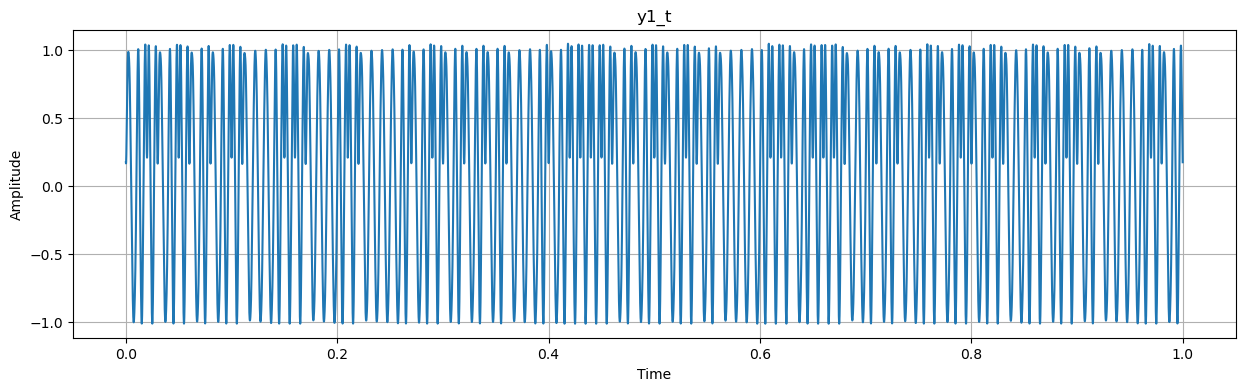

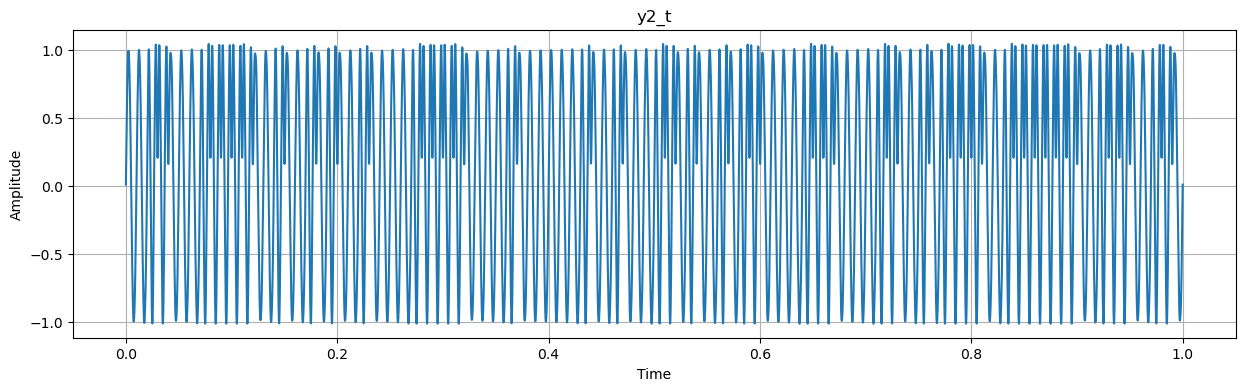

In [144]:
y1_t, y2_t = AnalogDemod(x_received_t, fs, fc, Bw)

# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time, y1_t)
plt.title('y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot y2_t
plt.figure(figsize=(15, 4))
plt.plot(time, y2_t)
plt.title('y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


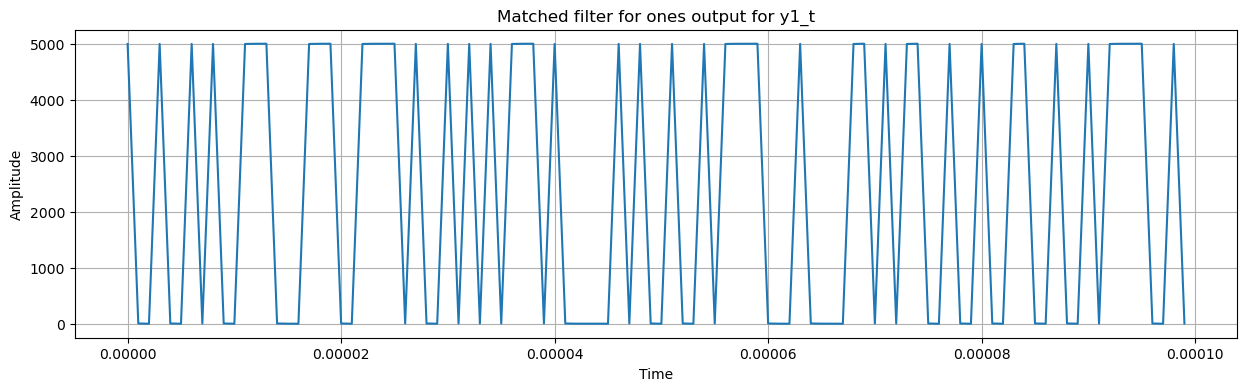

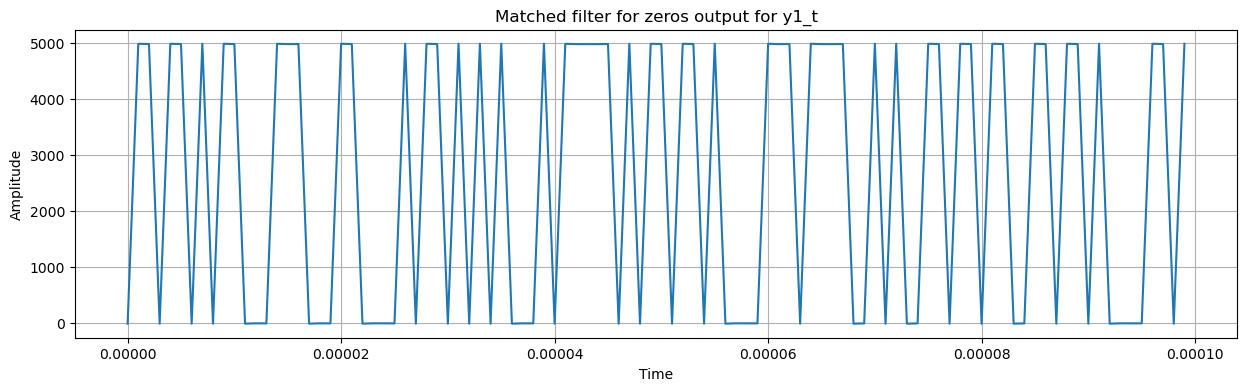

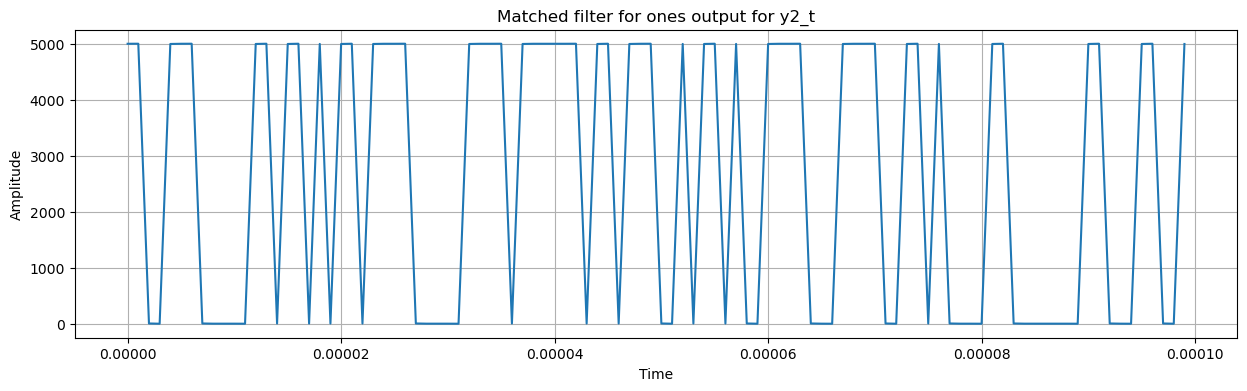

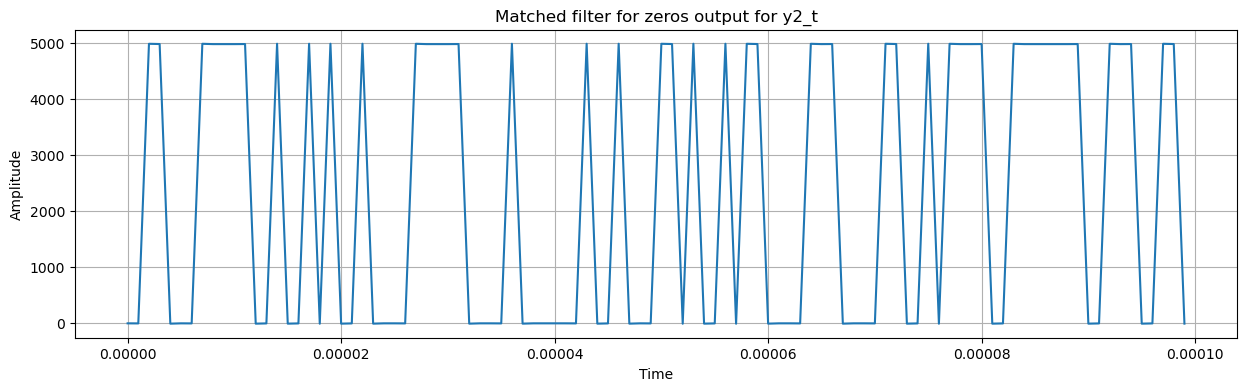

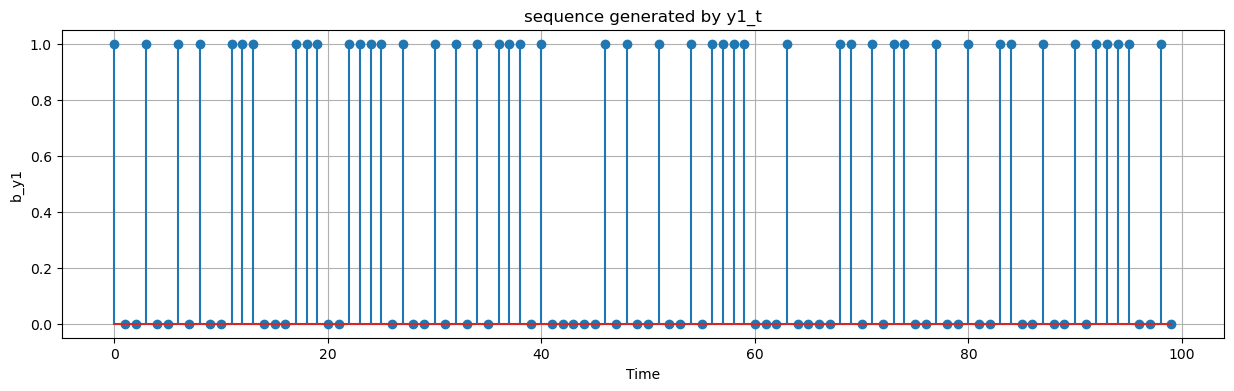

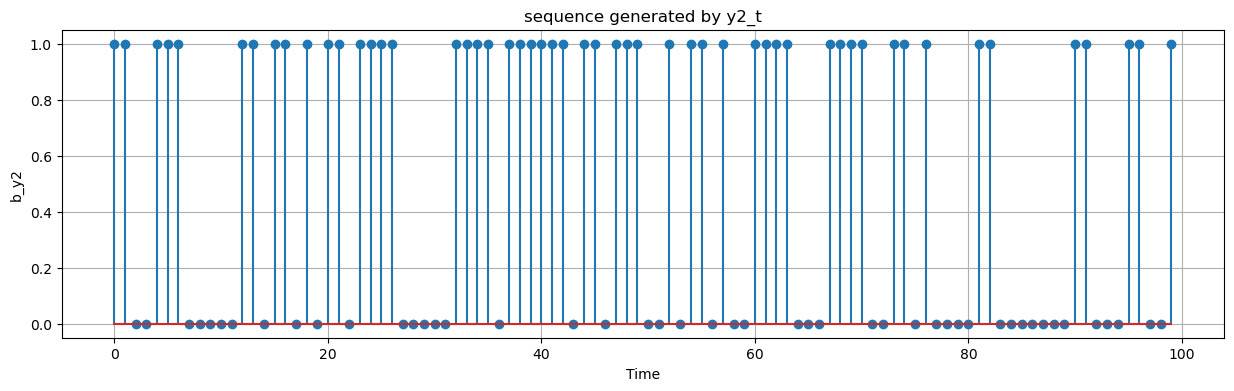

In [145]:
a_y11, a_y10 , b_y1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
a_y21, a_y20, b_y2 = MatchedFilt(y2_t, one_pulse, zero_pulse)

time_Matched = np.arange(len(a_y11)) / fs

# Plot a_y11
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y11)
plt.title('Matched filter for ones output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y10)
plt.title('Matched filter for zeros output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y21)
plt.title('Matched filter for ones output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y20)
plt.title('Matched filter for zeros output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b_y1)
plt.title('sequence generated by y1_t')
plt.xlabel('Time')
plt.ylabel('b_y1')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b_y2)
plt.title('sequence generated by y2_t')
plt.xlabel('Time')
plt.ylabel('b_y2')
plt.grid(True)
plt.show()


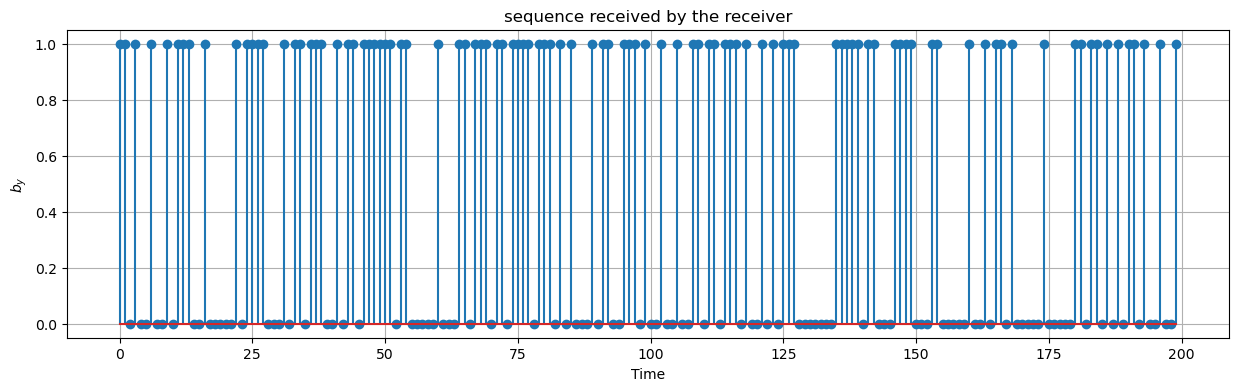

[1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1]
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0

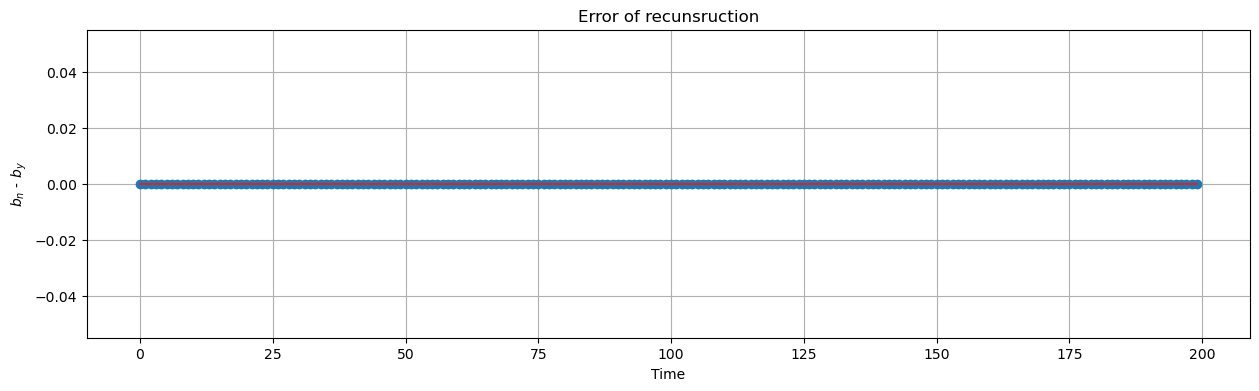

In [146]:
b_y = Combine(b_y1, b_y2)

# Plot b_y
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_y)
plt.title('sequence received by the receiver')
plt.xlabel('Time')
plt.ylabel(r'$b_y$')
plt.grid(True)
plt.show()


b_error = b_n - b_y
print(b_n)
print(b_y)

# Plot error of received sequence
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_error)
plt.ylabel(r'$b_n$ - $b_y$')
plt.xlabel('Time')
plt.title('Error of recunsruction')
plt.grid(True)
plt.show()



- c: assuming that the AWGN noise is added after the signal passes through the channel, draw the error probability in terms of the noise variance. Make the horizontal axis span large enough. Justify error-prone behavior.

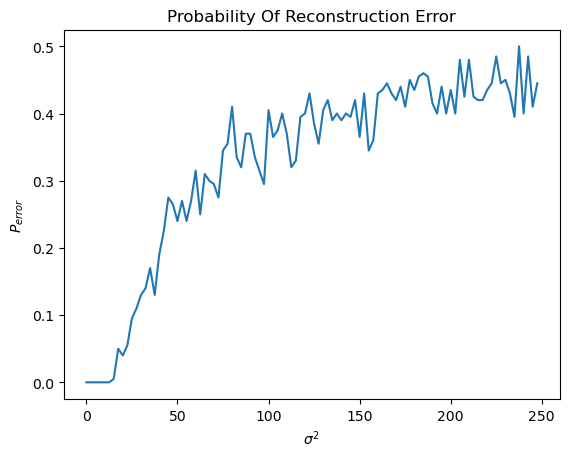

In [147]:
error = np.zeros(100)
for i in range(100):
    x_receive_affected = x_received_t + np.random.normal(0, 2.5 * i, len(x_received_t))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    b_hat = Combine(b_hat_1, b_hat_2)
    error[i] = np.sum((b_hat - b_n) ** 2) / len(b_n)

plt.figure()
plt.plot(np.arange(0, 10, 0.1) * 25, error)
plt.title('Probability Of Reconstruction Error')
plt.xlabel(r'$\sigma^2$')
plt.ylabel(r'$P_{error}$')
plt.show()

- d: According to the previous section, choose 6 different values for the noise variance, (so that it covers the meaningful intervals of the graph as well as possible). For each of these variances, draw a two-dimensional scatter plot of the output of the two Matched Filters.

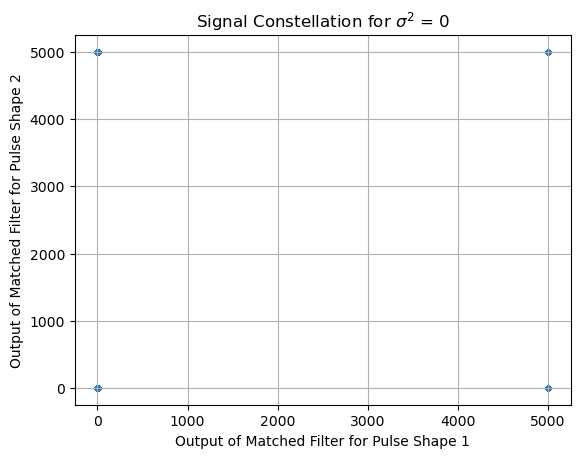

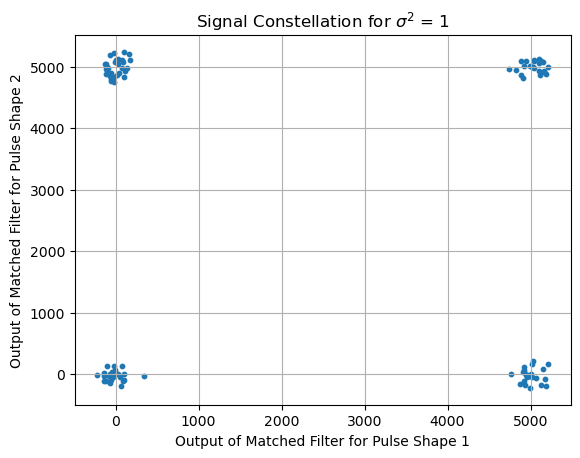

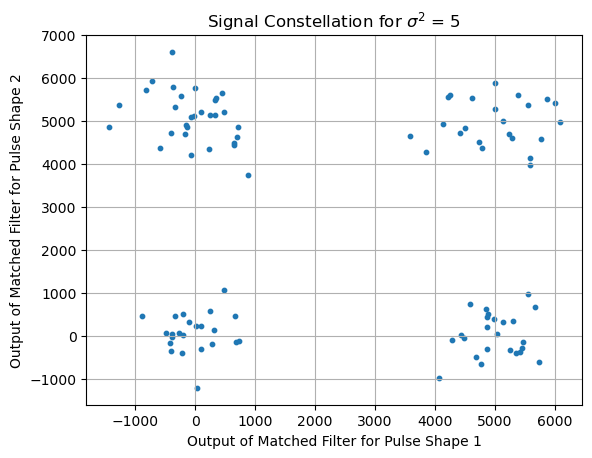

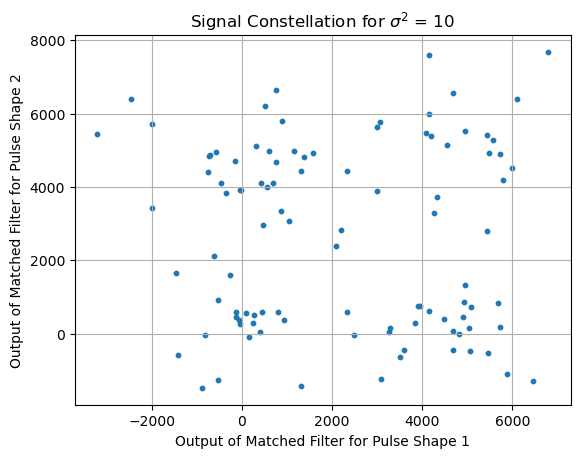

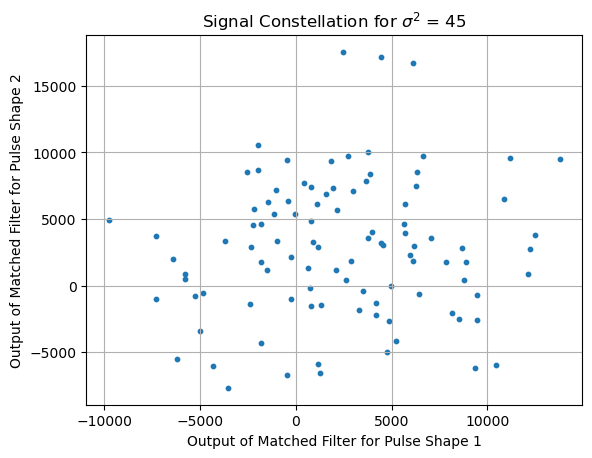

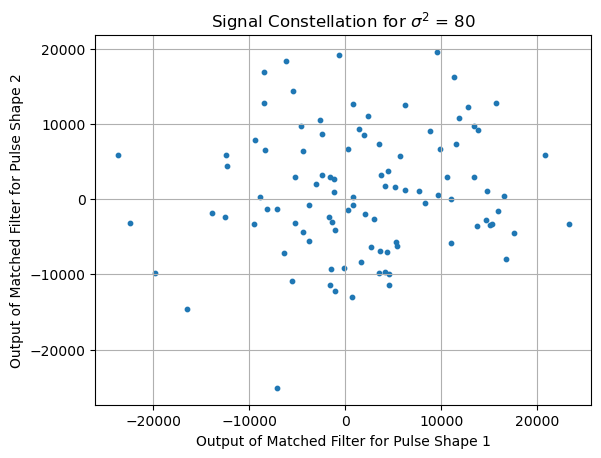

In [148]:
b1, b2 = Divide(b_n)
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)
xc_t = AnalogMod(x1_t, x2_t, fs, fc)
x_receive = Channel(xc_t, fs, fo, Bw)

for sigma in [0, 1, 5, 10, 45, 80]:
    x_receive_affected = x_receive + np.random.normal(0, sigma, len(x_receive))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    plt.figure()
    plt.scatter(MatFil_one_1, MatFil_one_2, s=10)
    plt.title(f'Signal Constellation for $\sigma^2$ = {sigma}')
    plt.xlabel('Output of Matched Filter for Pulse Shape 1')
    plt.ylabel('Output of Matched Filter for Pulse Shape 2')
    plt.grid(True)
    plt.show()


# 4. Transmit sequences of 8-bit numbers
In this part, we want to convert sequences of random numbers between 0 and 255 into sequences of numbers 0 and 1 and simulate their transfer. The main difference between this section and the previous section is the criterion for measuring the accuracy of the communication system. In this part, we will use the square of the difference of numbers instead of the probability of error.

1. Write a function named  <span style="color:red">SourceGenerator</span> that takes sequences of integers between 0 and 255 and gives the corresponding binary sequence as output. Write the inverse system of this function as a function called  <span style="color:red">OutputDecoder</span>. 


In [149]:
def SourceGenerator(sequence):
    binary_sequence = []
    for num in sequence:
        binary = bin(num)[2:].zfill(8)
        binary_sequence.extend(list(map(int, binary)))
    return np.array(binary_sequence)

def OutputDetector(binary_sequence):
    output_sequence = []
    for i in range(0, len(binary_sequence), 8):
        binary_num = binary_sequence[i:i+8]
        decimal_num = int(''.join(map(str, binary_num)), 2)
        output_sequence.append(decimal_num)
    return np.array(output_sequence)


test = [10,5,15,255]
out_gen = SourceGenerator(test)
print(out_gen)

out_det = OutputDetector(out_gen)
print(out_det)


[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[ 10   5  15 255]


2. Generate sufficiently long sequences of integers between 0 and 255. Simulate their communications. (Take the shape of the pulses as a square and the specifications of the system according to the previous section) Draw the variance of the reconstruction error of these numbers in terms of the noise variance. 


In [150]:
fs = 1000000
T = 0.01
fc = 10000
fo = 10000
Bw = 1000

one_pulse = np.ones(10000)    # Pulse signal of ones
one_pulse[5000:] = 0          # Truncate the pulse signal

zero_pulse = -np.ones(10000)  # Pulse signal of -1 (negative ones)
zero_pulse[5000:] = 0         # Truncate the pulse signal

#Generate 200 random numbers between 0 and 255
input_numbers = np.random.randint(0 , 255 , size=100)  # Generate a random binary sequence of length 200

print(input_numbers)
binary_input = SourceGenerator(input_numbers)

b1 , b2 = Divide(binary_input)
print(binary_input)


[ 43  84  32 223 173  87  12  40 187 127  42 246  95  80  94 160 225 180
  88 221 203 172 217  85 114 242 122 129 154  98 254 102 214 190  89 211
 250 143 231 239 194  60 145 174 181 106 133  38 108  58 119 158   9  31
  23 217 143  32 153 186  79 135  26 173  57 144 128 169 241 237 242   9
 229 183  94 159 151 248 239  84  57 229 202 213  63 111  77  42 204 148
 200 186  91 181 167 103 144 186  96 156]
[0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1

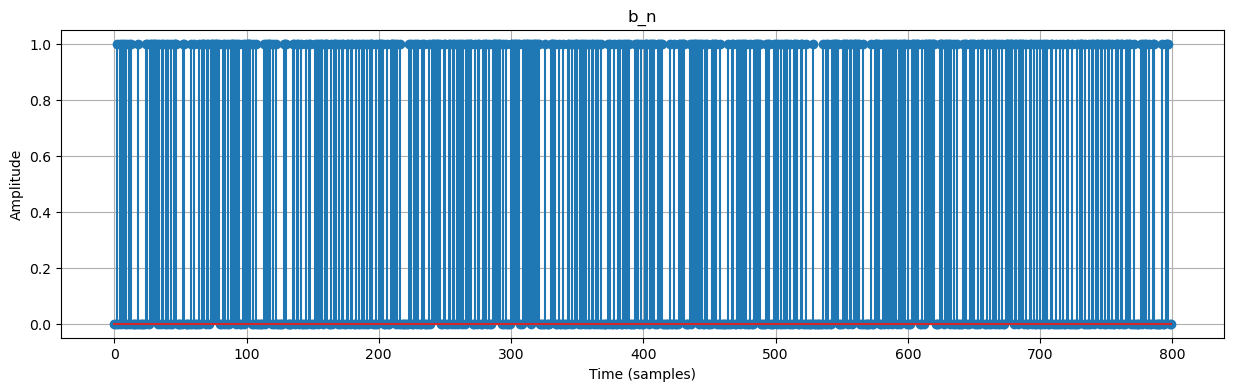

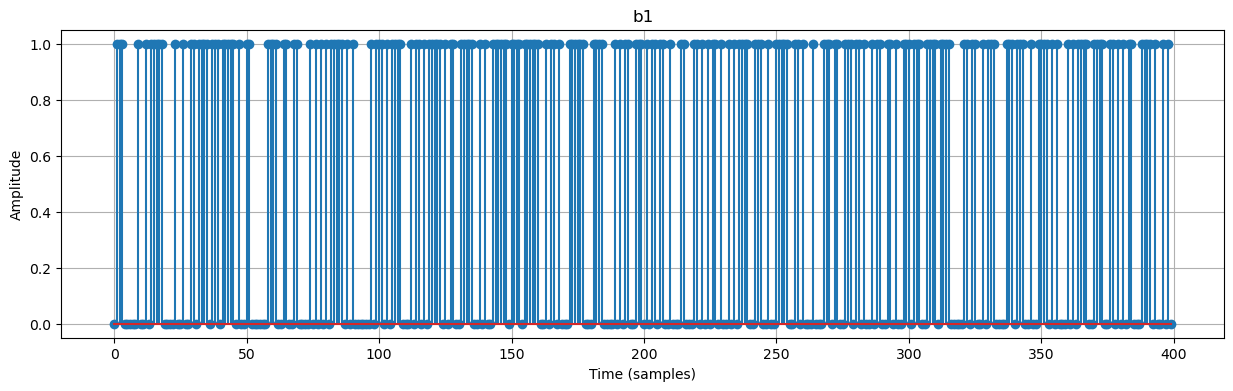

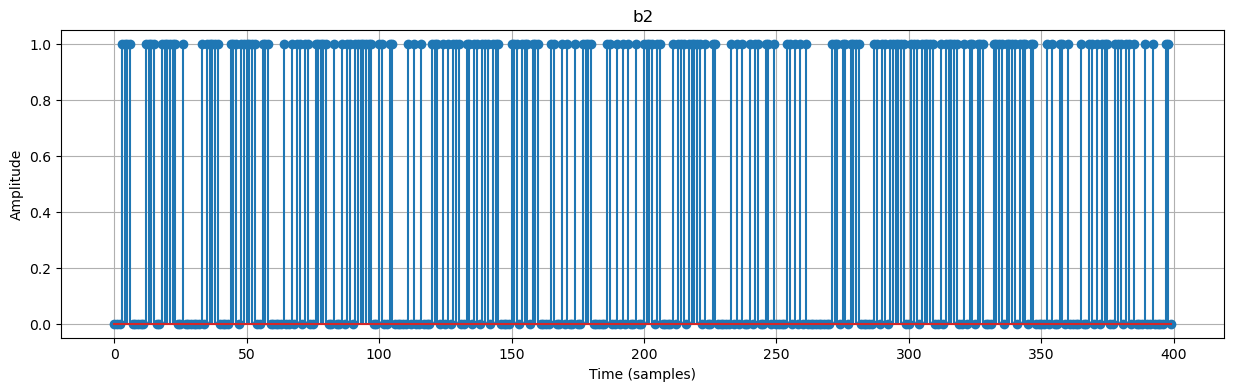

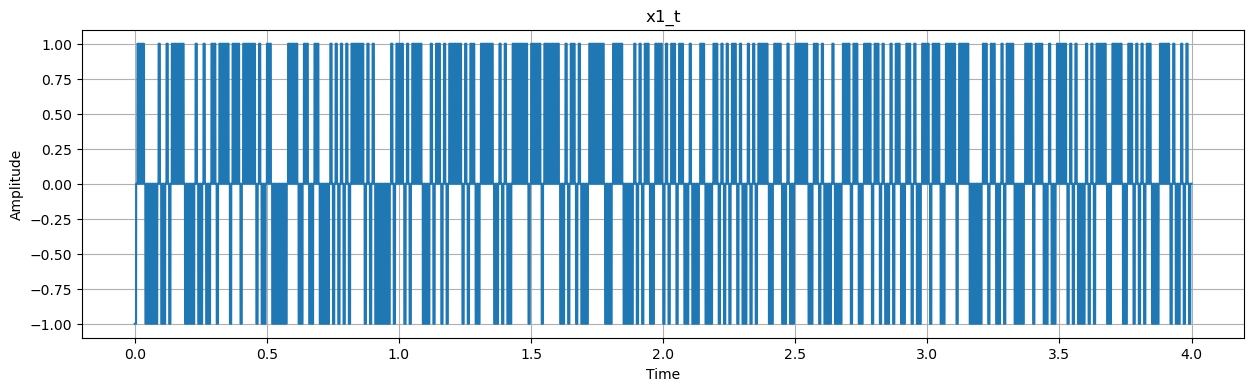

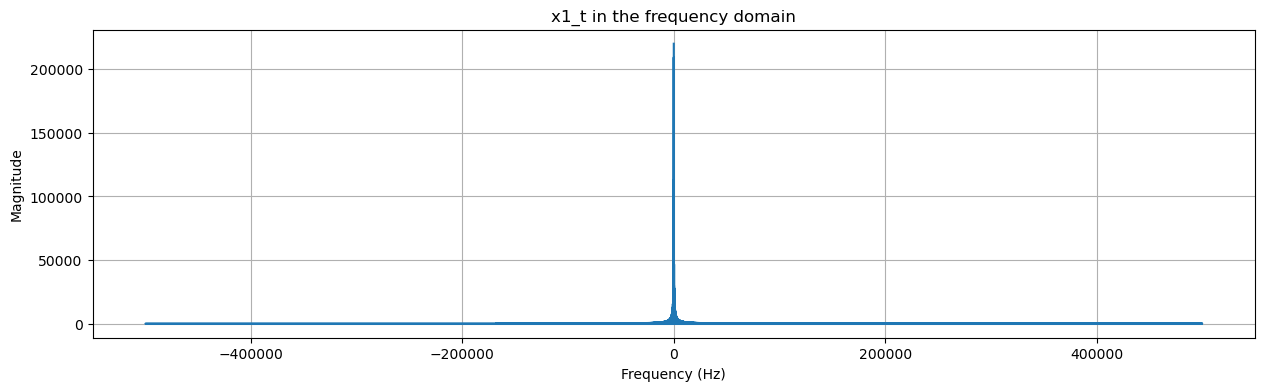

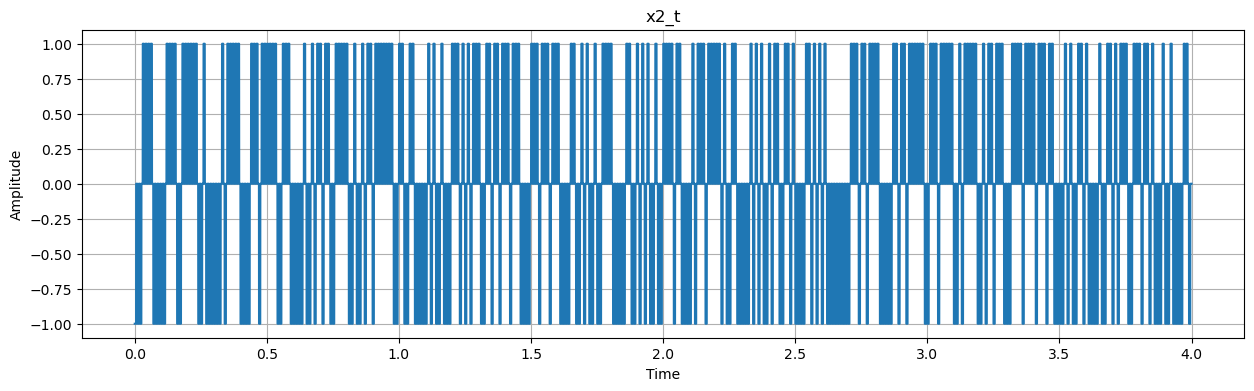

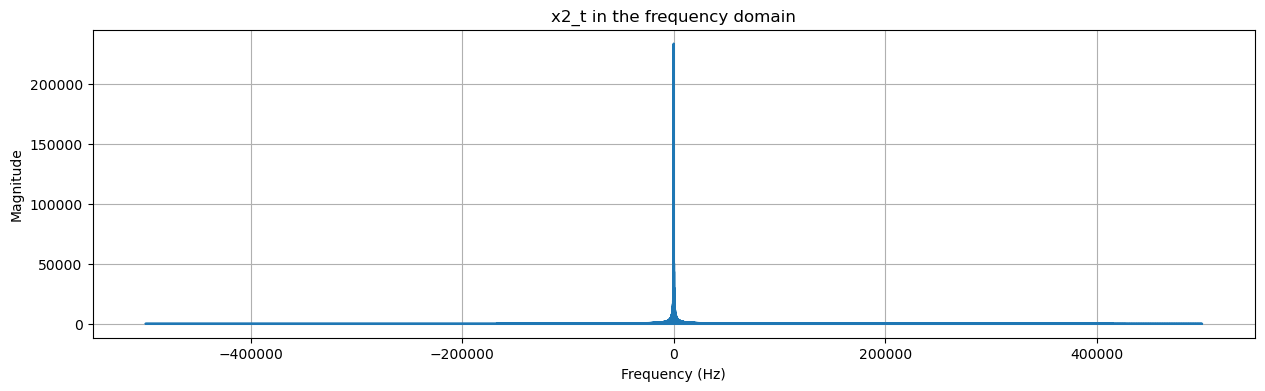

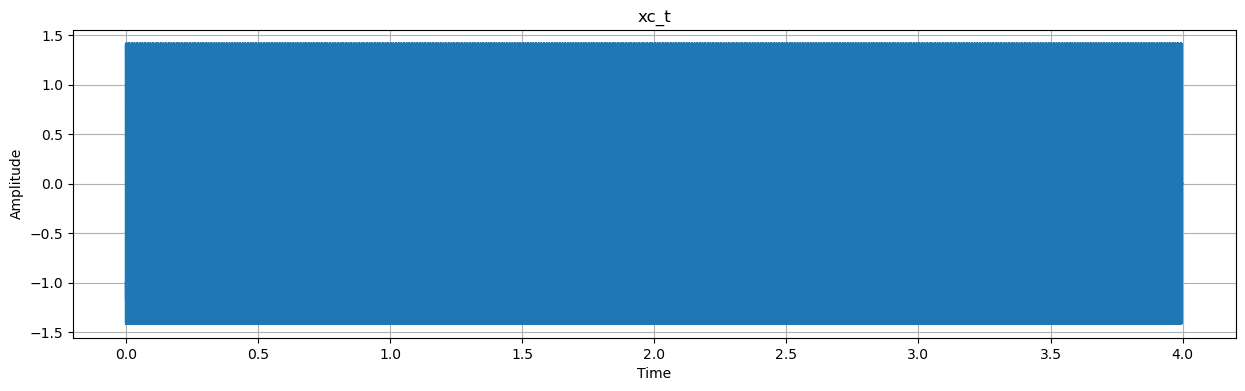

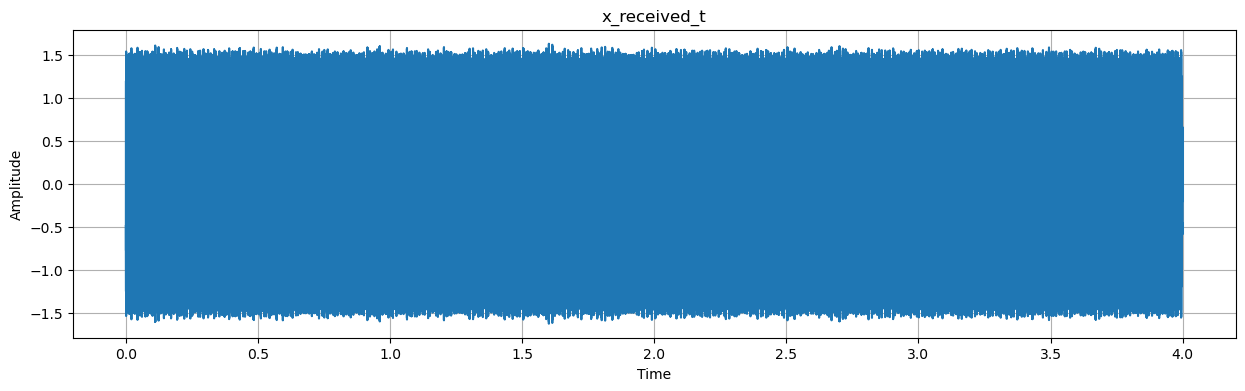

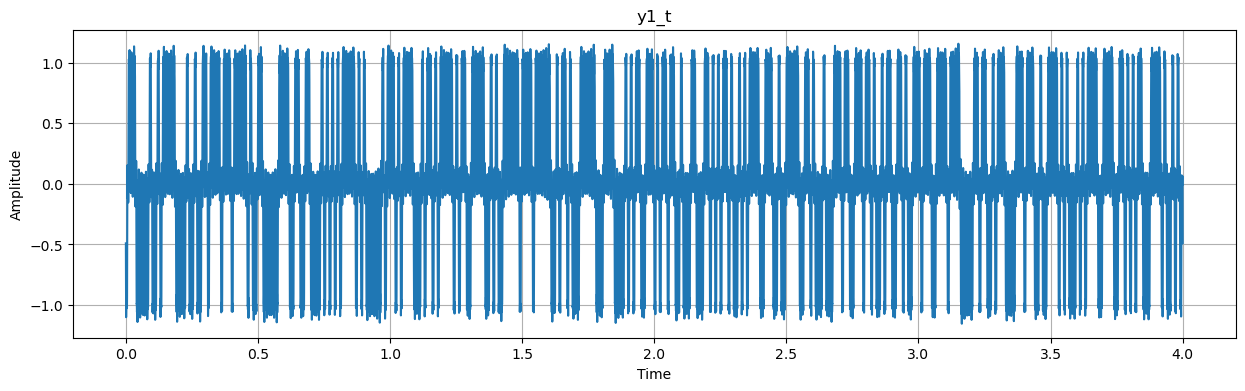

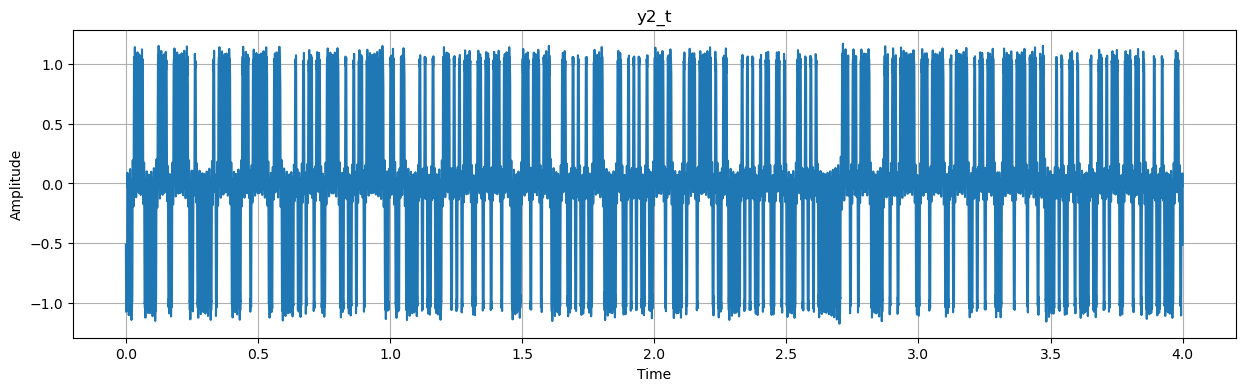

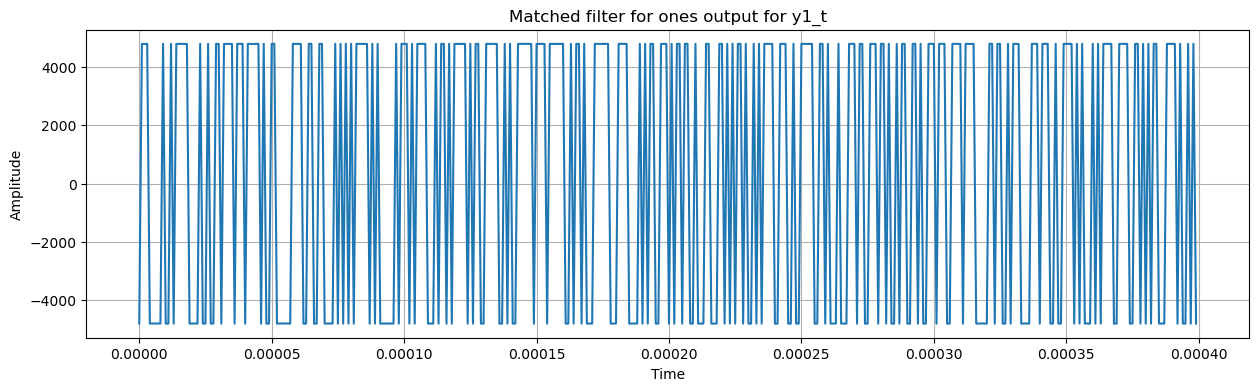

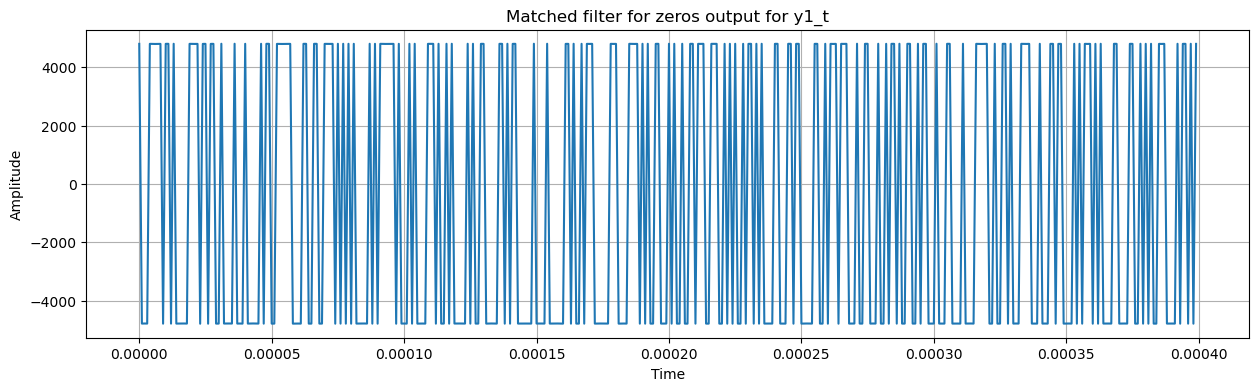

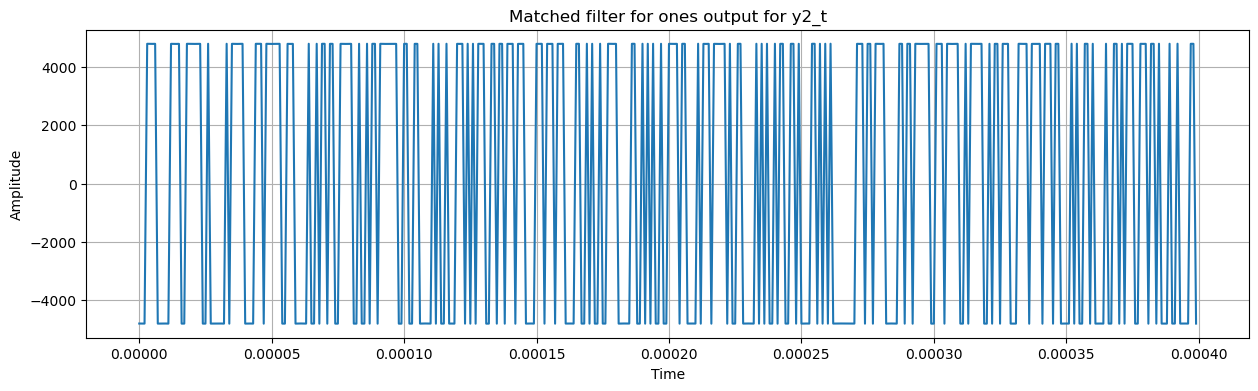

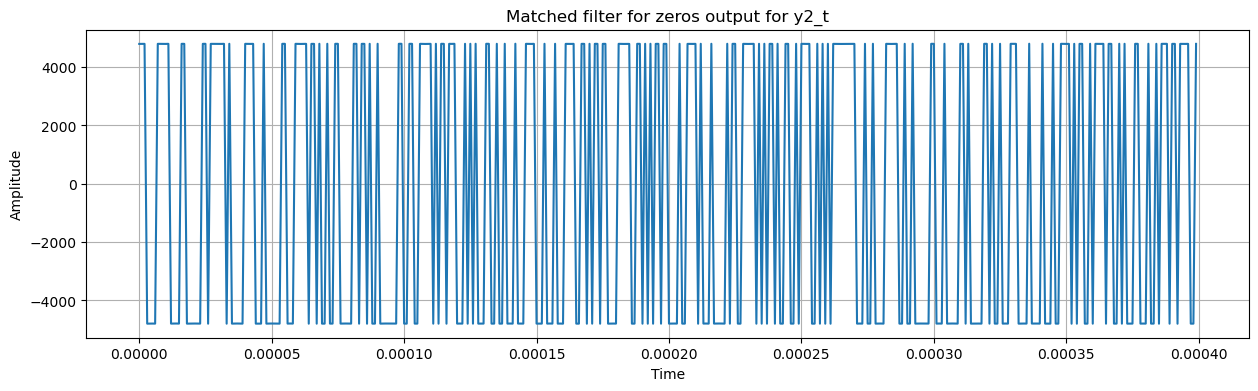

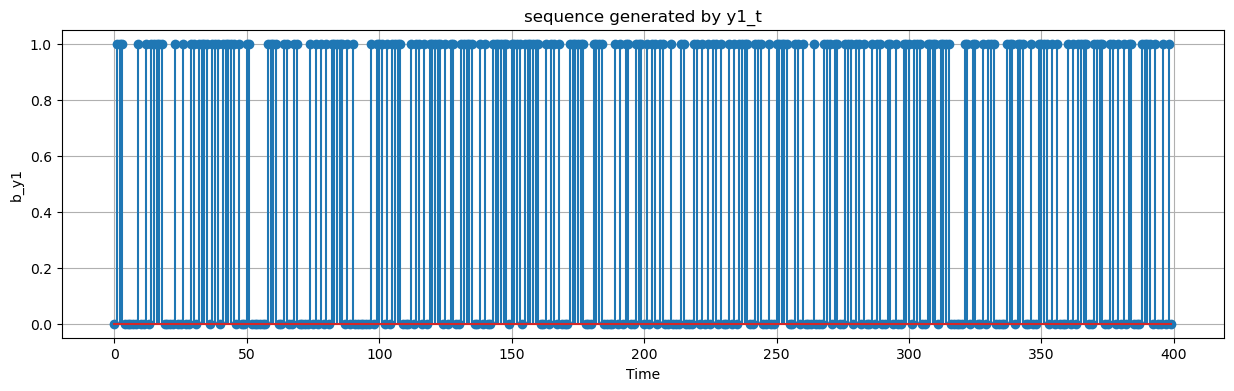

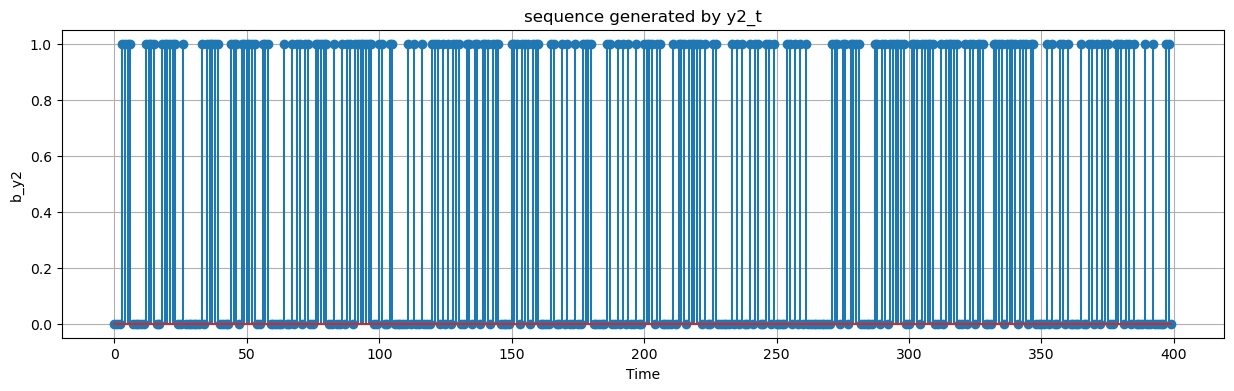

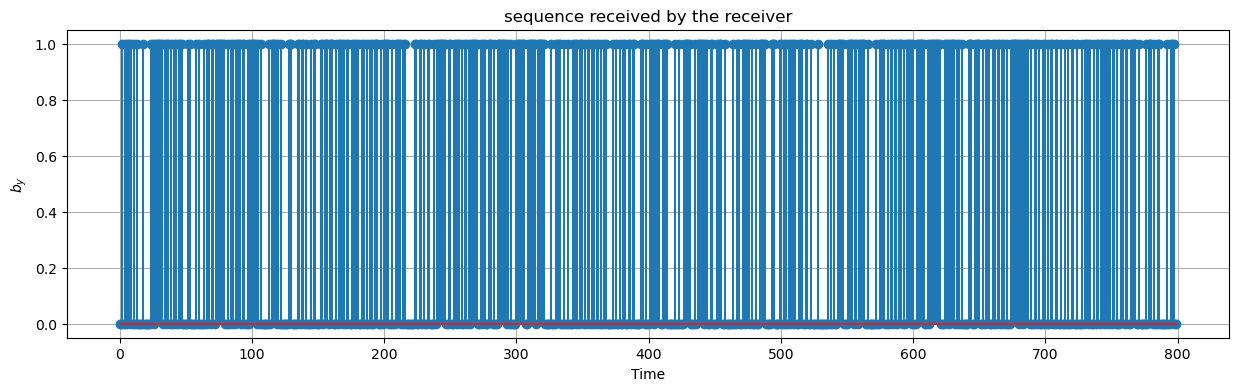

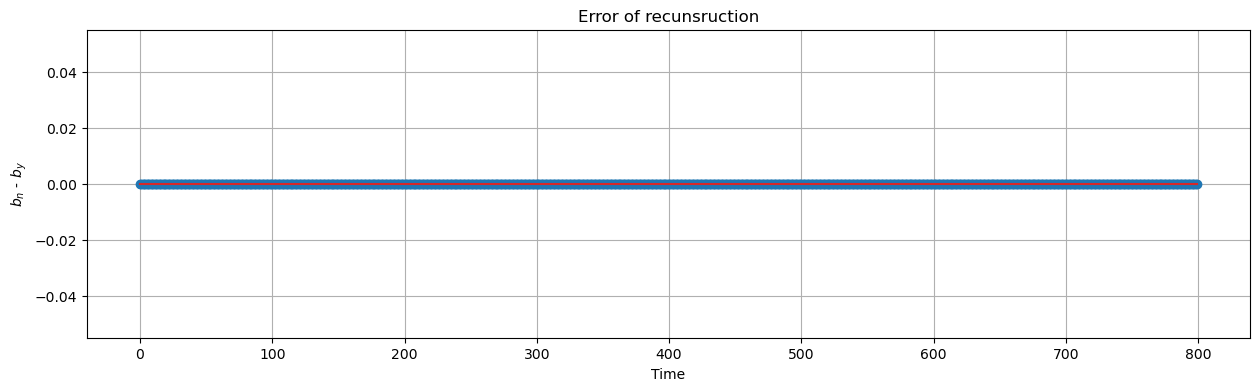

In [151]:
# Create time arrays for each signal
t_b1 = np.arange(len(b1))
t_b2 = np.arange(len(b2))
t_bn = np.arange(len(binary_input))


# Plot b_n
plt.figure(figsize=(15, 4))
plt.stem(t_bn, binary_input)
plt.title('b_n')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b1
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b1)
plt.title('b1')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot b2
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b2)
plt.title('b2')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

################################################################
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)

# Create time arrays for each signal
t_x1 = np.arange(len(x1_t))
t_x2 = np.arange(len(x2_t))
time = np.arange(0, len(binary_input)/2*T, 1/fs)

# Plot x1_t
plt.figure(figsize=(15, 4))
plt.plot(time, x1_t)
plt.title('x1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x1_t, fs, "x1_t in the frequency domain")

# Plot x2_t
plt.figure(figsize=(15, 4))
plt.plot(time, x2_t)
plt.title('x2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plot_fft(x2_t, fs, "x2_t in the frequency domain")


################################################################
xc_t = AnalogMod(x1_t, x2_t, fs, fc)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, xc_t)
plt.title('xc_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


################################################################
x_received_t = Channel(xc_t, fs, fc, Bw)

# Plot xc_t
plt.figure(figsize=(15, 4))
plt.plot(time, x_received_t)
plt.title('x_received_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

################################################################
y1_t, y2_t = AnalogDemod(x_received_t, fs, fc, Bw)

# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time, y1_t)
plt.title('y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot y2_t
plt.figure(figsize=(15, 4))
plt.plot(time, y2_t)
plt.title('y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


################################################################
a_y11, a_y10 , b_y1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
a_y21, a_y20, b_y2 = MatchedFilt(y2_t, one_pulse, zero_pulse)

time_Matched = np.arange(len(a_y11)) / fs

# Plot a_y11
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y11)
plt.title('Matched filter for ones output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y10)
plt.title('Matched filter for zeros output for y1_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y21)
plt.title('Matched filter for ones output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.plot(time_Matched, a_y20)
plt.title('Matched filter for zeros output for y2_t')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b1, b_y1)
plt.title('sequence generated by y1_t')
plt.xlabel('Time')
plt.ylabel('b_y1')
plt.grid(True)
plt.show()
# Plot y1_t
plt.figure(figsize=(15, 4))
plt.stem(t_b2, b_y2)
plt.title('sequence generated by y2_t')
plt.xlabel('Time')
plt.ylabel('b_y2')
plt.grid(True)
plt.show()


################################################################
b_y = Combine(b_y1, b_y2)

# Plot b_y
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_y)
plt.title('sequence received by the receiver')
plt.xlabel('Time')
plt.ylabel(r'$b_y$')
plt.grid(True)
plt.show()


b_error = binary_input - b_y

# Plot error of received sequence
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_error)
plt.ylabel(r'$b_n$ - $b_y$')
plt.xlabel('Time')
plt.title('Error of recunsruction')
plt.grid(True)
plt.show()



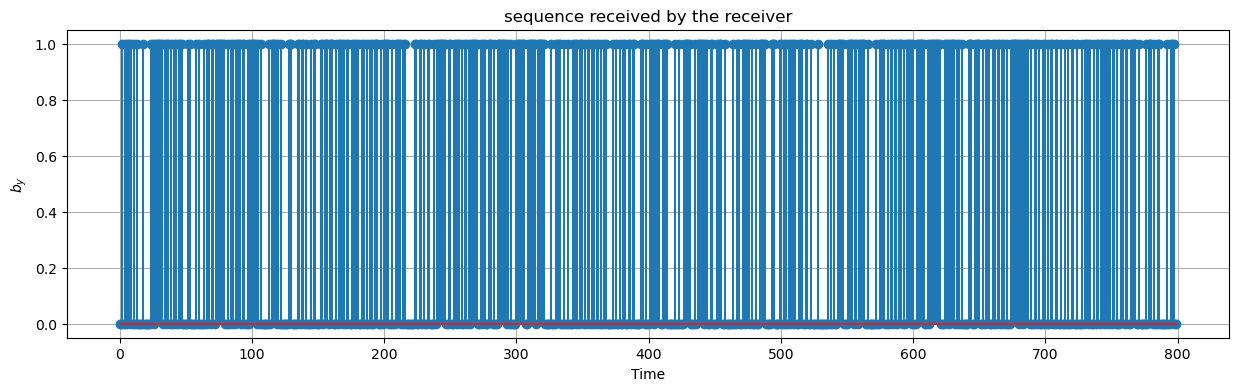

[0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1
 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0
 1 0 0 1 1 1 1 1 0 0 0 0 

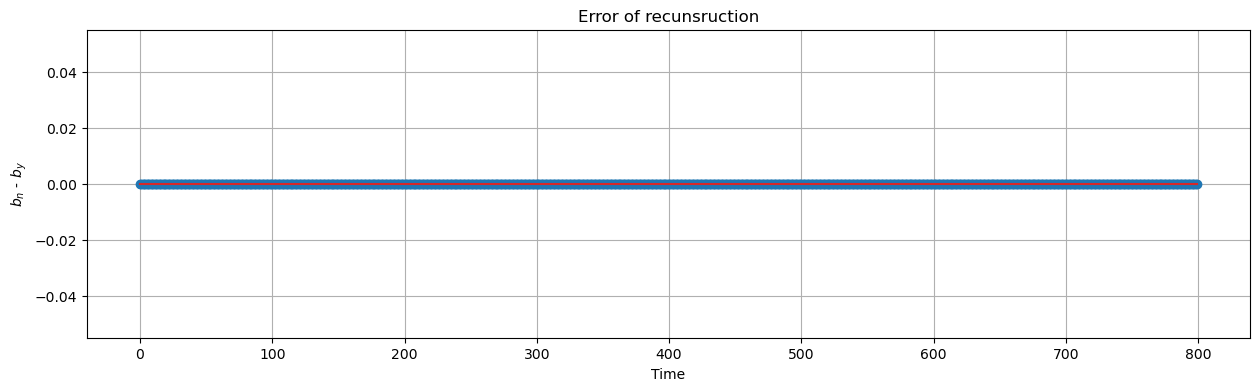

In [152]:
################################################################
b_y = Combine(b_y1, b_y2)

# Plot b_y
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_y)
plt.title('sequence received by the receiver')
plt.xlabel('Time')
plt.ylabel(r'$b_y$')
plt.grid(True)
plt.show()

print(binary_input)
print(b_y)
b_error = binary_input - b_y



# Plot error of received sequence
plt.figure(figsize=(15, 4))
plt.stem(t_bn, b_error)
plt.ylabel(r'$b_n$ - $b_y$')
plt.xlabel('Time')
plt.title('Error of recunsruction')
plt.grid(True)
plt.show()

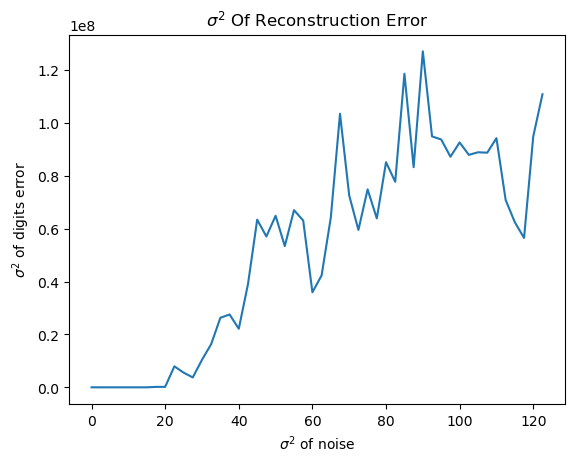

In [154]:
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)
xc_t = AnalogMod(x1_t, x2_t, fs, fc)
x_receive = Channel(xc_t, fs, fo, Bw)

error = np.zeros(50)
for i in range(50):
    x_receive_affected = x_received_t + np.random.normal(0, 2.5 * i, len(x_received_t))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    b_hat = Combine(b_hat_1, b_hat_2)
    reconstructed_input = OutputDetector(b_hat)
    error[i] = np.var((input_numbers - reconstructed_input)**2)
    
plt.figure()
plt.plot(np.arange(0, 5, 0.1) * 25 , error)
plt.title(r'$\sigma^2$ Of Reconstruction Error')
plt.xlabel(r'$\sigma^2$ of noise')
plt.ylabel(r'$\sigma^2$ of digits error')
plt.show()

3. In the continuation of the previous section, draw the error distribution for several specific noise variances. What is the behavior of the limit of this distribution?

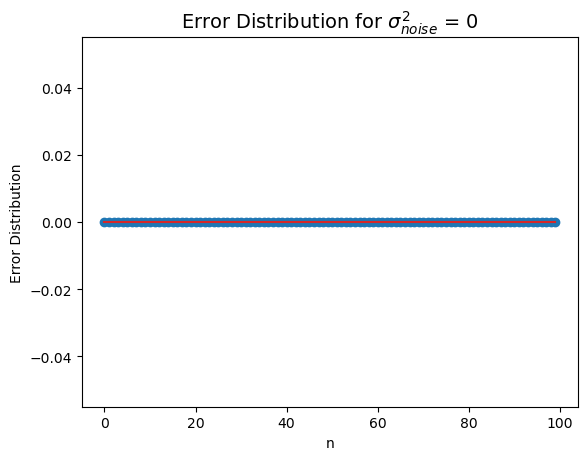

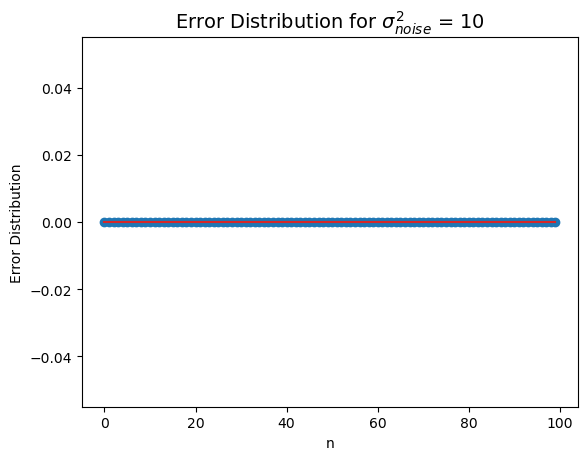

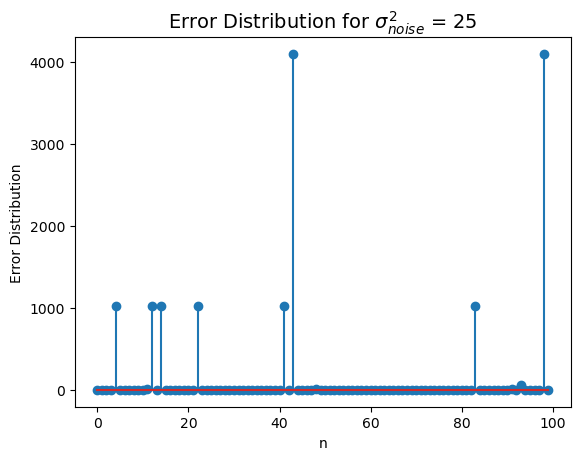

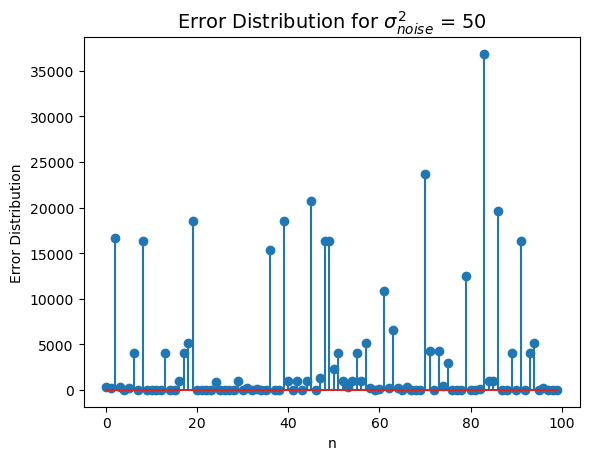

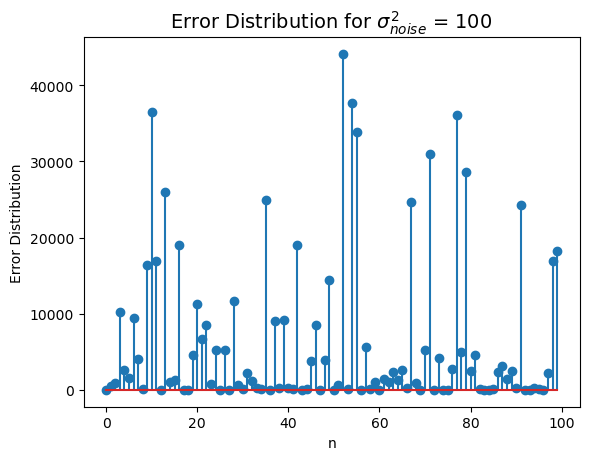

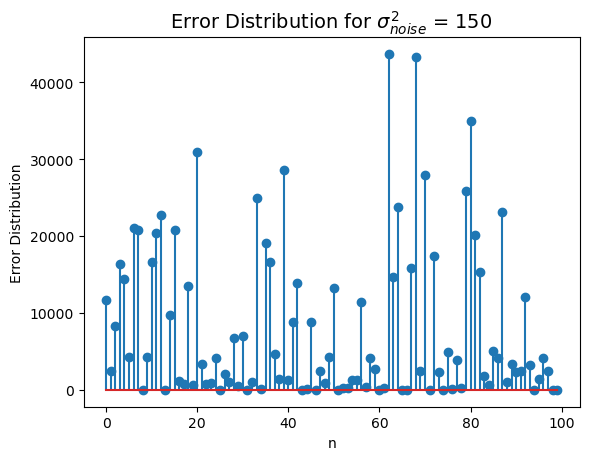

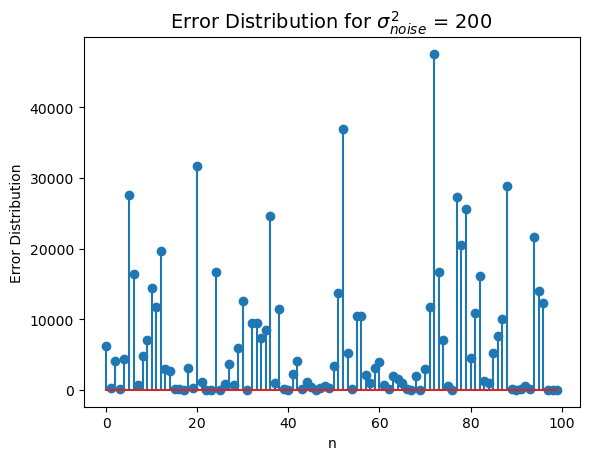

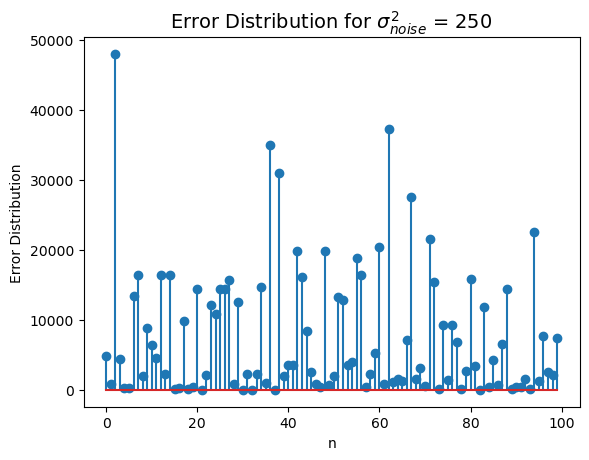

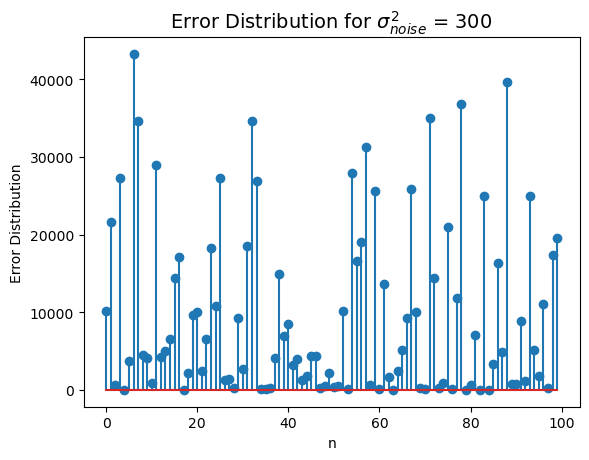

In [155]:
x1_t = PulseShaping(zero_pulse, one_pulse, b1)
x2_t = PulseShaping(zero_pulse, one_pulse, b2)
xc_t = AnalogMod(x1_t, x2_t, fs, fc)
x_receive = Channel(xc_t, fs, fo, Bw)

for sigma in [0, 10, 25, 50, 100, 150, 200, 250, 300]:
    x_receive_affected = x_received_t + np.random.normal(0, sigma, len(x_received_t))
    y1_t, y2_t = AnalogDemod(x_receive_affected, fs , fc , Bw)
    MatFil_one_1, MatFil_zero_1, b_hat_1 = MatchedFilt(y1_t, one_pulse, zero_pulse)
    MatFil_one_2, MatFil_zero_2, b_hat_2 = MatchedFilt(y2_t, one_pulse, zero_pulse)
    b_hat = Combine(b_hat_1, b_hat_2)
    reconstructed_input = OutputDetector(b_hat)
    error = (reconstructed_input - input_numbers) ** 2
    
    
    plt.figure()
    plt.stem(error)
    plt.title('Error Distribution for $\sigma^2_{noise}$ = ' + str(sigma) , fontsize=14)
    plt.xlabel("n")
    plt.ylabel("Error Distribution")
    plt.show()

4. In case the noise tends to infinity, calculate the error variance analytically. Is it consistent with what you see?

# 5. Compander
In this section, we want to examine the effect of using Companding. In other words, there is a quantizer instead of a communication channel. First, we pass an audio data through the telecommunication channel and calculate the SNR ratio. Next, we will use a compander to reduce the effect of nonlinear distortion in the channel.

1. You have seen in the lesson that the function $F_{\mu}(x)$ is as follows : 

 <p align="center">
  <img src="Q5_1.png" alt="Image description" width="250" height="75"><br>
</p>

Plot this function in "suitable" intervals for several different values of μ. Explain how to change the behavior of the function.

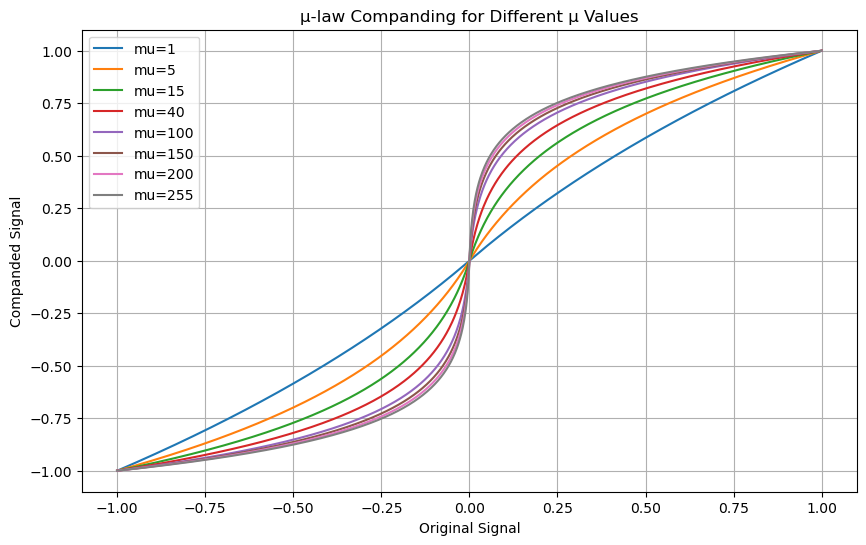

In [156]:
def mu_law_companding(signal, mu=255):
    return np.sign(signal) * np.log(1 + mu * np.abs(signal)) / np.log(1 + mu)

# Generate a sinusoidal signal
t = np.linspace(-1, 1, 1000)

mu_list = [1,5,15,40,100,150,200 , 255]

plt.figure(figsize=(10, 6))
for mu in mu_list:
    plt.plot(t, mu_law_companding(t, mu), label=f'mu={mu}')

plt.title('µ-law Companding for Different µ Values')
plt.xlabel('Original Signal')
plt.ylabel('Companded Signal')
plt.legend()
plt.grid(True)
plt.show()

2. Read a few sentences from one of the beautiful stories of Golestan Saadi (of your choice) (within two minutes). Record your voice and load the sound in the software. Play the sound in the software and check that it is at the right frequency. You have sampled your voice.

In [91]:
import sounddevice as sd
from scipy.io.wavfile import write

#### this part is for recording audio from microphone

def record_audio(duration, fs=44100):
    """Record audio with the given duration and sample rate."""
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()  # Wait until recording is finished
    return recording

# Record for 5 seconds
recording = record_audio(80)

# If you want to save the recording as a .wav file, you can use the `write` function from the `scipy.io.wavfile` module:
from scipy.io.wavfile import write

write('recording.wav', 44100, recording)

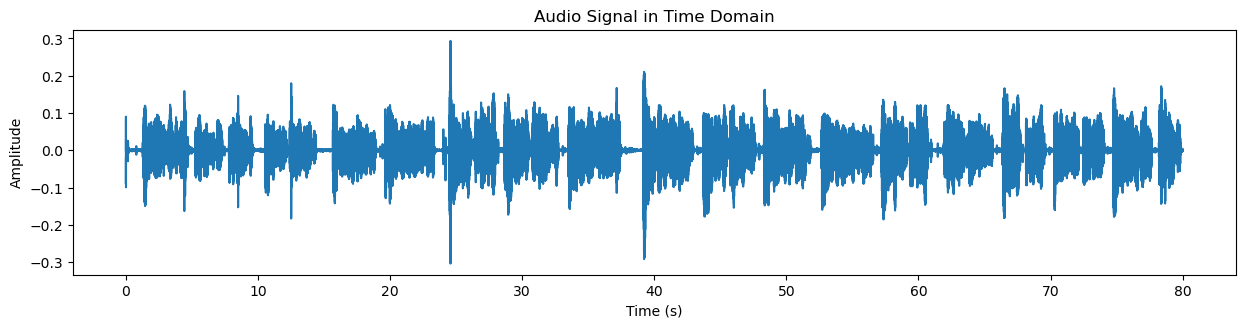

In [157]:
from scipy.io.wavfile import read

### this part is for reading the audio file and plotting it

# Read the audio file
fs, data = read('recording.wav')

# fs is the sample rate
# data is the audio data

# Create a time variable in seconds
time = np.arange(0, len(data)) / fs

# Create a subplot
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)

# Plot the audio signal in time domain
plt.plot(time, data)
plt.title('Audio Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

In [93]:
import sounddevice as sd

### this part is for playing audio from the computer

# Play the audio
sd.play(data, fs)

# Wait for the audio to finish playing
sd.wait()

3. Normalize the audio signal. so that its value is always in the range [−1,1]. What is the normalized signal power in dB?

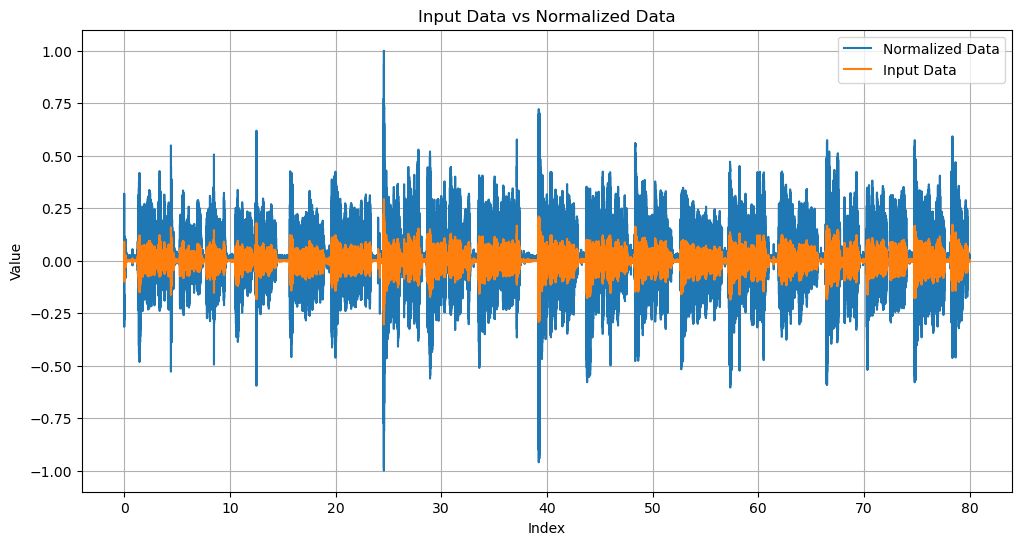

In [158]:
def normalize_data(data):
    max_val = max(data)
    min_val = min(data)
    normalized_data = [(x - min_val) / (max_val - min_val) * 2 - 1 for x in data]
    return np.array(normalized_data)


# Call the normalize_data function
normalized_data = normalize_data(data)

# Plot the input and normalized data
plt.figure(figsize=(12, 6))
plt.plot(time ,normalized_data, label='Normalized Data')
plt.plot(time , data, label='Input Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Input Data vs Normalized Data')
plt.legend()
plt.grid(True)
plt.show()


In [159]:
def calculate_power_db(normalized_data):
    power = np.mean(np.square(normalized_data))
    power_db = 10 * np.log10(power)
    return power_db

print("The power of normalized data is: " + str(calculate_power_db(normalized_data)) + " dB")


The power of normalized data is: -20.883326826682595 dB


4. Write a function named <span style="color:red">ulaw_compressor</span> that takes the signal and μ value at the input and returns the compressed signal at the output.

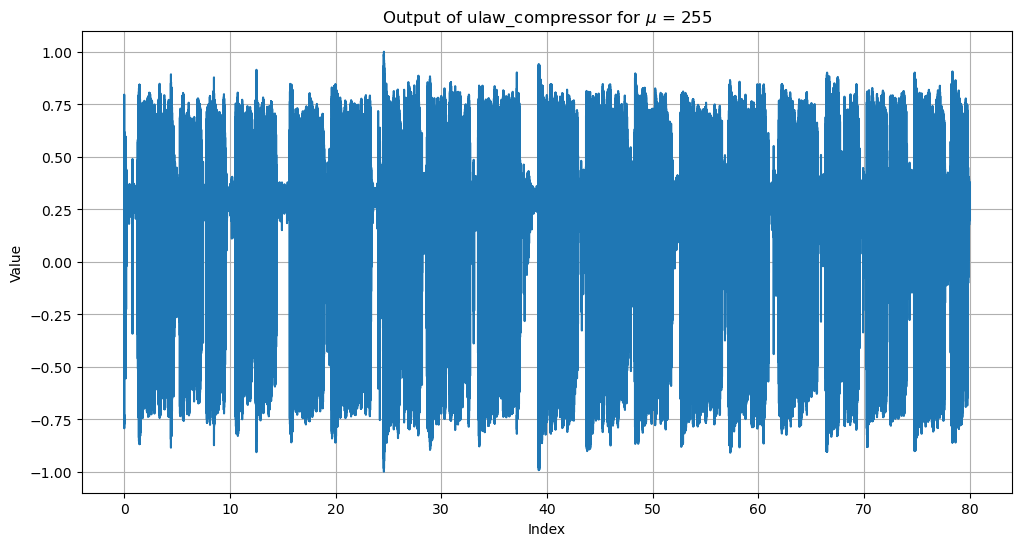

In [160]:
def ulaw_compressor(signal, mu):
    compressed_signal = np.sign(signal) * (np.log(1 + mu * np.abs(signal)) / np.log(1 + mu))
    return compressed_signal


compressed_signal = ulaw_compressor(normalized_data, mu=255)
plt.figure(figsize=(12, 6))
plt.plot(time , compressed_signal)
plt.title('Output of ulaw_compressor for $\mu$ = 255')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


5. According to the inverse of the $F_{\mu}(x)$ function, write a function named <span style="color:red">ulaw_expander</span>  that takes the compressed signal and μ value at the input and restores the original signal as much as possible at the output.

/var/folders/21/jvt_k93x2l76ygs0vp656np80000gn/T/ipykernel_9212/191752396.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


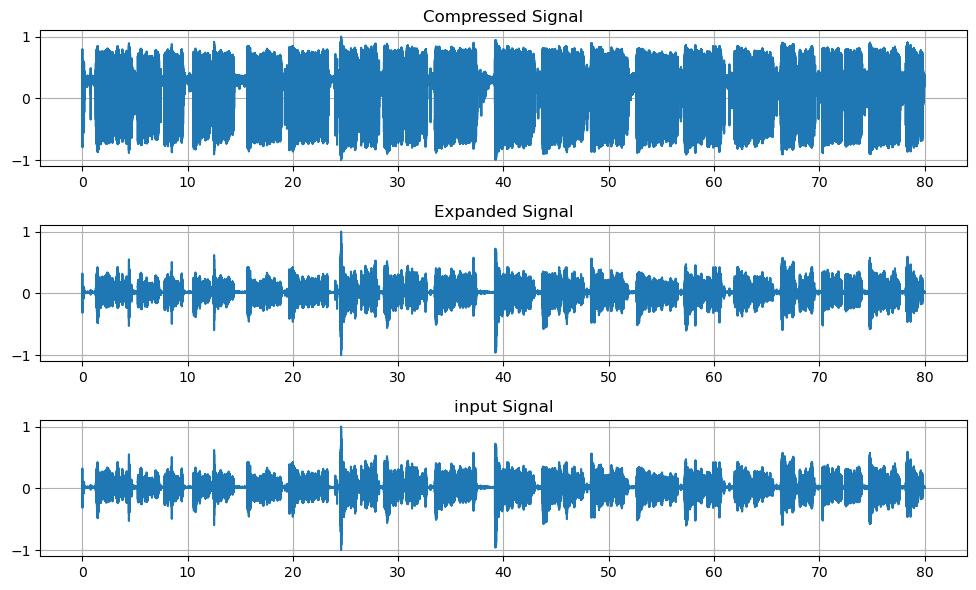

In [161]:
def ulaw_expander(compressed_signal, mu=255):
    """Apply the inverse of the mu-law companding formula to the input signal."""
    return np.sign(compressed_signal) * (1 / mu) * ((1 + mu) ** np.abs(compressed_signal) - 1)


# Apply the ulaw_expander
expanded_signal = ulaw_expander(compressed_signal)

# Plot the original and expanded signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time , compressed_signal)
plt.title('Compressed Signal')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time , expanded_signal)
plt.title('Expanded Signal')
plt.grid(True)
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(time , normalized_data)
plt.title('input Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

6. Combine the two functions ulaw_compressor and ulaw_expander and pass your audio signal through their combination. What is the RMS error of signal recovery? Repeat this for several different values of μ.

In [162]:
def calculate_rms_error(signal1, signal2):
    """Calculate the RMS error between two signals."""
    return np.sqrt(np.mean((signal1 - signal2) ** 2))

mu_list = [0.00001 , 1 , 10 , 50 , 150 , 200 , 255 , 600 , 1000]
for mu in mu_list : 
    compressed = ulaw_compressor(normalized_data, mu)
    expanded = ulaw_expander(compressed, mu)

    input_snr = np.mean(np.square(normalized_data)) / np.mean(np.square(normalized_data - expanded))
        # Calculate the SNR of the output signal
    output_snr = 10 * np.log10(np.mean(np.square(expanded)) / np.mean(np.square(normalized_data - expanded)))

    
    print("The RMS error of the input and output signals for \u03BC = " + str(mu) + " is: " + str(calculate_rms_error(normalized_data, expanded)))
    
    
    


The RMS error of the input and output signals for μ = 1e-05 is: 6.410592722320119e-12
The RMS error of the input and output signals for μ = 1 is: 1.4953261511274048e-18
The RMS error of the input and output signals for μ = 10 is: 1.0848438067093695e-17
The RMS error of the input and output signals for μ = 50 is: 1.6533264755753483e-17
The RMS error of the input and output signals for μ = 150 is: 2.140671832349053e-17
The RMS error of the input and output signals for μ = 200 is: 2.220855417134377e-17
The RMS error of the input and output signals for μ = 255 is: 2.727674142721904e-17
The RMS error of the input and output signals for μ = 600 is: 3.018639231788286e-17
The RMS error of the input and output signals for μ = 1000 is: 3.20749084477865e-17


7. Write a function named <span style="color:red">quantizer</span> that takes the signal and the number of quantization level at the input and returns the quantized signal at the output. Pay attention that the quantization in this function is performed uniformly and it is assumed that the input signal is always in the interval [1,1].

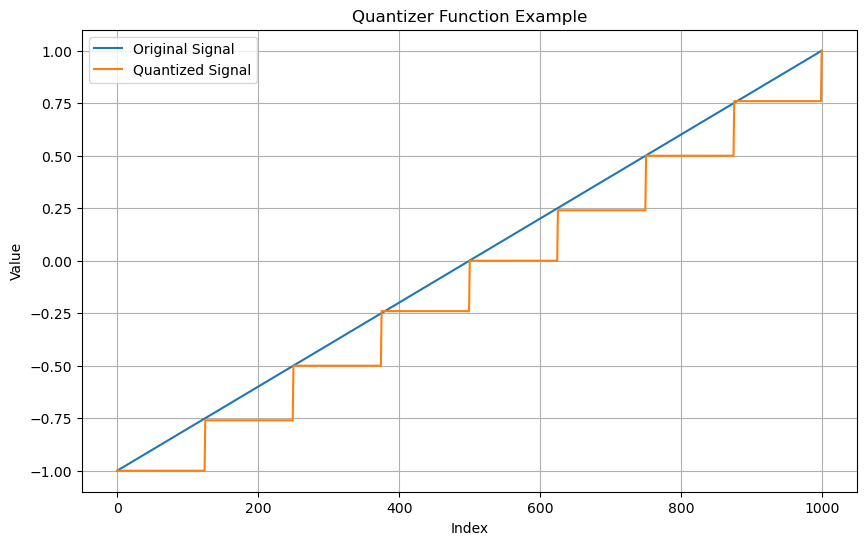

In [163]:
def quantizer(signal, levels, scale=2, rounding=True):
    # Scale the signal
    scaled_signal = (signal + 1) / scale
    
    # Quantize the signal
    quantized_signal = np.floor(scaled_signal * levels) / levels
    
    # Optionally, round the quantized values
    if rounding:
        quantized_signal = np.round(quantized_signal, decimals=2)
    
    # Rescale the quantized signal
    quantized_signal = quantized_signal * scale - 1
    
    return quantized_signal


# Define the signal
signal = np.linspace(-1, 1, 1000)

# Specify the number of quantization levels
levels = 8

# Apply the quantizer function to the signal
quantized_signal = quantizer(signal, levels)

# Plot the original signal and the quantized signal
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Original Signal')
plt.plot(quantized_signal, label='Quantized Signal')
plt.title('Quantizer Function Example')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()





8. Pass the audio signal through the quantizer for the number of quantization levels L = 8, 7, 6, 5, 4 and report the SNR of the output signal in each mode.

<p align="center">
  <img src="quantizer.png" alt="Image description" width="250" height="100"><br>
  <em>diagram 3: quantizer block diagram</em>
</p>

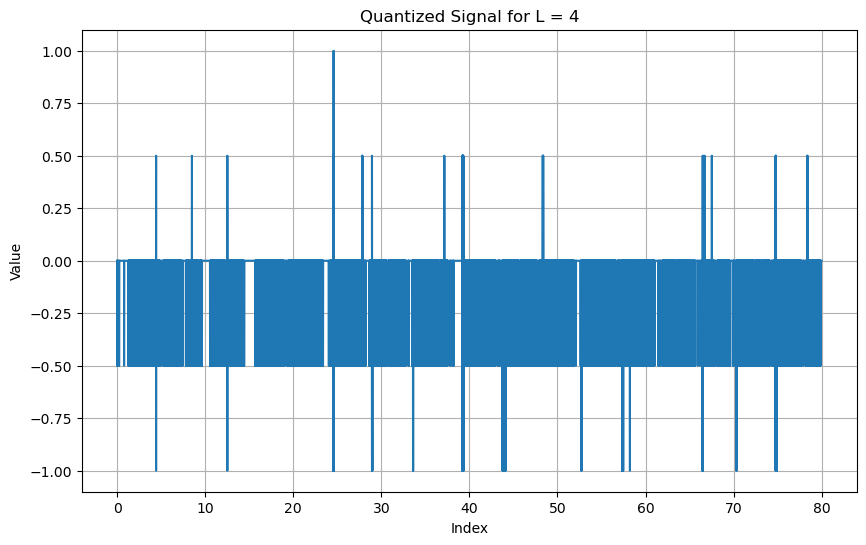

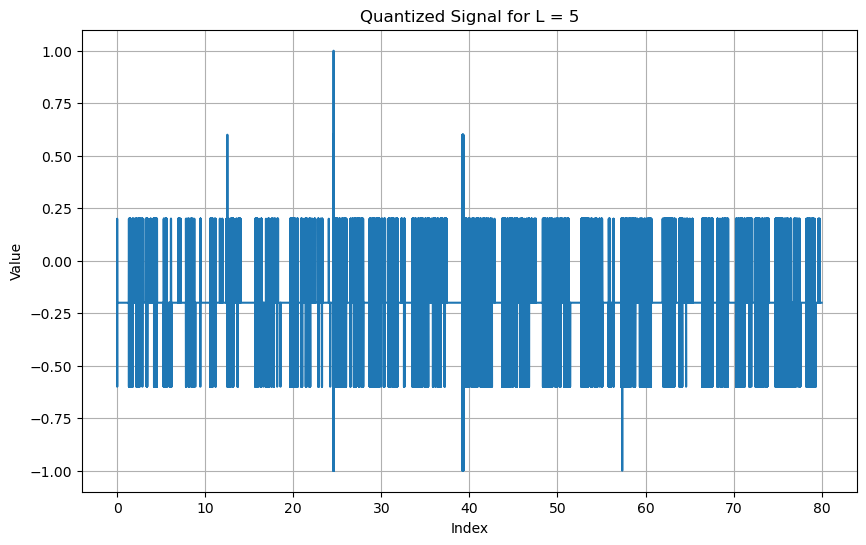

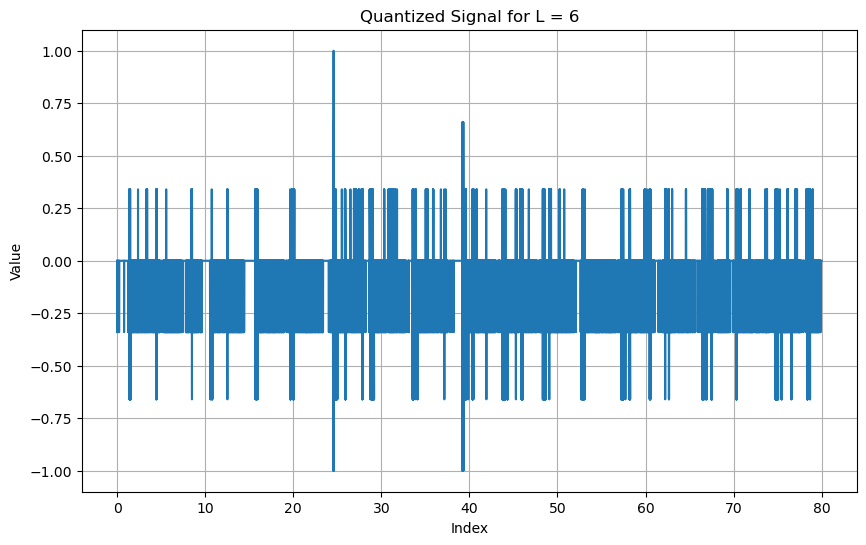

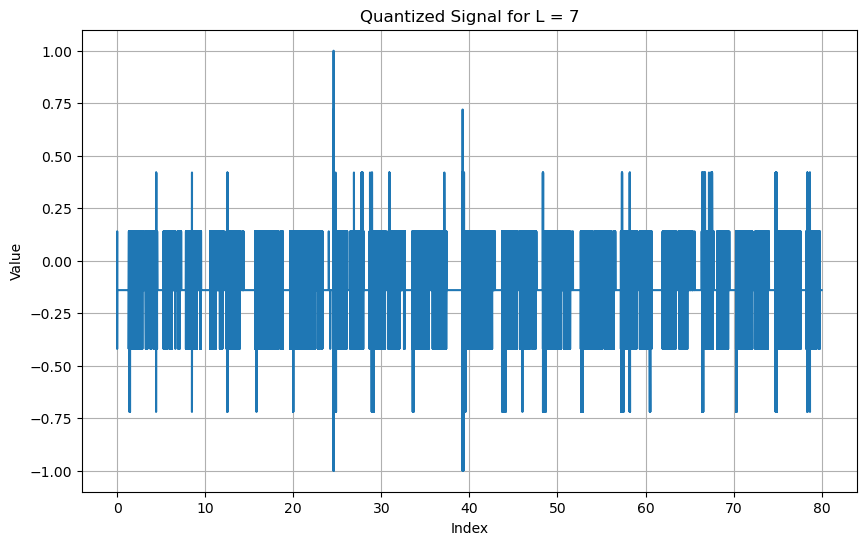

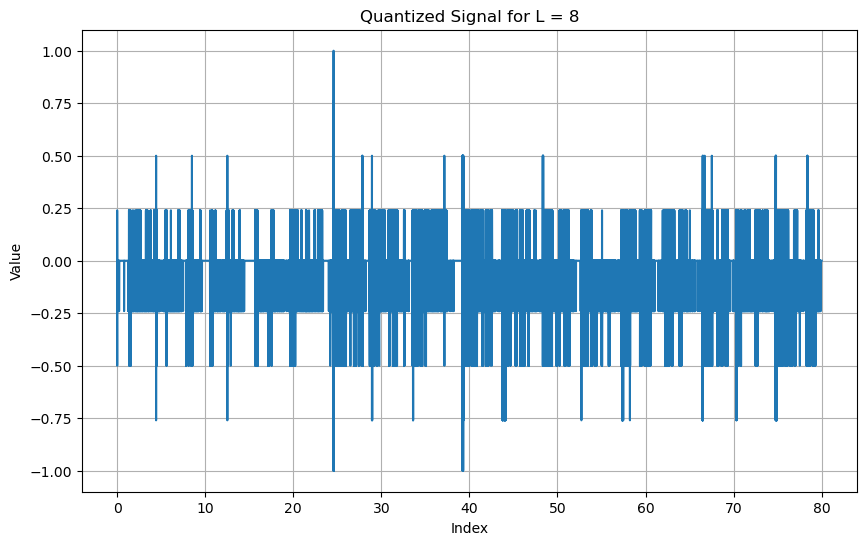

The SNR of the output signal for L = 4 is: -0.3663884852371499 dB
The SNR of the output signal for L = 5 is: 0.22040357194712978 dB
The SNR of the output signal for L = 6 is: 0.8428078432696493 dB
The SNR of the output signal for L = 7 is: 1.074029621505397 dB
The SNR of the output signal for L = 8 is: 1.527499590564409 dB


In [164]:
L_list = [4,5,6,7,8]
SNR_output = []
for L in L_list : 
    quantized_signal = quantizer(normalized_data , L)
    output_snr = 10 * np.log10(np.mean(np.square(quantized_signal)) / np.mean(np.square(normalized_data - quantized_signal)))
    temp = output_snr
    temp1 = "The SNR of the output signal for L = " + str(L) + " is: " + str(output_snr) + " dB"
    SNR_output.append(temp)
    plt.figure(figsize=(10, 6))
    plt.plot(time , quantized_signal)
    plt.title('Quantized Signal for L = ' + str(L))
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

SNR_output.sort()
L_temp = 4
for i in range(len(SNR_output)):
    print("The SNR of the output signal for L = " + str(L_temp+i) + " is: " + str(SNR_output[i]) + " dB")
        


9. Pass the signal through the quantizer using a filter. Report the SNR value of the output signal for the quantization levels of the previous section and several different values of µ.

<p align="center">
  <img src="compander and quantizer.png" alt="Image description" width="500" height="100"><br>
  <em>diagram 4: compander and quantizer block diagram</em>
</p>


In [165]:
mu_list1 = [1e-14 , 1e-12 , 1e-10 , 1e-8 , 1e-6]
mu_list2 = [10 , 50 , 75 , 125 , 255]

for mu in mu_list2 :     
    for L in L_list : 
        compressed = ulaw_compressor(normalized_data, mu)
        quantized_signal = quantizer(compressed , L)
        expanded = ulaw_expander(quantized_signal, mu)
        
        output_snr = 10 * np.log10(np.mean(np.square(expanded)) / np.mean(np.square(normalized_data - expanded)))
        print(f"The SNR of the output signal for \u03BC = {mu} L = " + str(L) + " is: " + str(output_snr) + " dB")
        
    print("**************************************************************************************************")

The SNR of the output signal for μ = 10 L = 4 is: 1.8466849813786033 dB
The SNR of the output signal for μ = 10 L = 5 is: 2.186255359717069 dB
The SNR of the output signal for μ = 10 L = 6 is: 3.6418556820476224 dB
The SNR of the output signal for μ = 10 L = 7 is: 3.6808594601021065 dB
The SNR of the output signal for μ = 10 L = 8 is: 5.074098553270056 dB
**************************************************************************************************
The SNR of the output signal for μ = 50 L = 4 is: 1.7860386816757343 dB
The SNR of the output signal for μ = 50 L = 5 is: 2.4937016741930766 dB
The SNR of the output signal for μ = 50 L = 6 is: 3.4333987557080876 dB
The SNR of the output signal for μ = 50 L = 7 is: 4.136540159491959 dB
The SNR of the output signal for μ = 50 L = 8 is: 4.831651503556086 dB
**************************************************************************************************
The SNR of the output signal for μ = 75 L = 4 is: 1.5962793332987133 dB
The SNR of the

10. Let the number of quantum levels be L = 6. Change the value of μ and plot the SNR of the output signal in terms of μ.

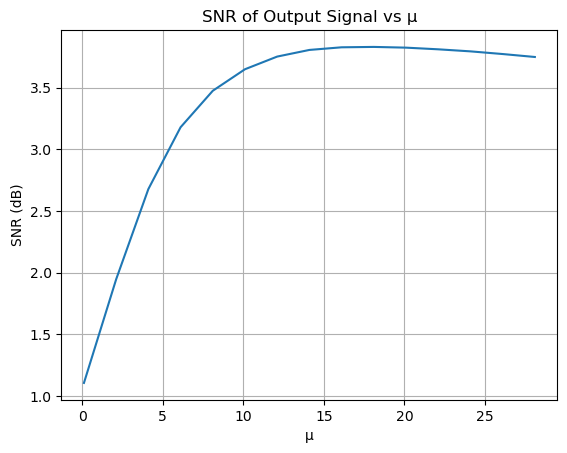

In [108]:
mu_list = np.arange(0.1 , 30 , 2)

snr_list = []
for mu in mu_list:
    compressed = ulaw_compressor(normalized_data, mu)
    quantized_signal = quantizer(compressed, 6)
    expanded = ulaw_expander(quantized_signal, mu)
    output_snr = 10 * np.log10(np.mean(np.square(expanded)) / np.mean(np.square(normalized_data - expanded)))
    snr_list.append(output_snr)

plt.plot(mu_list, snr_list)
plt.title('SNR of Output Signal vs μ')
plt.xlabel('μ')
plt.ylabel('SNR (dB)')
plt.grid(True)
plt.show()


10. Replace the compressor and expander blocks. Pass the signal through the quantizer with this new combination of blocks. Does the use of Compander still have a positive effect?

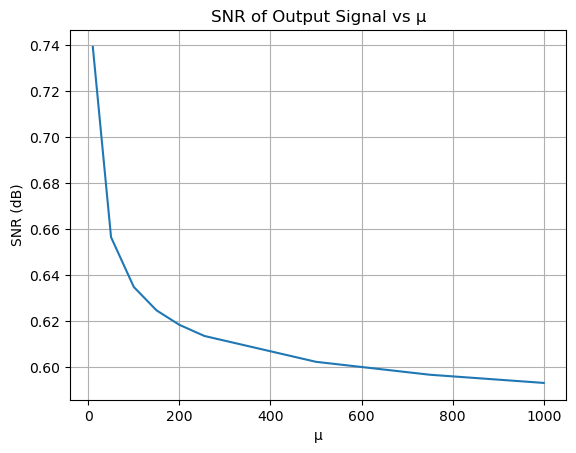

In [166]:
mu_list = [10, 50, 100, 150, 200, 255 , 500 , 750 , 1000]

snr_list = []
for mu in mu_list:
    expanded = ulaw_expander(normalized_data, mu)
    quantized_signal = quantizer(expanded, 6)
    compressed = ulaw_compressor(quantized_signal, mu)
    
    output_snr = 10 * np.log10(np.mean(np.square(compressed)) / np.mean(np.square(normalized_data - compressed)))
    snr_list.append(output_snr)

plt.plot(mu_list, snr_list)
plt.title('SNR of Output Signal vs μ')
plt.xlabel('μ')
plt.ylabel('SNR (dB)')
plt.grid(True)
plt.show()
